In [2]:
%matplotlib inline

from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc
import spacepy.toolbox as tb
import spacepy.plot as spp


This unreleased version of SpacePy is not supported by the SpacePy team.


/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# 20 spin averaged HOPE data in a channel are
data = np.asarray([3.05,
 4.3499999,
 5.8000002,
 10.8,
 14.05,
 22.15,
 25.549999,
 26.950001,
 27.200001,
 31.0,
 31.549999,
 37.25,
 36.099998,
 38.150002,
 40.799999,
 38.700001,
 40.349998,
 44.5,
 41.5,
 42.849998,
 45.849998,
 45.75,
 46.049999,
 49.150002,
 47.75,
 49.700001,
 51.599998,
 50.400002,
 50.0,
 49.849998,
 52.0,
 50.099998,
 51.150002,
 50.5,
 49.25,
 48.950001,
 41.0,
 37.5,
 28.4,
 22.25,
 23.950001,
 22.15,
 14.95,
 6.5500002,
 2.8499999,
 1.5,
 0.75,
 0.15000001,
 0.1,
 0.050000001,
 0.30000001,
 0.85000002,
 0.2,
 0.1,
 0.5,
 0.64999998,
 0.15000001,
 0.050000001,
 0.1,
 0.5,
 1.1,
 1.45,
 2.25,
 2.5,
 2.5,
 3.95,
 7.8000002,
 7.8499999,
 10.7,
 12.7,
 14.9,
 16.75,
 18.5,
 18.65,
 15.6,
 15.3,
 14.15,
 14.7,
 18.0,
 16.0,
 12.05,
 18.65,
 49.700001,
 89.25,
 90.849998,
 89.0,
 90.5,
 85.900002,
 88.5,
 87.199997,
 95.050003,
 96.349998,
 98.599998,
 80.300003,
 78.599998,
 91.449997,
 111.4,
 125.9,
 126.45,
 128.8,
 133.8,
 149.0,
 159.95,
 160.55,
 162.95,
 149.7,
 137.05,
 73.599998,
 14.3,
 4.5,
 1.8,
 1.05,
 0.30000001,
 0.050000001,
 0.15000001,
 0.15000001,
 0.25,
 0.2,
 0.050000001,
 0.050000001,
 0.75,
 0.44999999,
 0.1,
 0.15000001,
 0.34999999,
 0.75,
 1.3,
 1.15,
 1.7,
 2.8,
 6.6500001,
 9.1999998,
 7.6500001,
 10.2,
 22.200001,
 40.549999,
 55.200001,
 82.5,
 105.75,
 99.650002,
 90.75,
 84.050003,
 78.849998,
 74.800003,
 76.25,
 72.0,
 65.25,
 62.200001,
 64.25,
 59.549999,
 56.099998,
 63.299999,
 63.599998,
 66.050003,
 65.550003,
 64.800003,
 61.150002,
 69.849998,
 75.849998,
 76.650002,
 77.349998,
 78.25,
 72.599998,
 71.550003,
 66.75,
 66.75,
 58.5,
 50.799999,
 47.299999,
 42.200001,
 37.049999,
 35.349998,
 30.75])

(0, 24)

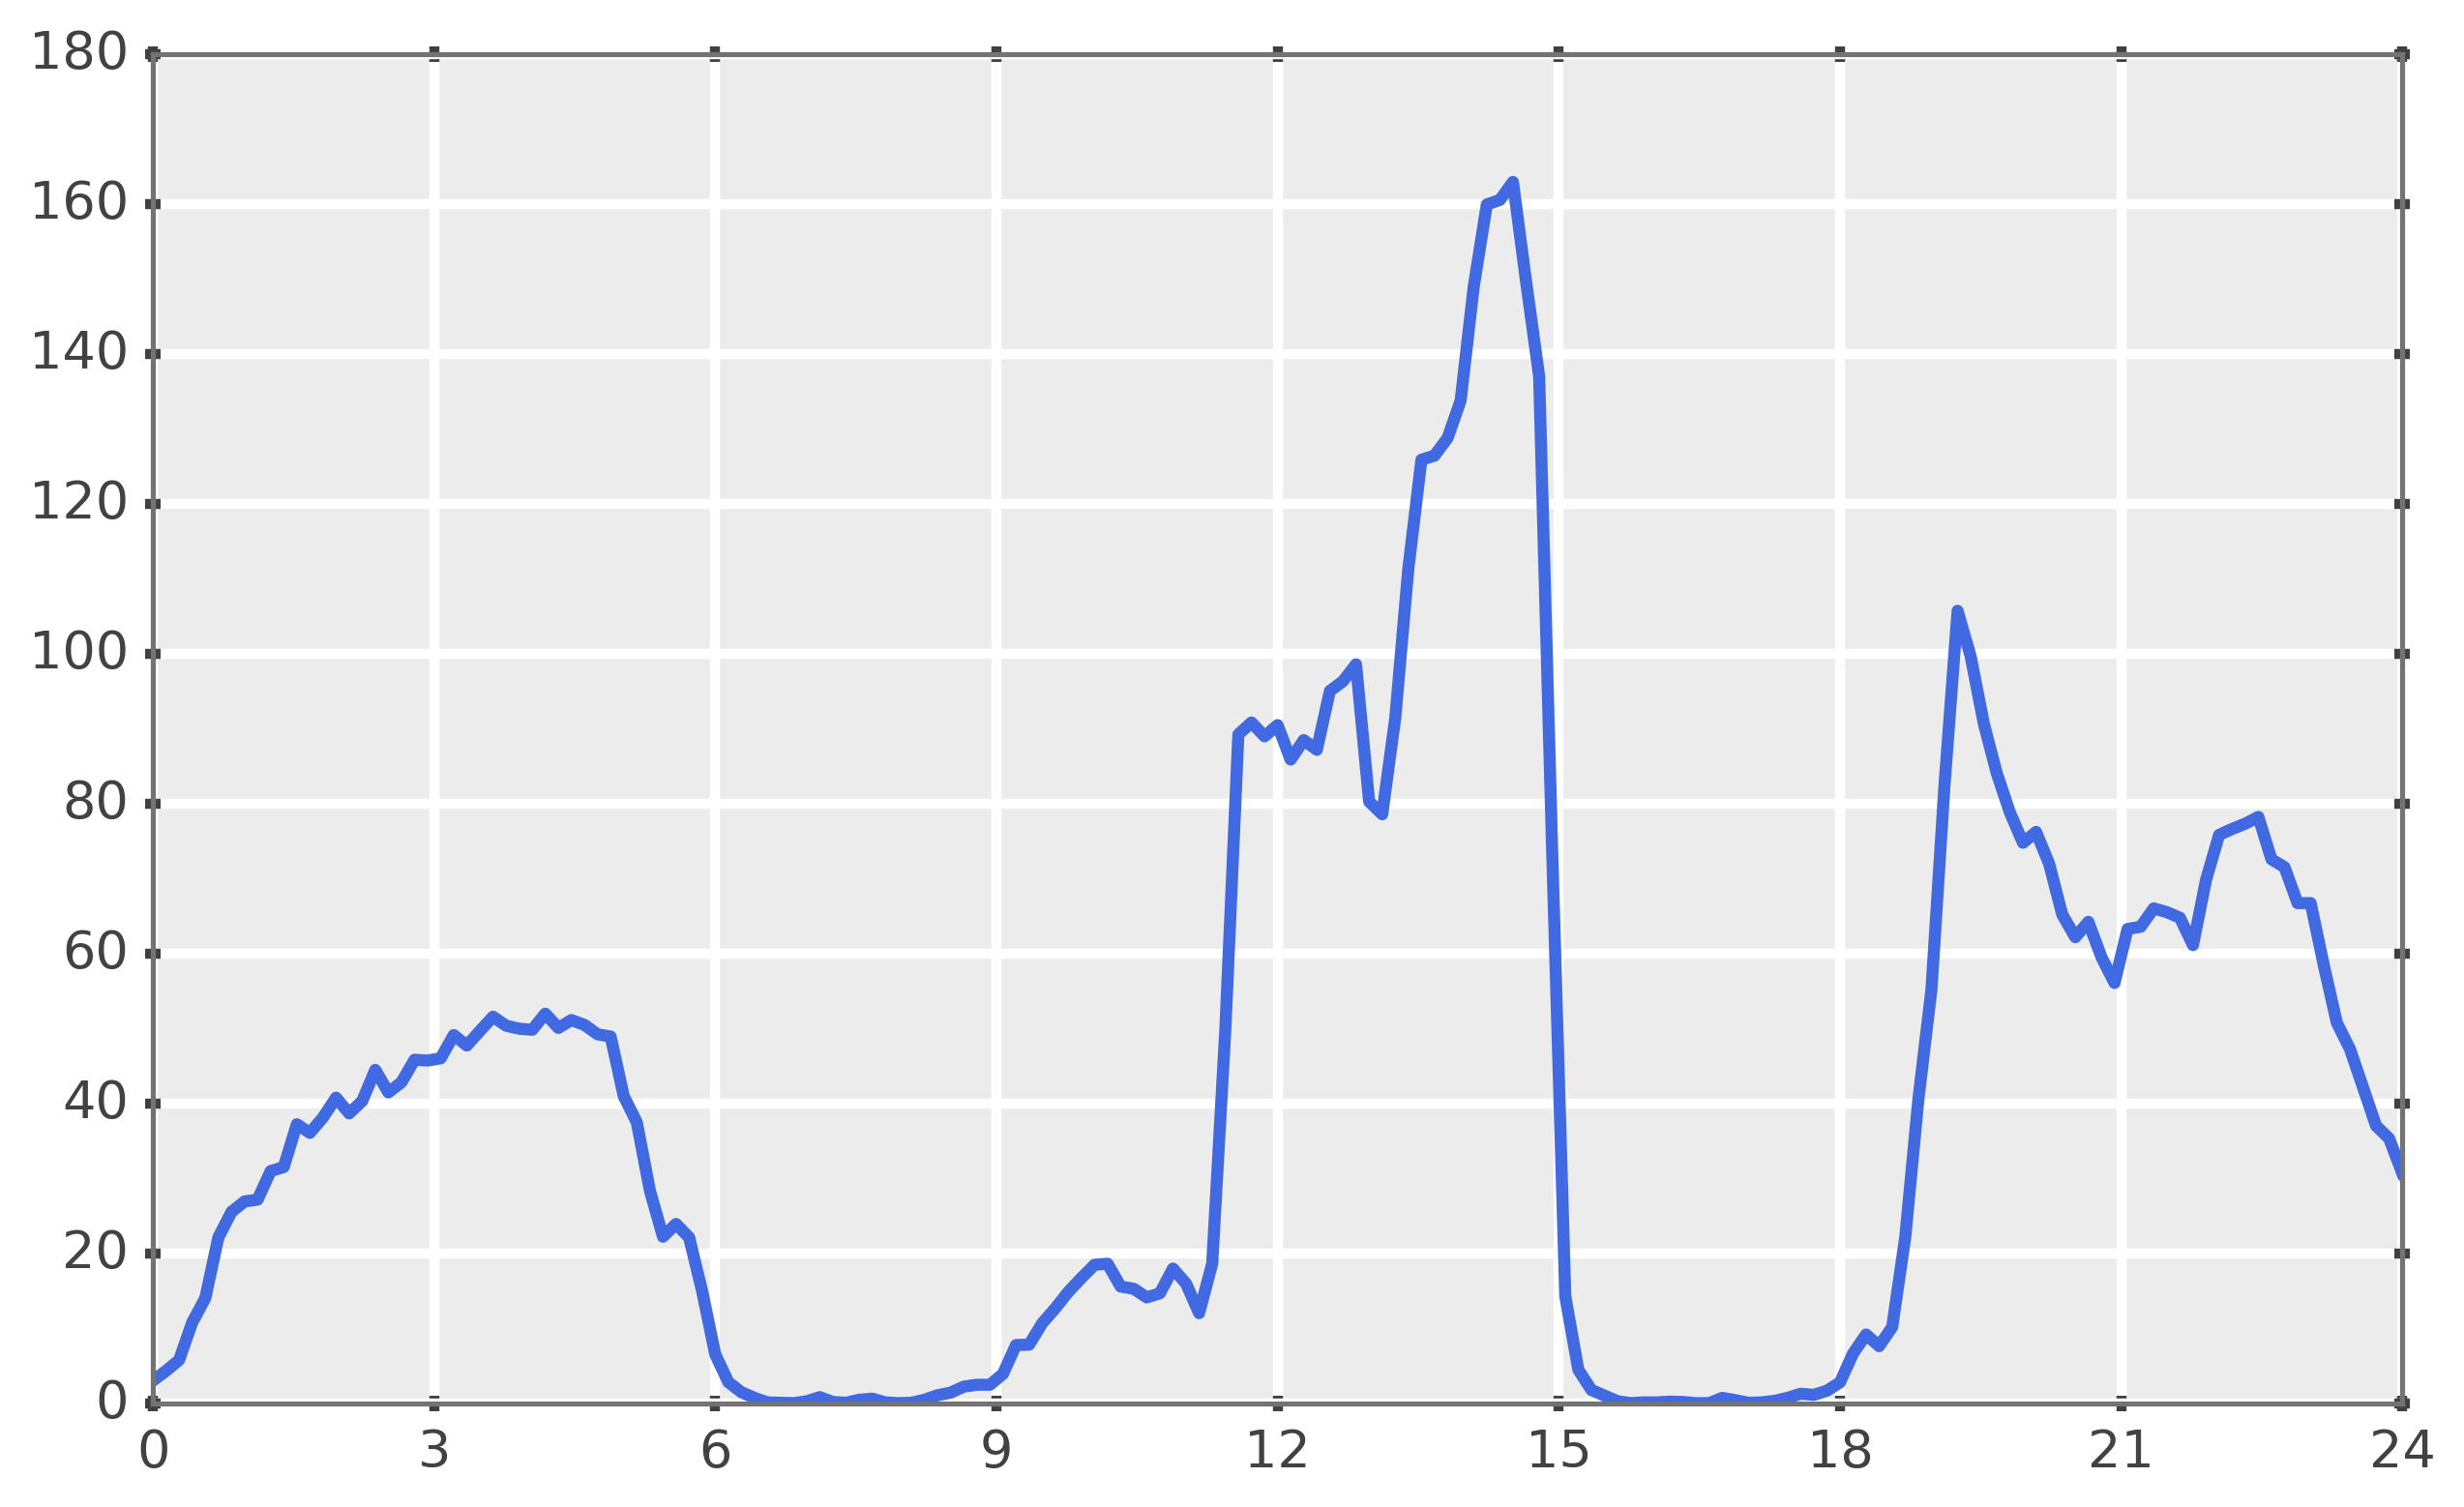

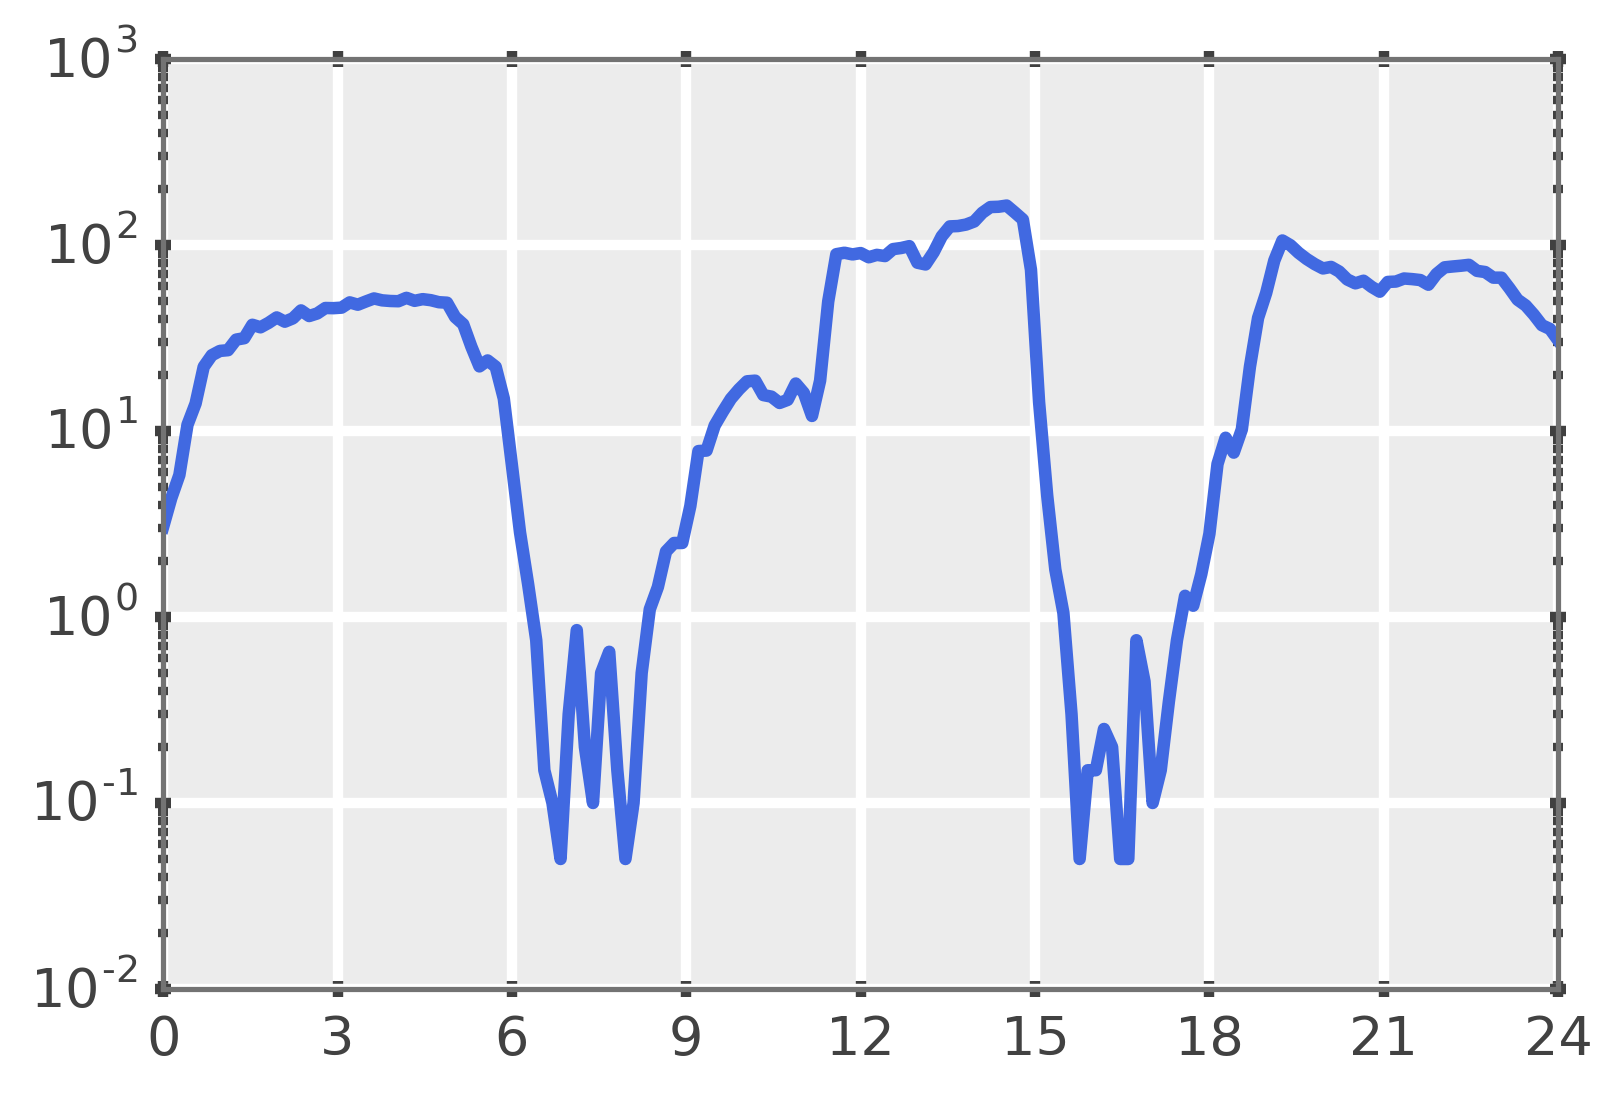

In [4]:
spp.plt.figure()
spp.plot(np.linspace(0,24, len(data)), data, lw=3)
spp.plt.xticks((0,3,6,9,12,15,18,21,24))
spp.plt.xlim((0,24))
spp.plt.figure()
spp.plt.semilogy(np.linspace(0,24, len(data)), data, lw=3)
spp.plt.xticks((0,3,6,9,12,15,18,21,24))
spp.plt.xlim((0,24))

# Lets compute Poisson error bars around these counts
Just compute for each point seperately, how does this compare to $\sqrt{N}$?

In [71]:
# loop over all the unique points and make a y_err array
print(len(data), len(np.unique(data)))
# not too different, just compute them all

yerr = []
yerr_pt = []
yerr2 = []

variance = []

for ii, v in enumerate(data[::10]):
    print(ii)
    mu = pymc.Uniform('mu', 0, max(data))
    counts = pymc.Poisson('counts', mu=mu, observed=True, value=v)
    model = pymc.MCMC((mu, counts))
    model.sample(10000, burn=100, burn_till_tuned=True, thin=10)    
    yerr.append((model.stats()['mu']['95% HPD interval']))
    yerr_pt.append(ii)
    yerr2.append(model.stats()['mu']['quantiles'])
    variance.append(model.stats()['mu']['standard deviation']**2)
    print()
yerr = np.asarray(yerr)

173 152
0
 [-------------------------------174%-------------------------------] 25993 of 14900 complete in 1.0 sec
1
 [-----------------------------166%------------------------------] 24877 of 14900 complete in 1.0 sec
2
 [---------------------------156%----------------------------] 23321 of 14900 complete in 1.0 sec
3
 [-----------------100%-----------------] 14900 of 14900 complete in 0.6 sec
4
 [-----------------100%-----------------] 14900 of 14900 complete in 0.5 sec
5
 [----------------------------------190%----------------------------------] 28362 of 14900 complete in 1.0 sec
6
 [----------------------------------191%----------------------------------] 28570 of 14900 complete in 1.0 sec
7
 [-----------------100%-----------------] 14900 of 14900 complete in 0.6 sec
8
 [-----------------100%-----------------] 14900 of 14900 complete in 0.5 sec
9
 [-----------------100%-----------------] 14900 of 14900 complete in 0.6 sec
10
 [-----------------100%-----------------] 14900 of 14900 

Plotting mu
{'mu': {'95% HPD interval': array([ 25.7399283 ,  49.67902577]),
        'mc error': 0.23849437837311052,
        'mean': 38.033706231458503,
        'n': 990,
        'quantiles': {2.5: 26.462329088208531,
                      25: 33.425716030873616,
                      50: 37.591265260399794,
                      75: 41.973185278814448,
                      97.5: 51.953822985083335},
        'standard deviation': 6.4308518435858923}}
[ 25.7399283   49.67902577]
3.05


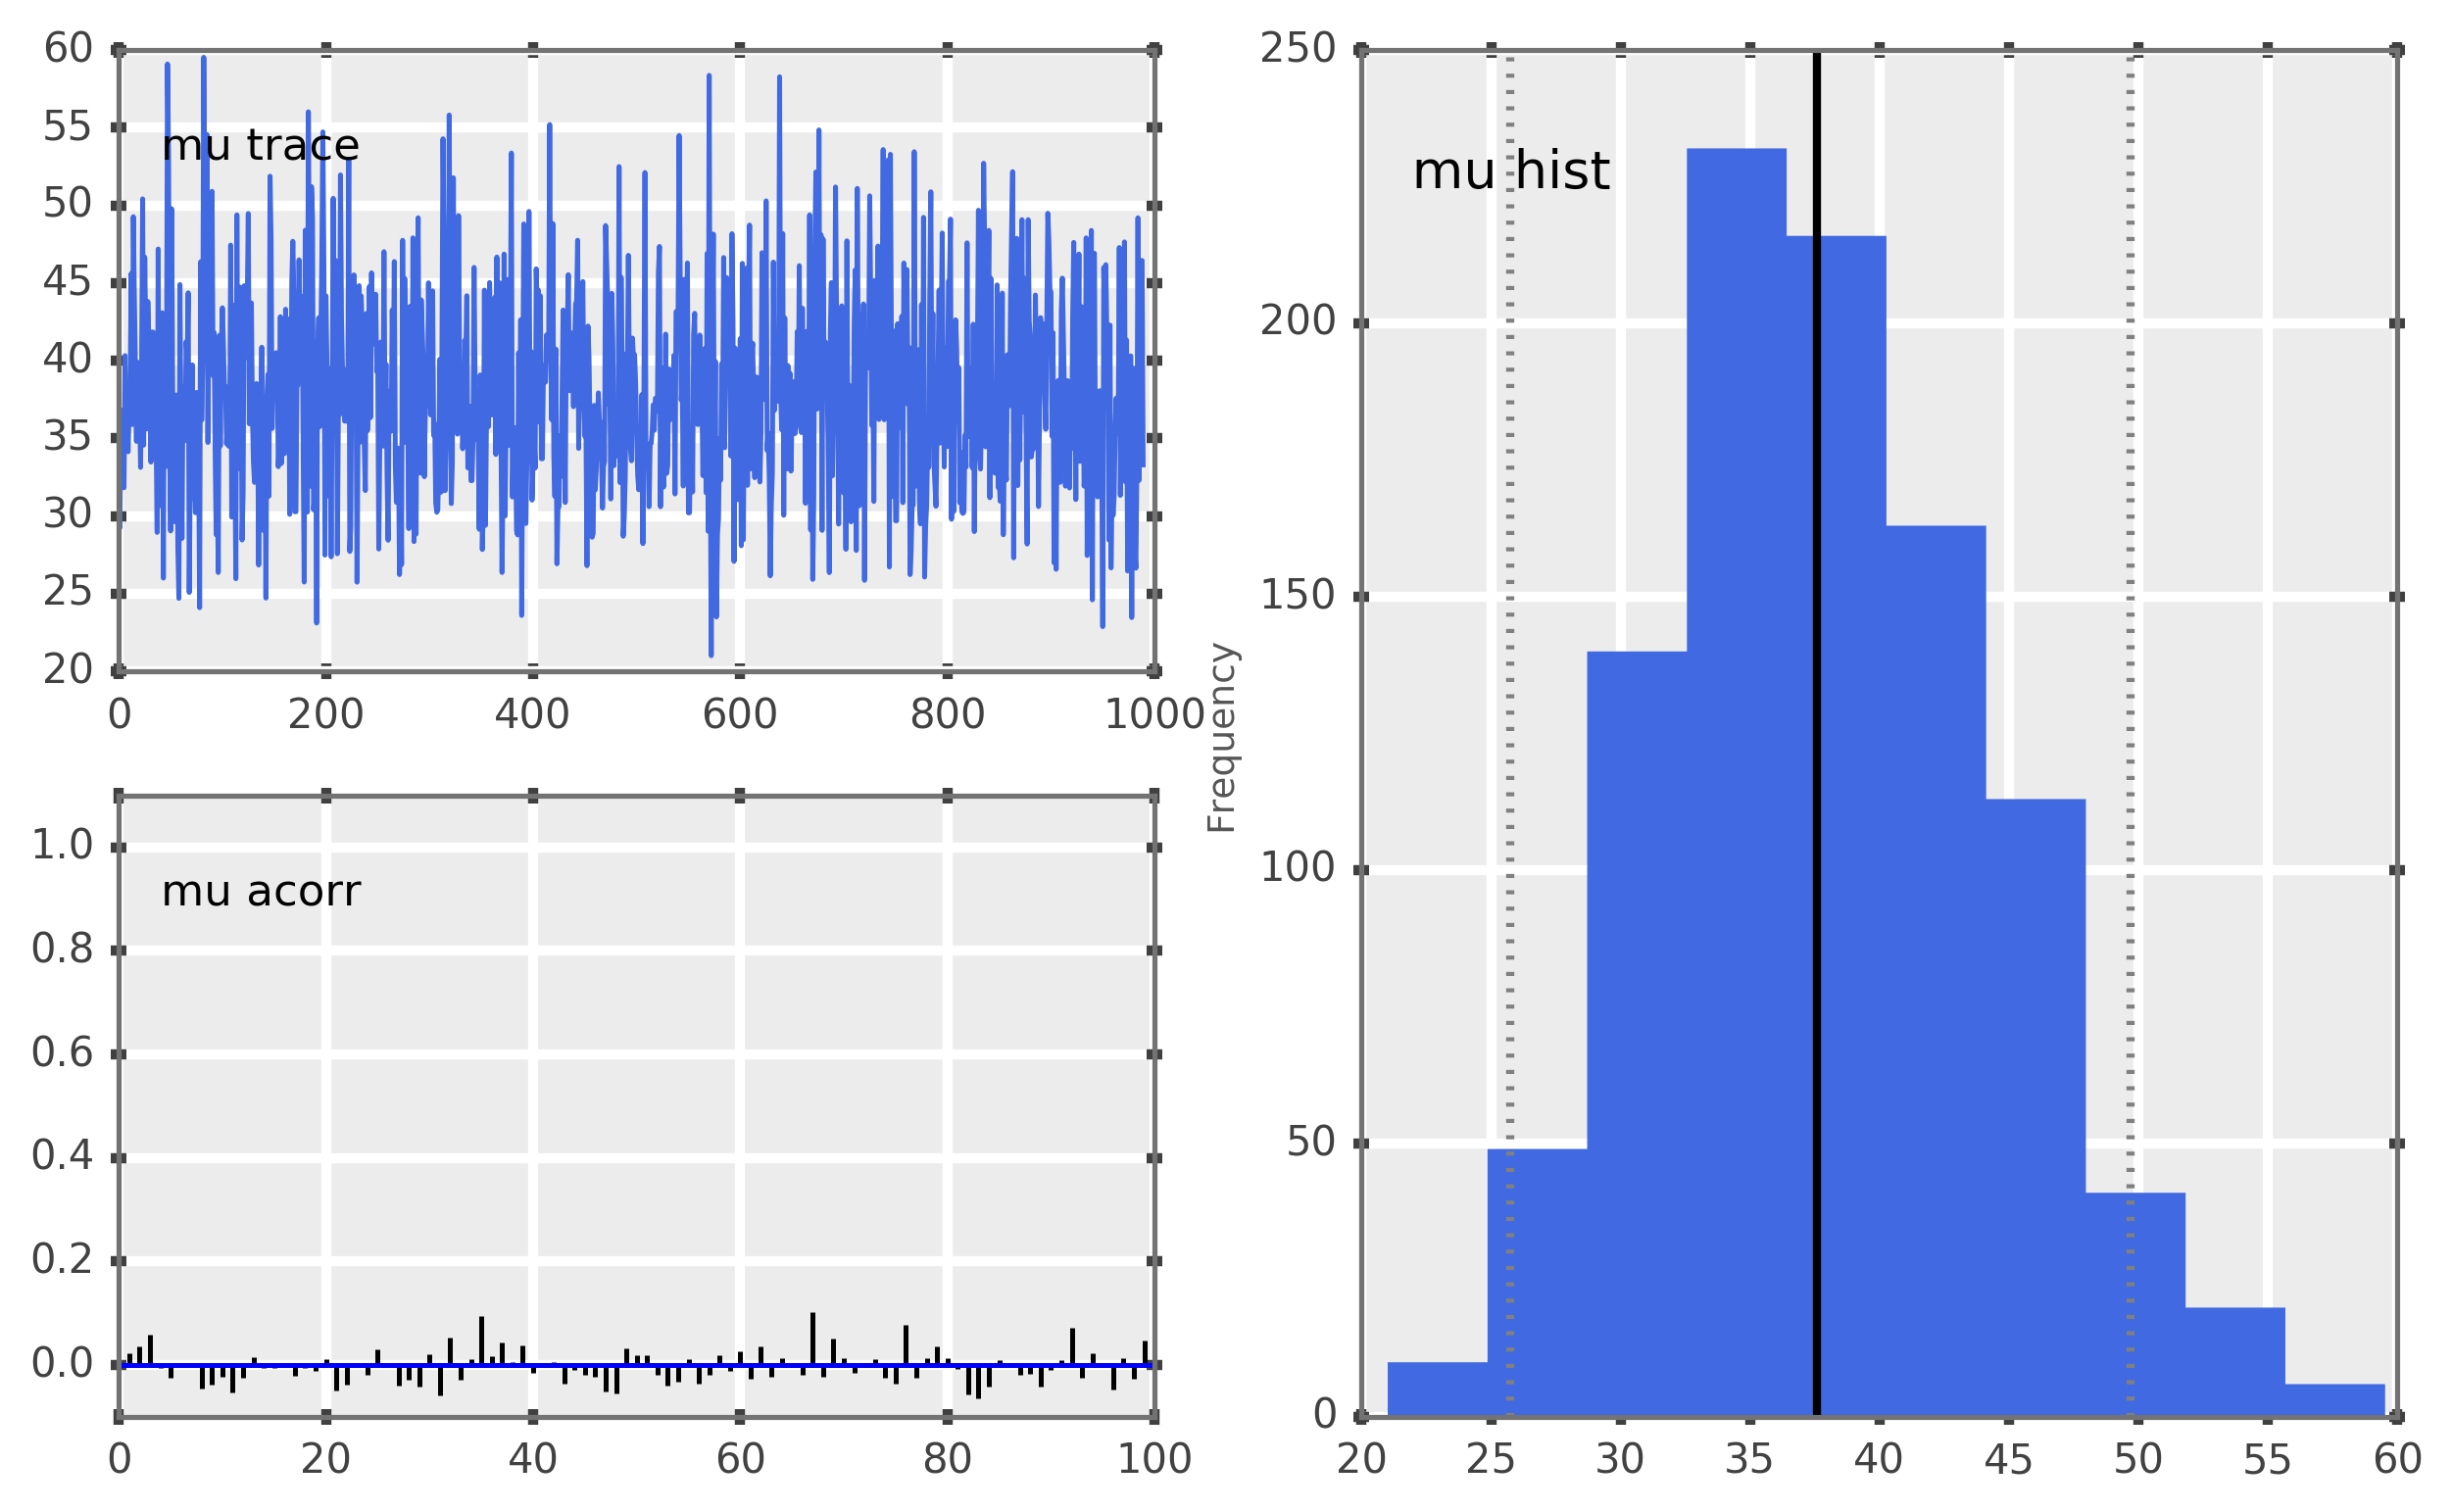

In [26]:
# This should be the error bar for the last measurement
pymc.Matplot.plot(model)
pprint(model.stats())
print(model.stats()['mu']['95% HPD interval'])
print(data[0])

In [62]:

print(data[::10], yerr.T)

print(data[::10][0], yerr[0])

print(data[::10][0]-yerr[0][0],  yerr[0][1]-data[::10][0])
# yerrlow = [v[0]-v[1][0] for v in zip(data[::10],yerr[0])]

#massage the error bars into +/- no absolute numbers

yerrlow = [data[::10][i]-yerr[i][0] for i in range(len(data[::10]))]
print(yerrlow)
yerrhi = [data[::10][i]-yerr[i][0] for i in range(len(data[::10]))]
print(yerrhi)
yerr_del = np.stack((yerrlow, yerrhi))
yerr_del.shape

[   3.05         31.549999     45.849998     52.           23.950001
    0.30000001    1.1          14.9          12.05         95.050003    133.8
    1.8           0.75          6.6500001    90.75         56.099998
   77.349998     37.049999  ] [[  7.21621957e-01   2.12429346e+01   3.27771170e+01   3.89772131e+01
    1.44800277e+01   4.92701692e-03   3.04311483e-02   7.38588495e+00
    6.97674371e+00   7.69485278e+01   1.14299643e+02   1.72182692e-02
    3.55690353e-04   2.35631914e+00   7.18637691e+01   4.34690776e+01
    6.04532073e+01   2.57399283e+01]
 [  7.54907772e+00   4.29266362e+01   5.78832458e+01   6.78040459e+01
    3.26981402e+01   2.99805642e+00   4.54618834e+00   2.18252845e+01
    2.10761347e+01   1.14854115e+02   1.58076457e+02   4.83333463e+00
    3.12931423e+00   1.23467347e+01   1.09139330e+02   7.32022162e+01
    9.56317293e+01   4.96790258e+01]]
3.05 [ 0.72162196  7.54907772]
2.32837804327 4.49907771919
[2.3283780432667625, 10.307064421915559, 13.072881041818476,

(2, 18)

[[  7.21621957e-01   7.54907772e+00]
 [  2.12429346e+01   4.29266362e+01]
 [  3.27771170e+01   5.78832458e+01]
 [  3.89772131e+01   6.78040459e+01]
 [  1.44800277e+01   3.26981402e+01]
 [  4.92701692e-03   2.99805642e+00]
 [  3.04311483e-02   4.54618834e+00]
 [  7.38588495e+00   2.18252845e+01]
 [  6.97674371e+00   2.10761347e+01]
 [  7.69485278e+01   1.14854115e+02]
 [  1.14299643e+02   1.58076457e+02]
 [  1.72182692e-02   4.83333463e+00]
 [  3.55690353e-04   3.12931423e+00]
 [  2.35631914e+00   1.23467347e+01]
 [  7.18637691e+01   1.09139330e+02]
 [  4.34690776e+01   7.32022162e+01]
 [  6.04532073e+01   9.56317293e+01]
 [  2.57399283e+01   4.96790258e+01]]
[[  7.21621957e-01   7.54907772e+00]
 [  2.12429346e+01   4.29266362e+01]
 [  3.27771170e+01   5.78832458e+01]
 [  3.89772131e+01   6.78040459e+01]
 [  1.44800277e+01   3.26981402e+01]
 [  4.92701692e-03   2.99805642e+00]
 [  3.04311483e-02   4.54618834e+00]
 [  7.38588495e+00   2.18252845e+01]
 [  6.97674371e+00   2.10761347e+01]


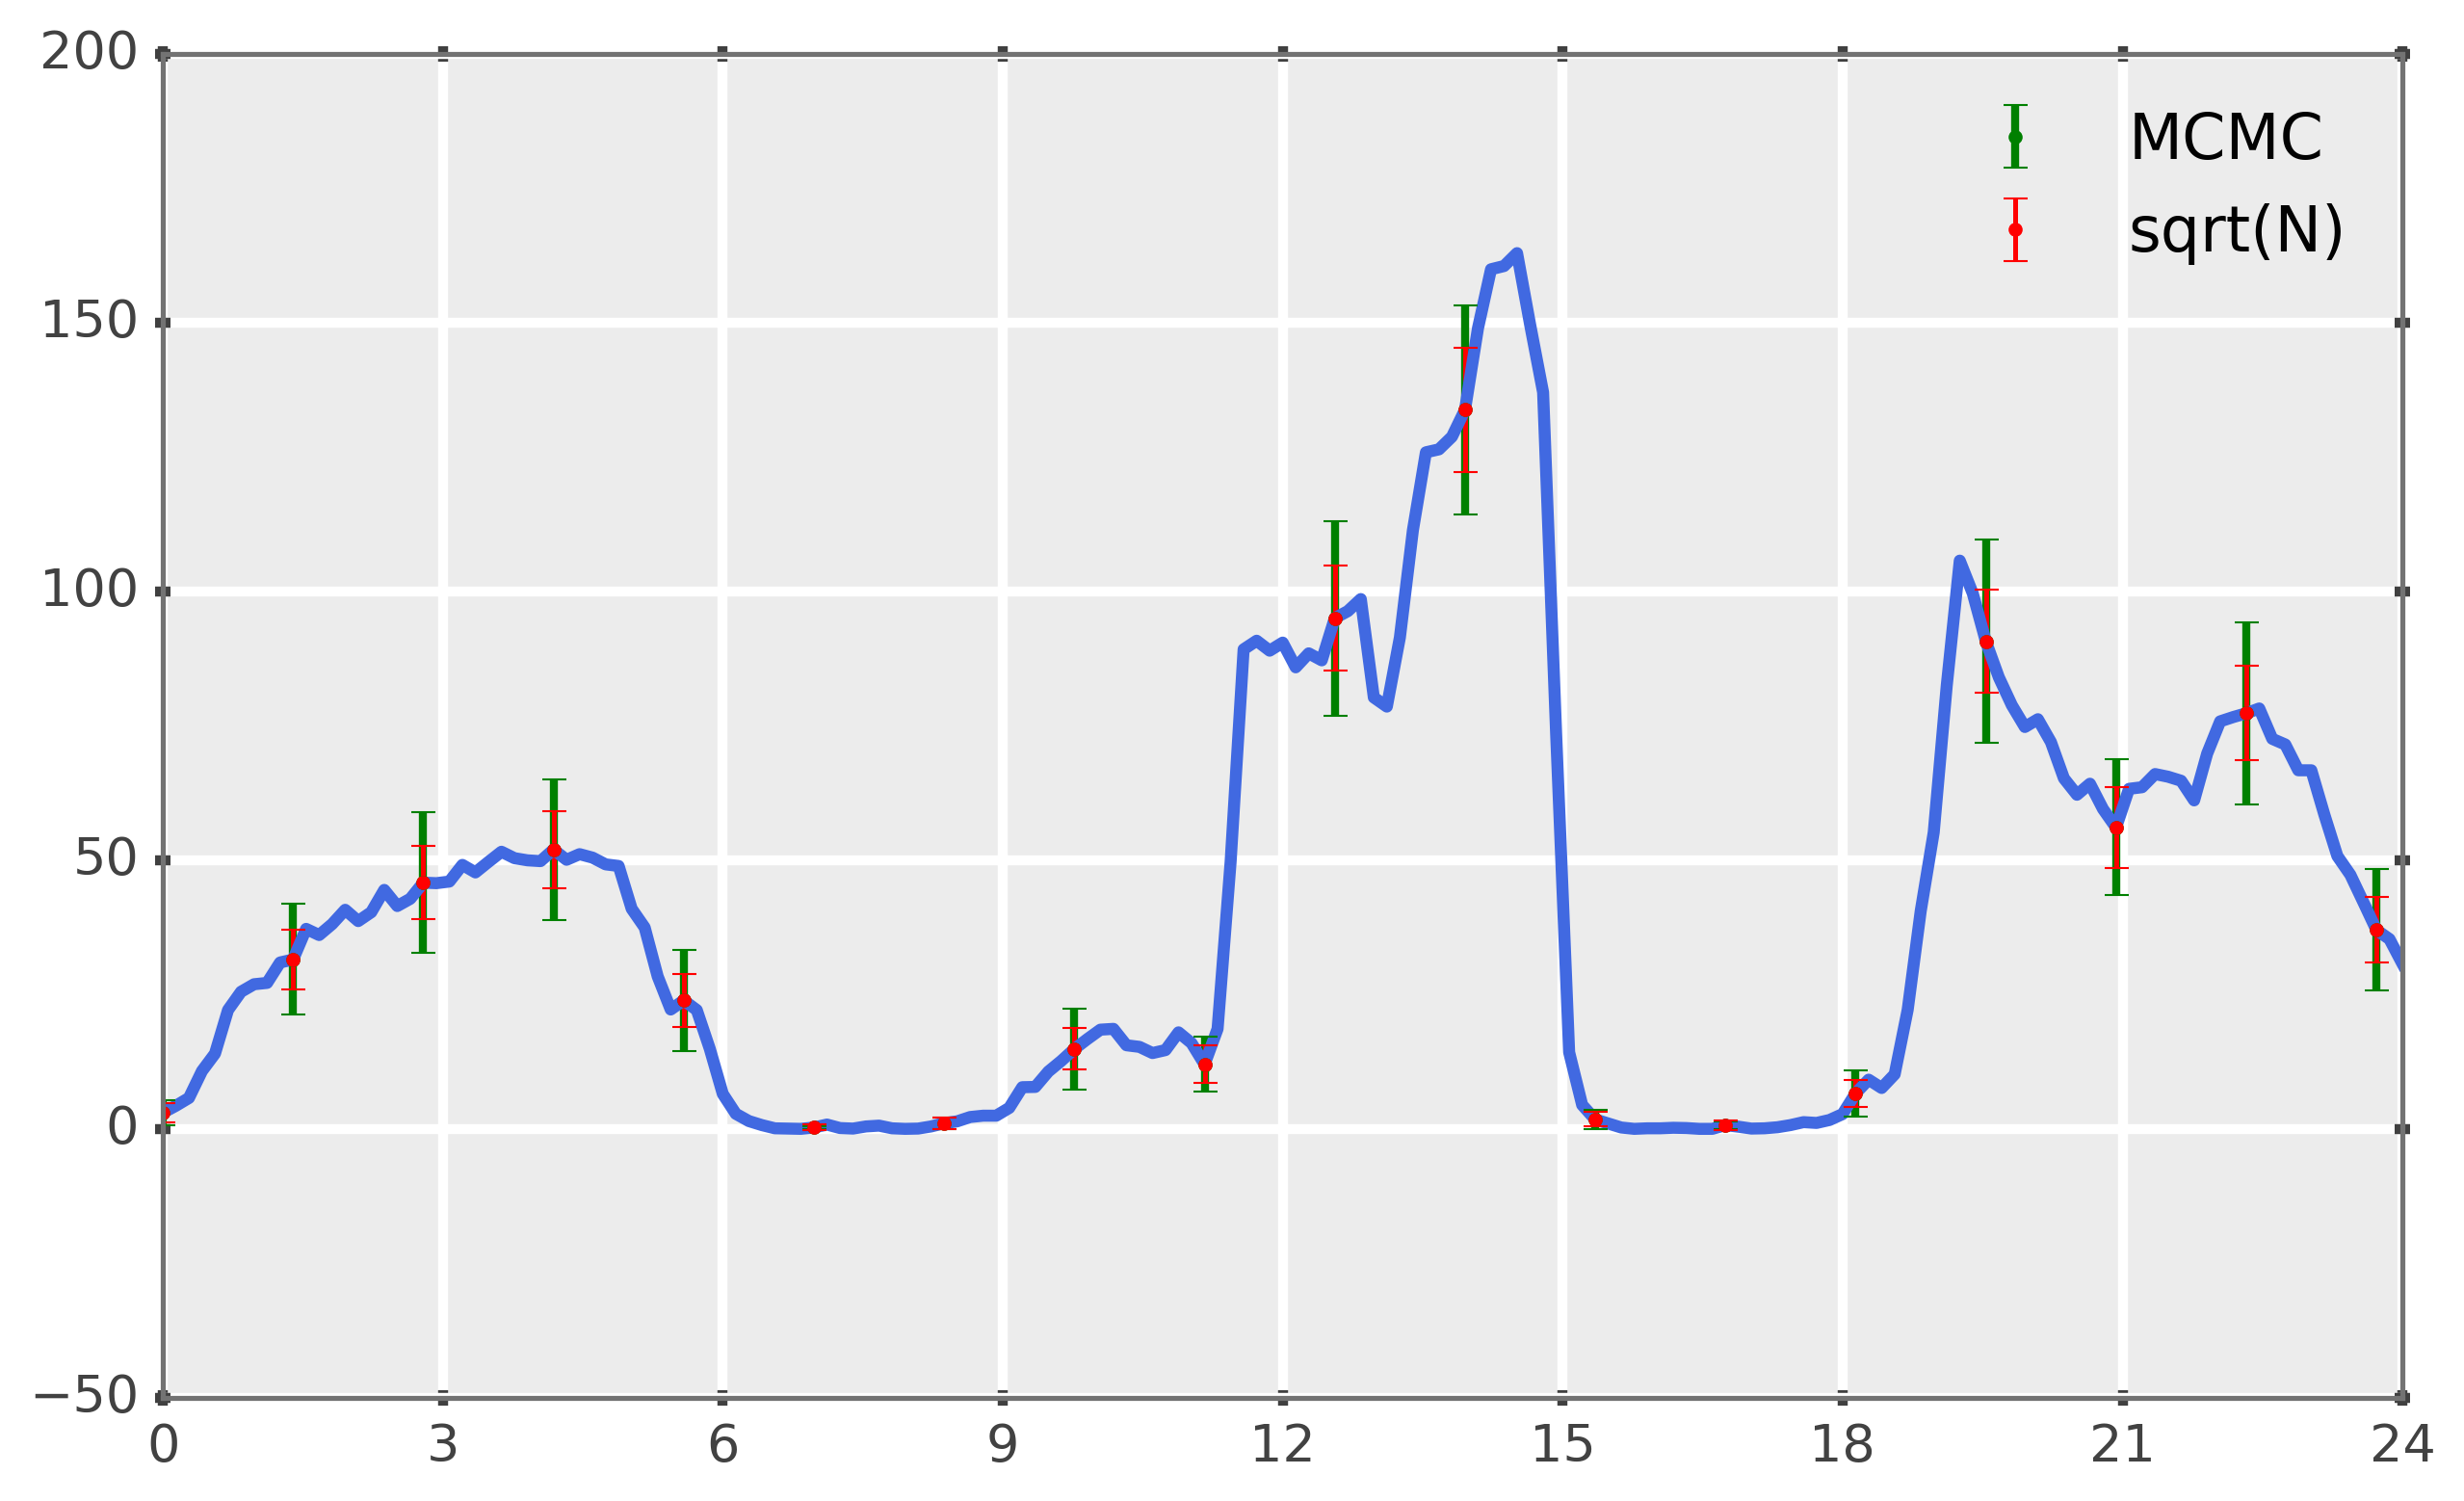

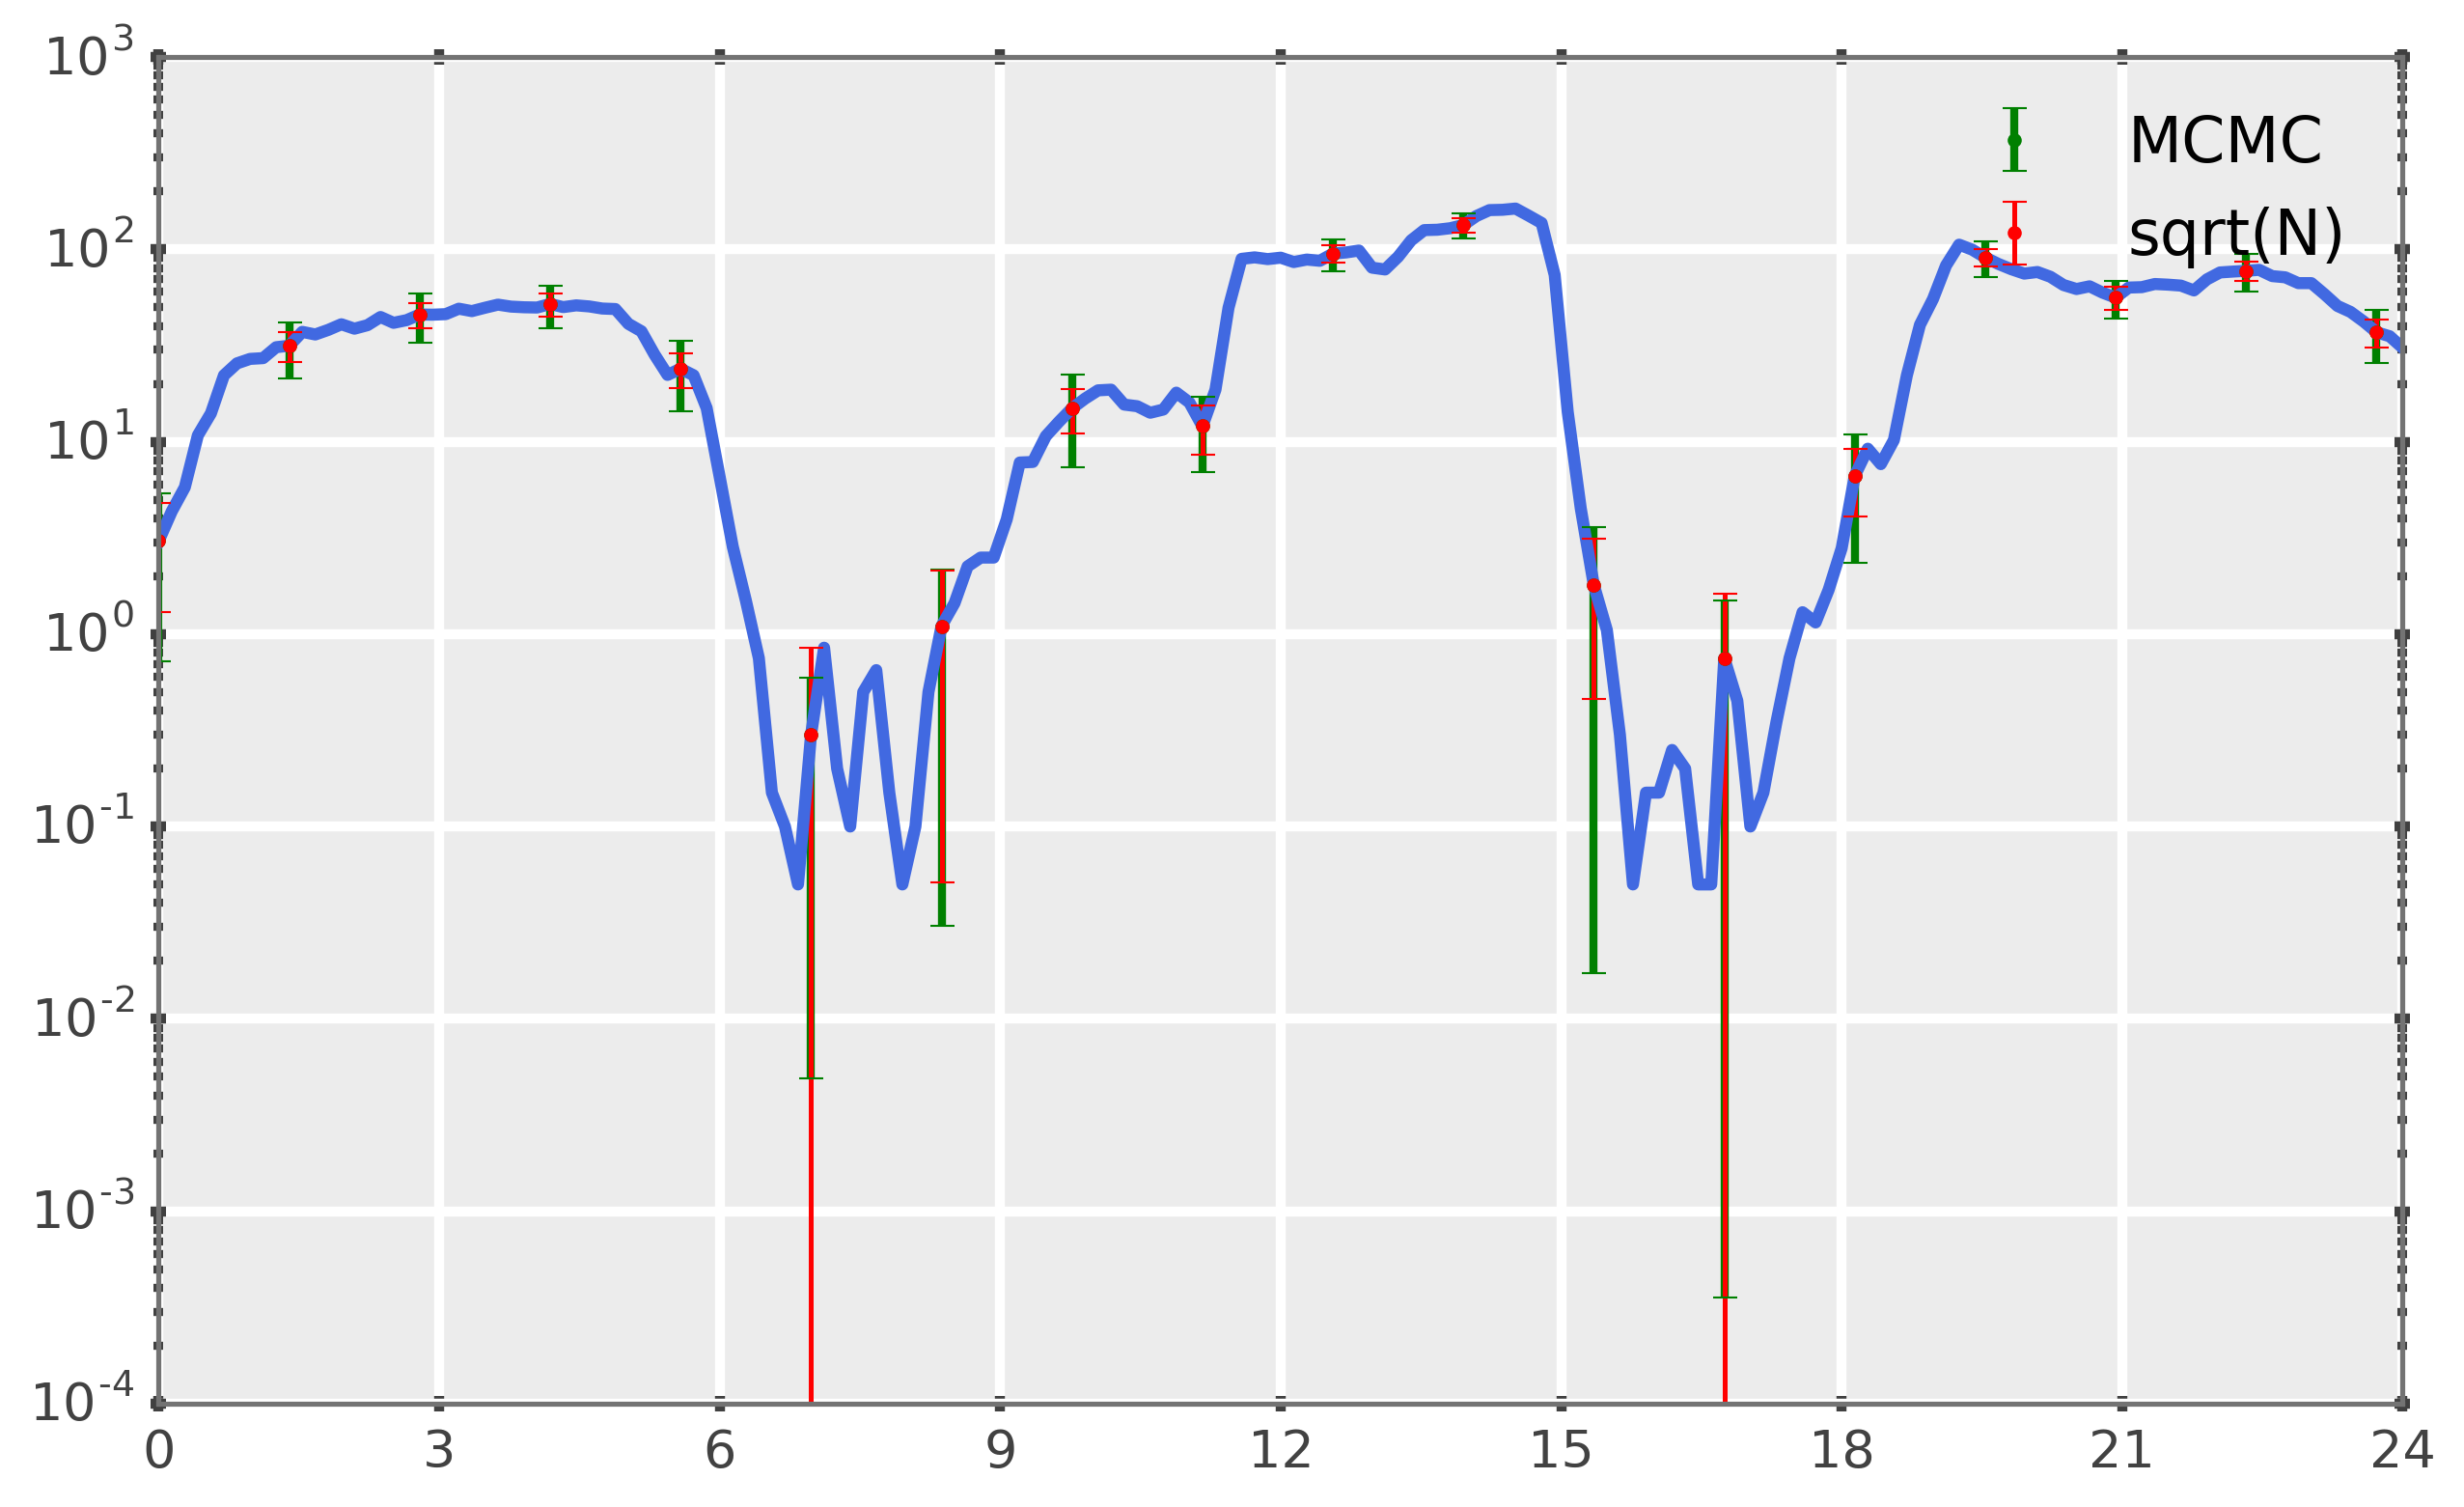

In [67]:
yerr = np.asarray(yerr)



spp.plt.figure()
spp.plot(np.linspace(0,24, len(data)), data, lw=3)
spp.plt.xticks((0,3,6,9,12,15,18,21,24))
spp.plt.xlim((0,24))

np.linspace(0,24, len(data))[::10]
print(yerr)

# put a sqrt(N) on there too
spp.plt.errorbar(np.linspace(0,24, len(data))[::10], data[::10], yerr=yerr_del, fmt='.', lw=2, c='g', label='MCMC')
spp.plt.errorbar(np.linspace(0,24, len(data))[::10], data[::10], yerr=np.sqrt(data[::10]), c='r', fmt='.', label='sqrt(N)')

spp.plt.legend()


spp.plt.figure()
spp.plot(np.linspace(0,24, len(data)), data, lw=3)
spp.plt.xticks((0,3,6,9,12,15,18,21,24))
spp.plt.xlim((0,24))

np.linspace(0,24, len(data))[::10]
print(yerr)

spp.plt.errorbar(np.linspace(0,24, len(data))[::10], data[::10], yerr=yerr_del, fmt='.', lw=2, c='g', label='MCMC')
spp.plt.errorbar(np.linspace(0,24, len(data))[::10], data[::10], yerr=np.sqrt(data[::10]), c='r', fmt='.', label='sqrt(N)')
spp.plt.legend()

spp.plt.yscale('log')


# spp.plt.figure()
# spp.plt.semilogy(np.linspace(0,24, len(data)), data, lw=3)
# spp.plt.xticks((0,3,6,9,12,15,18,21,24))
# spp.plt.xlim((0,24))

In [68]:
yerr_innerq = np.asarray([(v[25], v[75]) for v in yerr2])

#massage the error bars into +/- no absolute numbers

yerrlow = [data[::10][i]-yerr_innerq[i][0] for i in range(len(data[::10]))]
print(yerrlow)
yerrhi = [data[::10][i]-yerr_innerq[i][0] for i in range(len(data[::10]))]
print(yerrhi)
yerr_del = np.stack((yerrlow, yerrhi))
yerr_del.shape

[0.59390809370257847, 3.3495054557528583, 4.3736987616781633, 4.1802162692188318, 3.3713211238212004, -0.0031865031279481593, 0.17839127553037359, 2.7818466631008558, 1.6252663274927865, 7.2035268065002072, 8.2950654013190928, 0.89760454702147396, 0.44224318482884312, 1.6385299388117112, 6.9244267173813796, 3.9658831047686718, 5.1804147310058539, 3.6242829691263836]
[0.59390809370257847, 3.3495054557528583, 4.3736987616781633, 4.1802162692188318, 3.3713211238212004, -0.0031865031279481593, 0.17839127553037359, 2.7818466631008558, 1.6252663274927865, 7.2035268065002072, 8.2950654013190928, 0.89760454702147396, 0.44224318482884312, 1.6385299388117112, 6.9244267173813796, 3.9658831047686718, 5.1804147310058539, 3.6242829691263836]


(2, 18)

[[  7.21621957e-01   7.54907772e+00]
 [  2.12429346e+01   4.29266362e+01]
 [  3.27771170e+01   5.78832458e+01]
 [  3.89772131e+01   6.78040459e+01]
 [  1.44800277e+01   3.26981402e+01]
 [  4.92701692e-03   2.99805642e+00]
 [  3.04311483e-02   4.54618834e+00]
 [  7.38588495e+00   2.18252845e+01]
 [  6.97674371e+00   2.10761347e+01]
 [  7.69485278e+01   1.14854115e+02]
 [  1.14299643e+02   1.58076457e+02]
 [  1.72182692e-02   4.83333463e+00]
 [  3.55690353e-04   3.12931423e+00]
 [  2.35631914e+00   1.23467347e+01]
 [  7.18637691e+01   1.09139330e+02]
 [  4.34690776e+01   7.32022162e+01]
 [  6.04532073e+01   9.56317293e+01]
 [  2.57399283e+01   4.96790258e+01]]
[[  7.21621957e-01   7.54907772e+00]
 [  2.12429346e+01   4.29266362e+01]
 [  3.27771170e+01   5.78832458e+01]
 [  3.89772131e+01   6.78040459e+01]
 [  1.44800277e+01   3.26981402e+01]
 [  4.92701692e-03   2.99805642e+00]
 [  3.04311483e-02   4.54618834e+00]
 [  7.38588495e+00   2.18252845e+01]
 [  6.97674371e+00   2.10761347e+01]


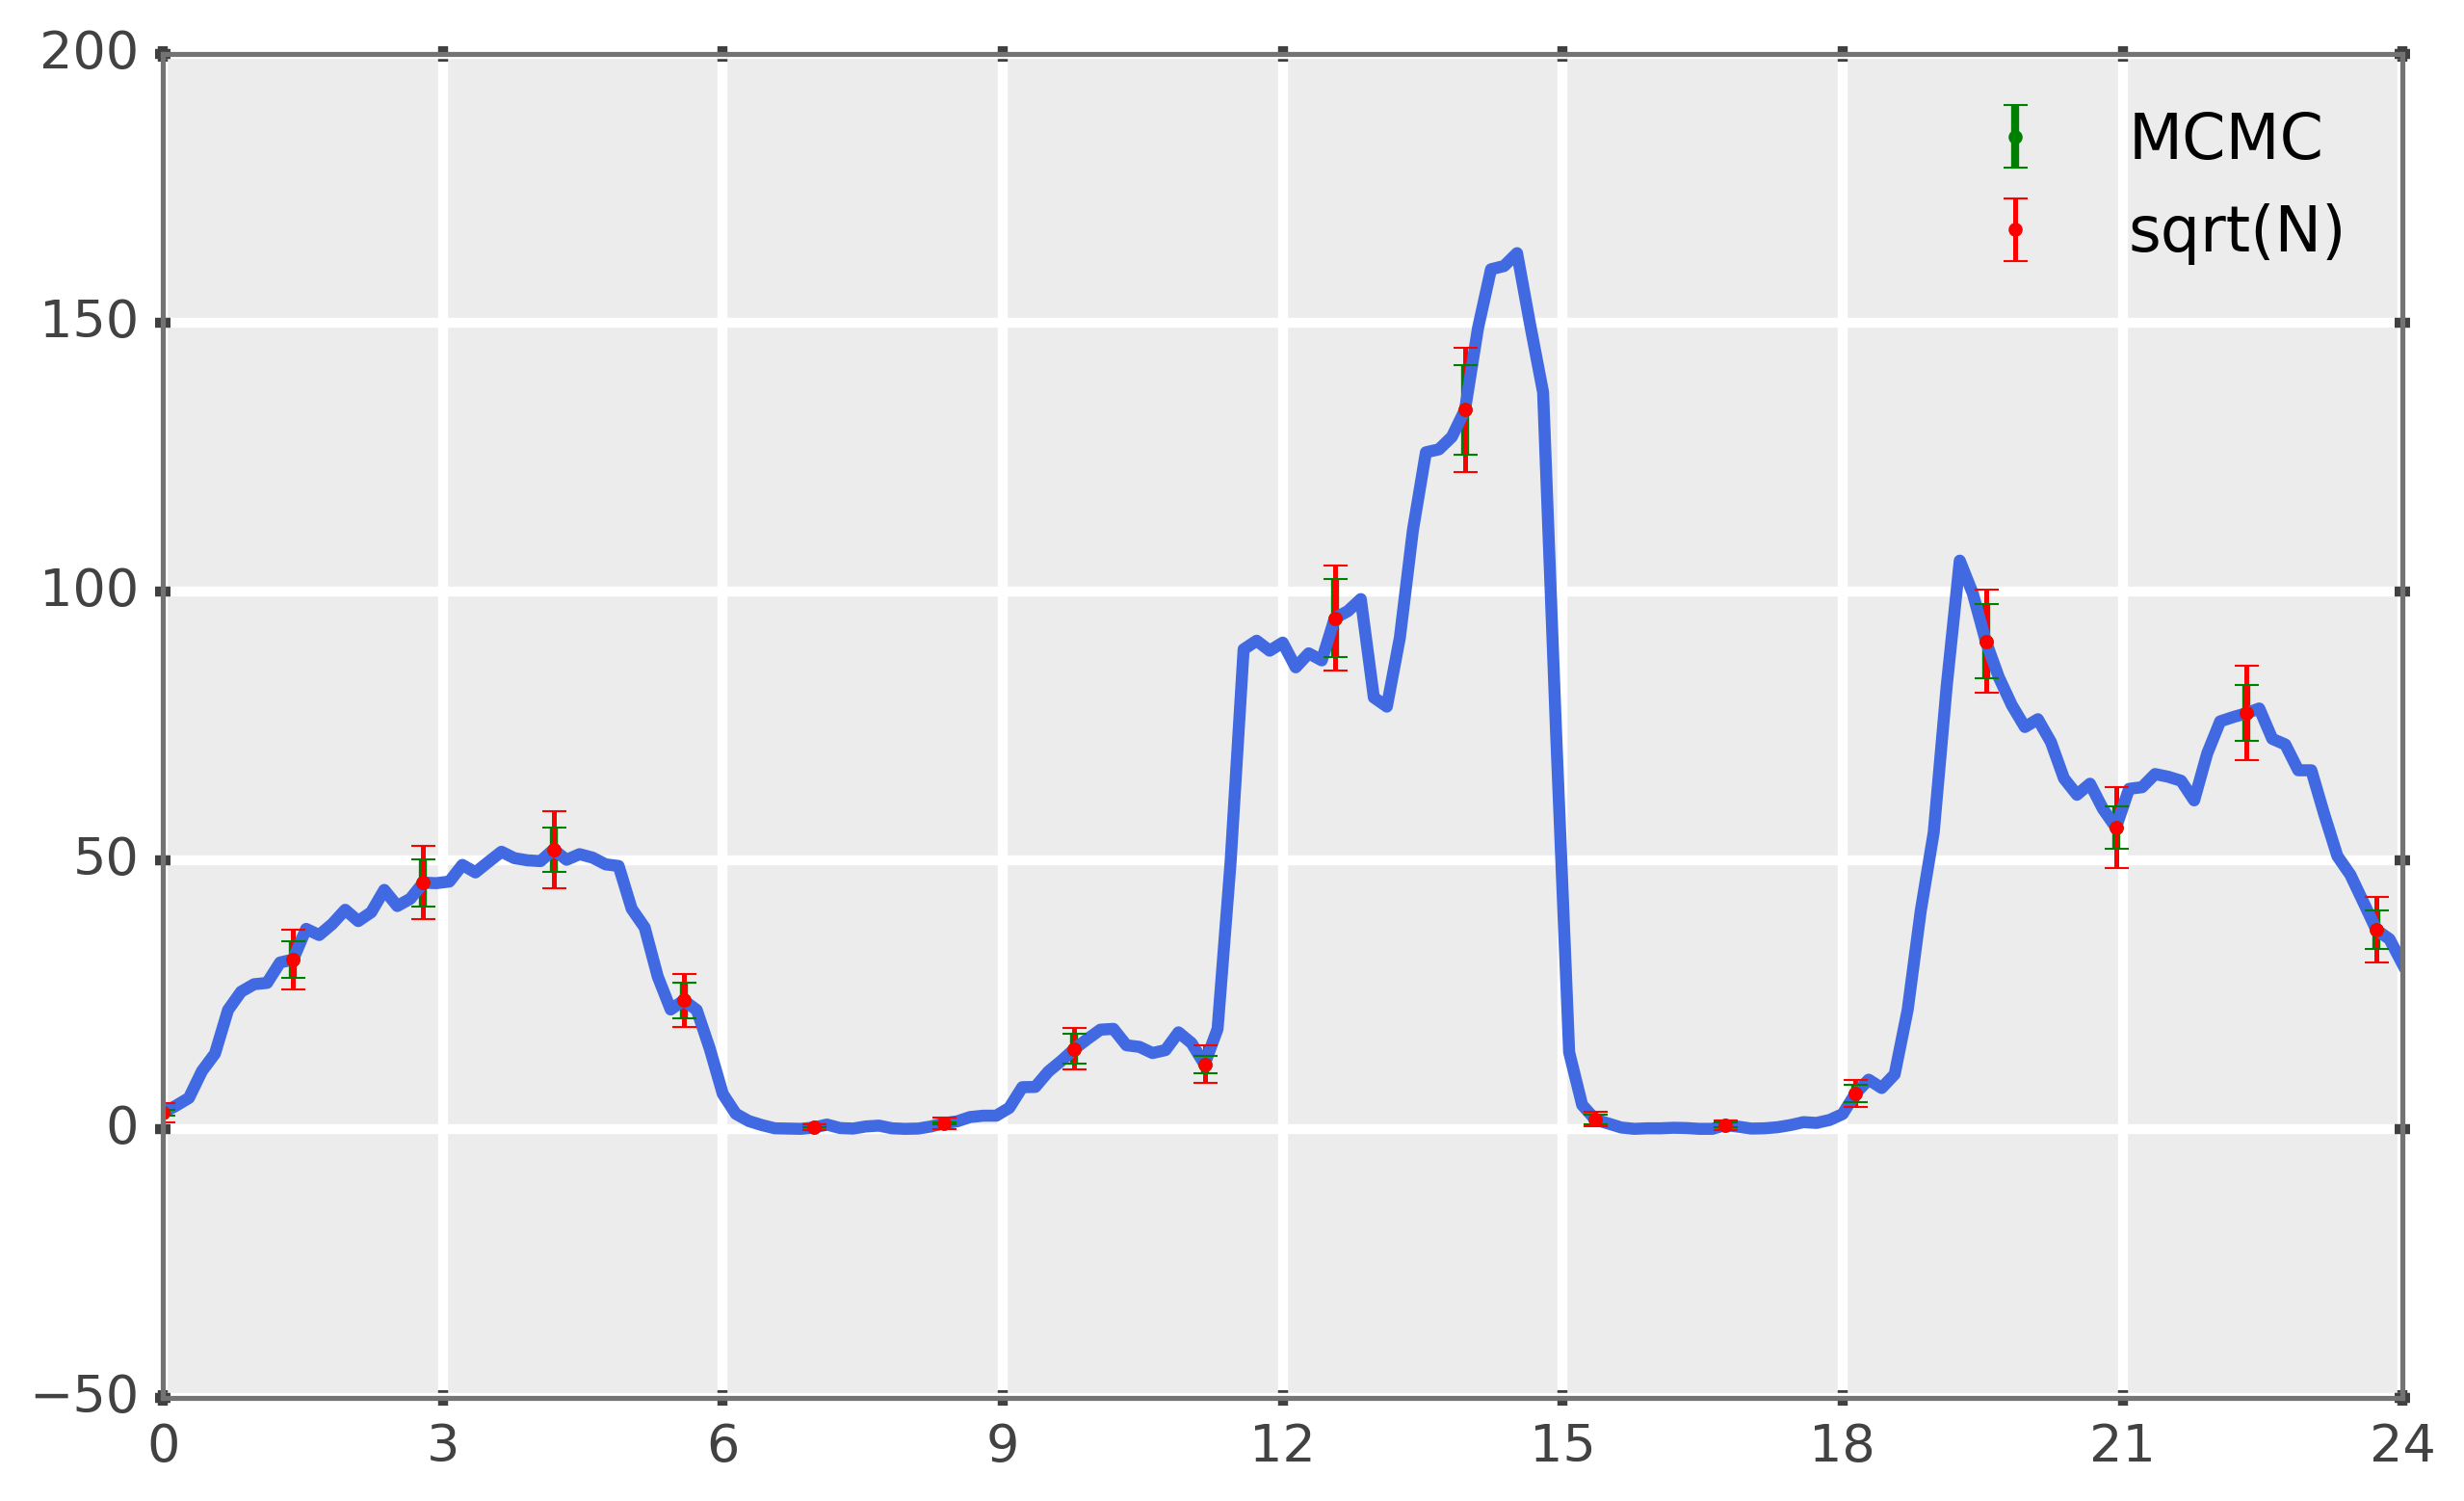

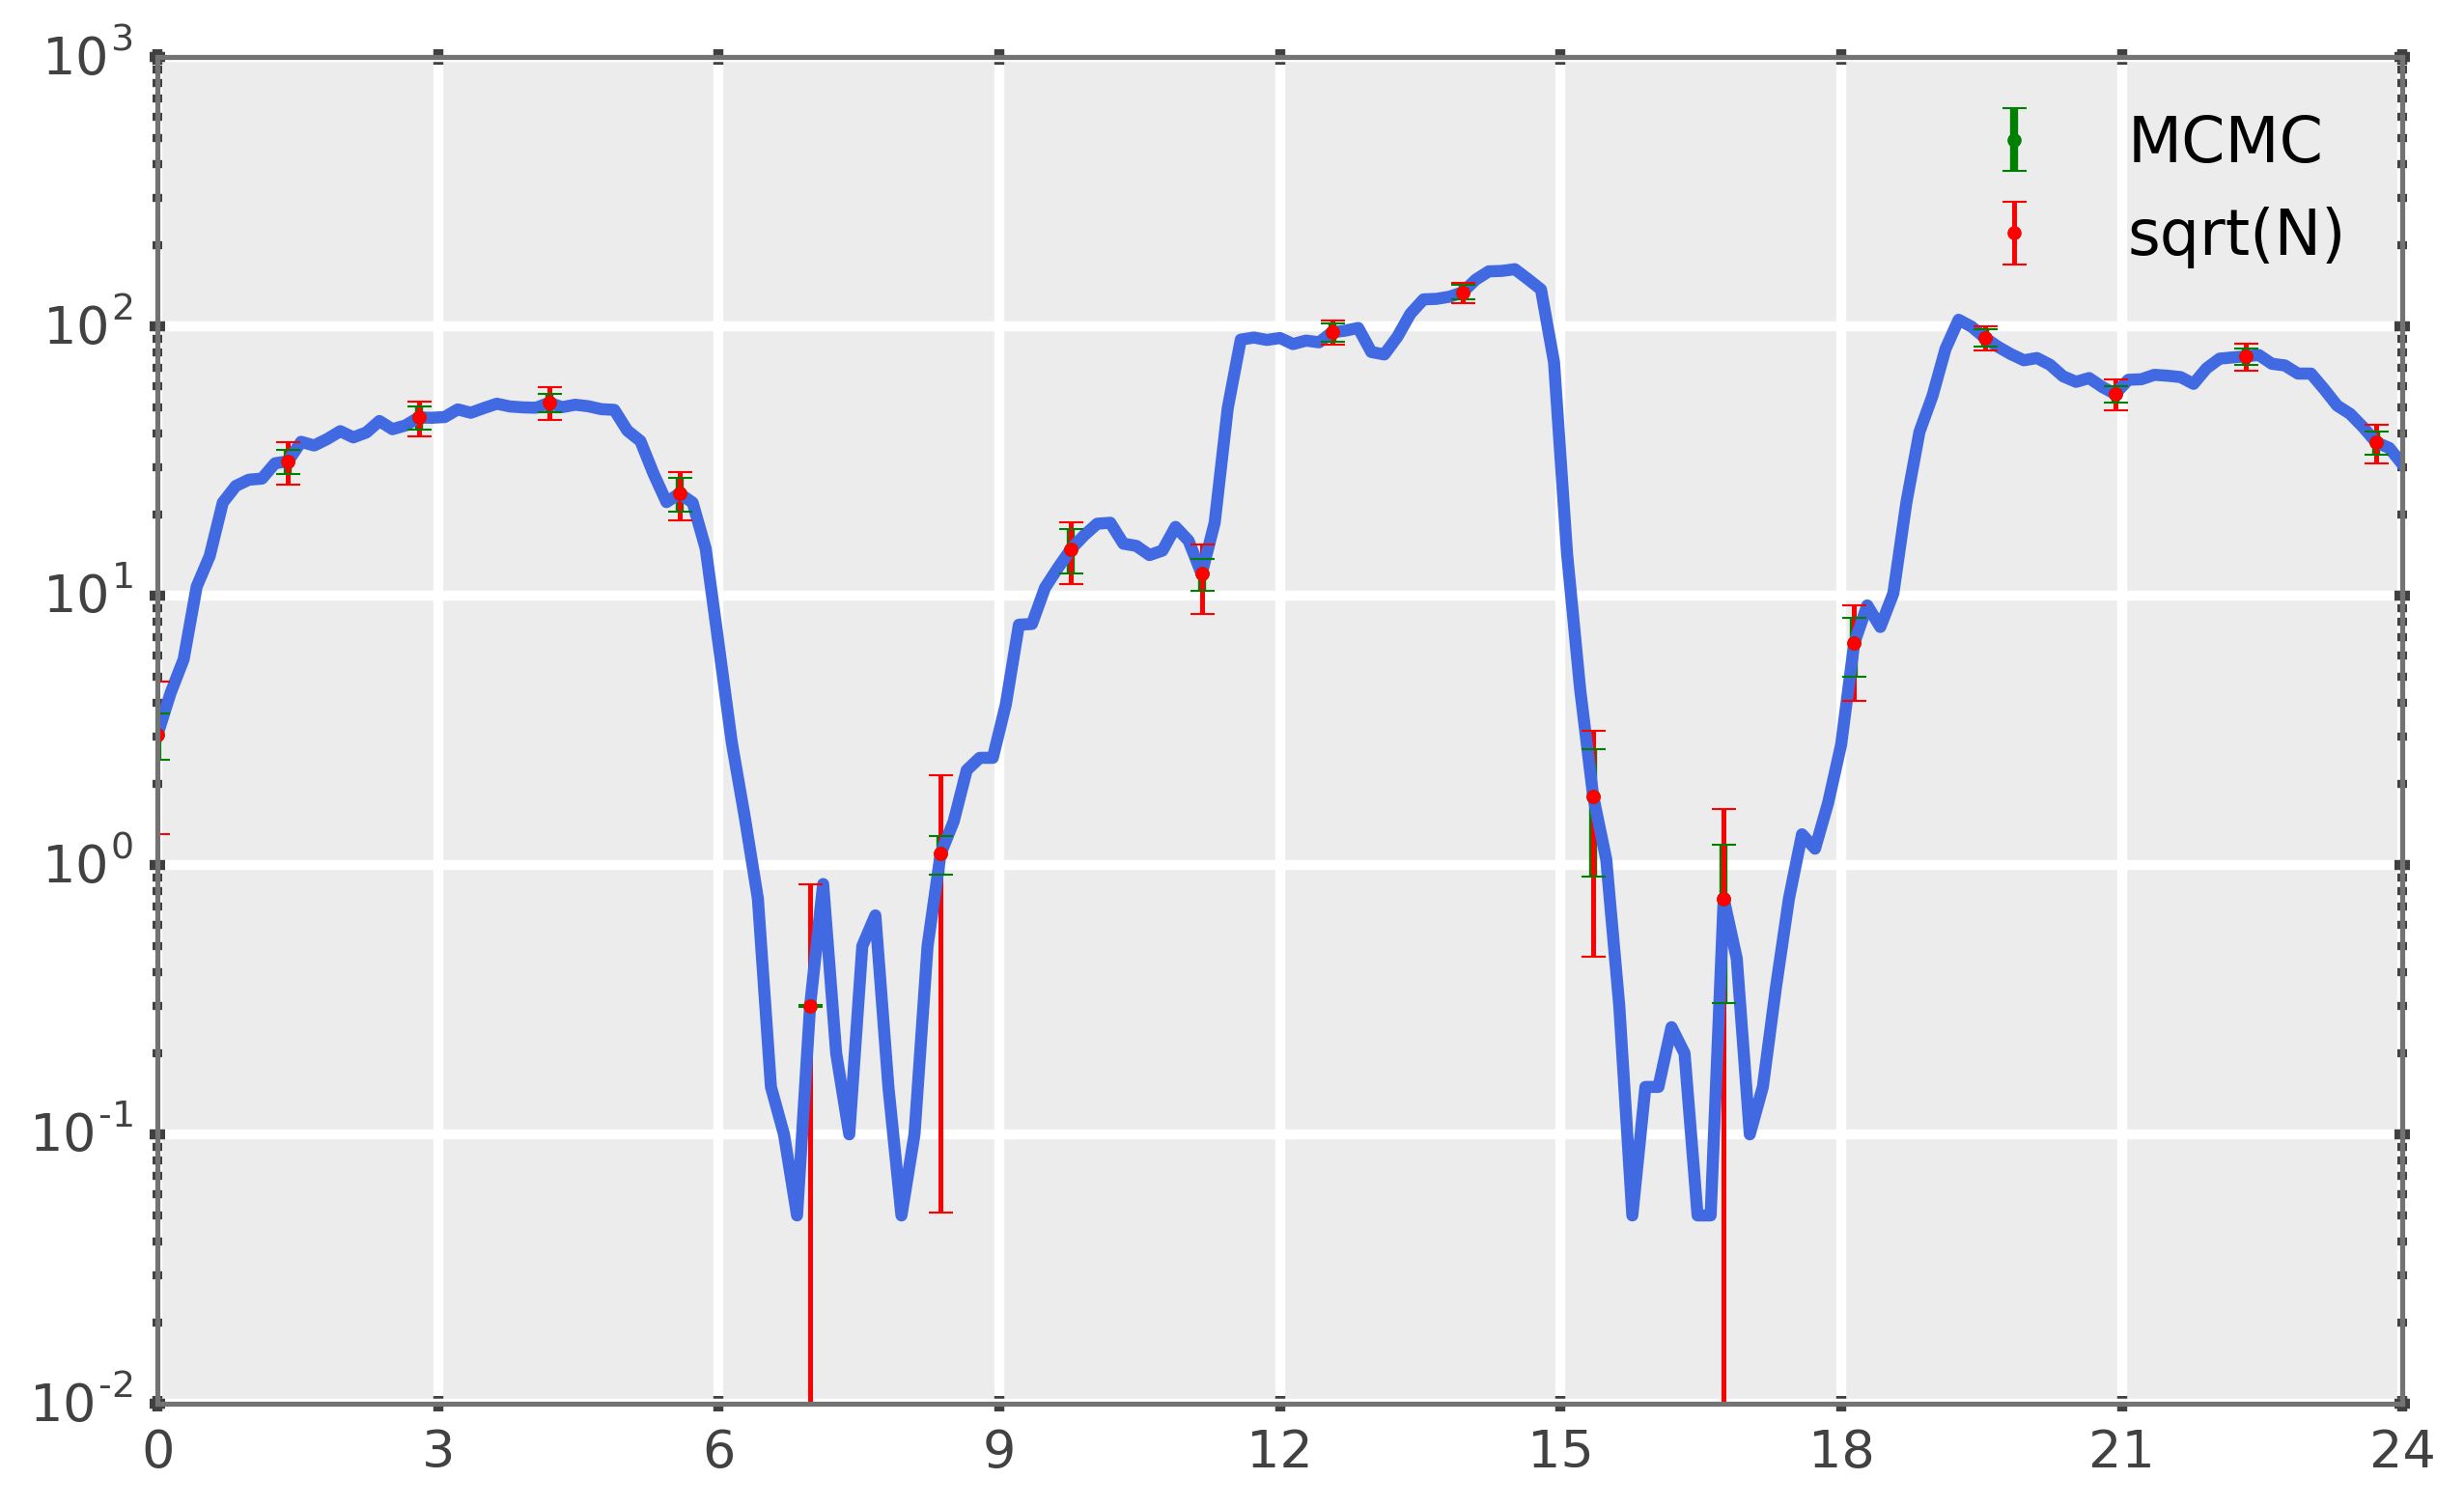

In [69]:
yerr = np.asarray(yerr)



spp.plt.figure()
spp.plot(np.linspace(0,24, len(data)), data, lw=3)
spp.plt.xticks((0,3,6,9,12,15,18,21,24))
spp.plt.xlim((0,24))

np.linspace(0,24, len(data))[::10]
print(yerr)

# put a sqrt(N) on there too
spp.plt.errorbar(np.linspace(0,24, len(data))[::10], data[::10], yerr=yerr_del, fmt='.', lw=2, c='g', label='MCMC')
spp.plt.errorbar(np.linspace(0,24, len(data))[::10], data[::10], yerr=np.sqrt(data[::10]), c='r', fmt='.', label='sqrt(N)')

spp.plt.legend()


spp.plt.figure()
spp.plot(np.linspace(0,24, len(data)), data, lw=3)
spp.plt.xticks((0,3,6,9,12,15,18,21,24))
spp.plt.xlim((0,24))

np.linspace(0,24, len(data))[::10]
print(yerr)

spp.plt.errorbar(np.linspace(0,24, len(data))[::10], data[::10], yerr=yerr_del, fmt='.', lw=2, c='g', label='MCMC')
spp.plt.errorbar(np.linspace(0,24, len(data))[::10], data[::10], yerr=np.sqrt(data[::10]), c='r', fmt='.', label='sqrt(N)')
spp.plt.legend()

spp.plt.yscale('log')


# spp.plt.figure()
# spp.plt.semilogy(np.linspace(0,24, len(data)), data, lw=3)
# spp.plt.xticks((0,3,6,9,12,15,18,21,24))
# spp.plt.xlim((0,24))

So one can precompute all the Poisson error bars for counts and just look them up )or likely there is a function for this analytically).

# Look into doing DLM

### http://helios.fmi.fi/~lainema/dlm/dlmtut.html
These data are to fit the model:

$
y_t = \mu_t + \epsilon_{obs} \\
\mu_t = \mu_{t-1} + \alpha_{t-1} + \epsilon_{level} \\
\alpha_t = \alpha_{t-1} + \epsilon_{trend}
$


$\epsilon_{obs} \sim N(o,\sigma^2_{obs}) $, obervations 

$\epsilon_{level} \sim N(o,\sigma^2_{level}) $, local level 

$\epsilon_{trend} \sim N(o,\sigma^2_{trend}) $, local trend 

I don't understand this part but this then is supposed to be:

$G=
\begin{bmatrix}
    1 & 1 \\
    0 & 1
\end{bmatrix}, 
F=\begin{bmatrix}1~0\end{bmatrix}, 
x_t=\begin{bmatrix}\mu_t ~ \alpha_t\end{bmatrix}^T
$


In [73]:
import pymc

data_step = 10

# so see if we can create the model
y_mod = [] # what we observe
mu_mod = [pymc.Uniform('mu_{0}'.format(ii), 0, 1e3)] # what we want!
alpha_mod = [] # the trend


for i, v in enumerate(data[data_step::data_step], data_step):
    ii = i*data_step
    mu_mod.append(pymc.Uniform('mu_{0}'.format(ii), 0, 1e3))
    y_mod.append(pymc.Poisson('y'.format(ii), mu_mod, observed=True, value=v))
    
    



In [74]:
model = pymc.MCMC((mu_mod, y_mod))

In [81]:
model.sample(10000, 1000, burn_till_tuned=True, thin=10)

 [-----------------100%-----------------] 14000 of 14000 complete in 25.2 sec

{'mu_0': {'95% HPD interval': array([ 34.75743787,  40.43029887]),
          'mc error': 0.048910371072974593,
          'mean': 37.576636293217248,
          'n': 4900,
          'quantiles': {2.5: 34.710221674637651,
                        25: 36.489983761781147,
                        50: 37.496540966443561,
                        75: 38.563833480946229,
                        97.5: 40.406819570280398},
          'standard deviation': 1.4681269419380243},
 'mu_10': {'95% HPD interval': array([  30.30918005,  980.16762576]),
           'mc error': 7.9231951261364468,
           'mean': 487.95541911308788,
           'n': 4900,
           'quantiles': {2.5: 26.072859300971459,
                         25: 225.74785764163533,
                         50: 480.12240533579586,
                         75: 737.56900342916867,
                         97.5: 976.59500699854812},
           'standard deviation': 291.05670642129007},
 'mu_100': {'95% HPD interval': array([  18.09277704,  9

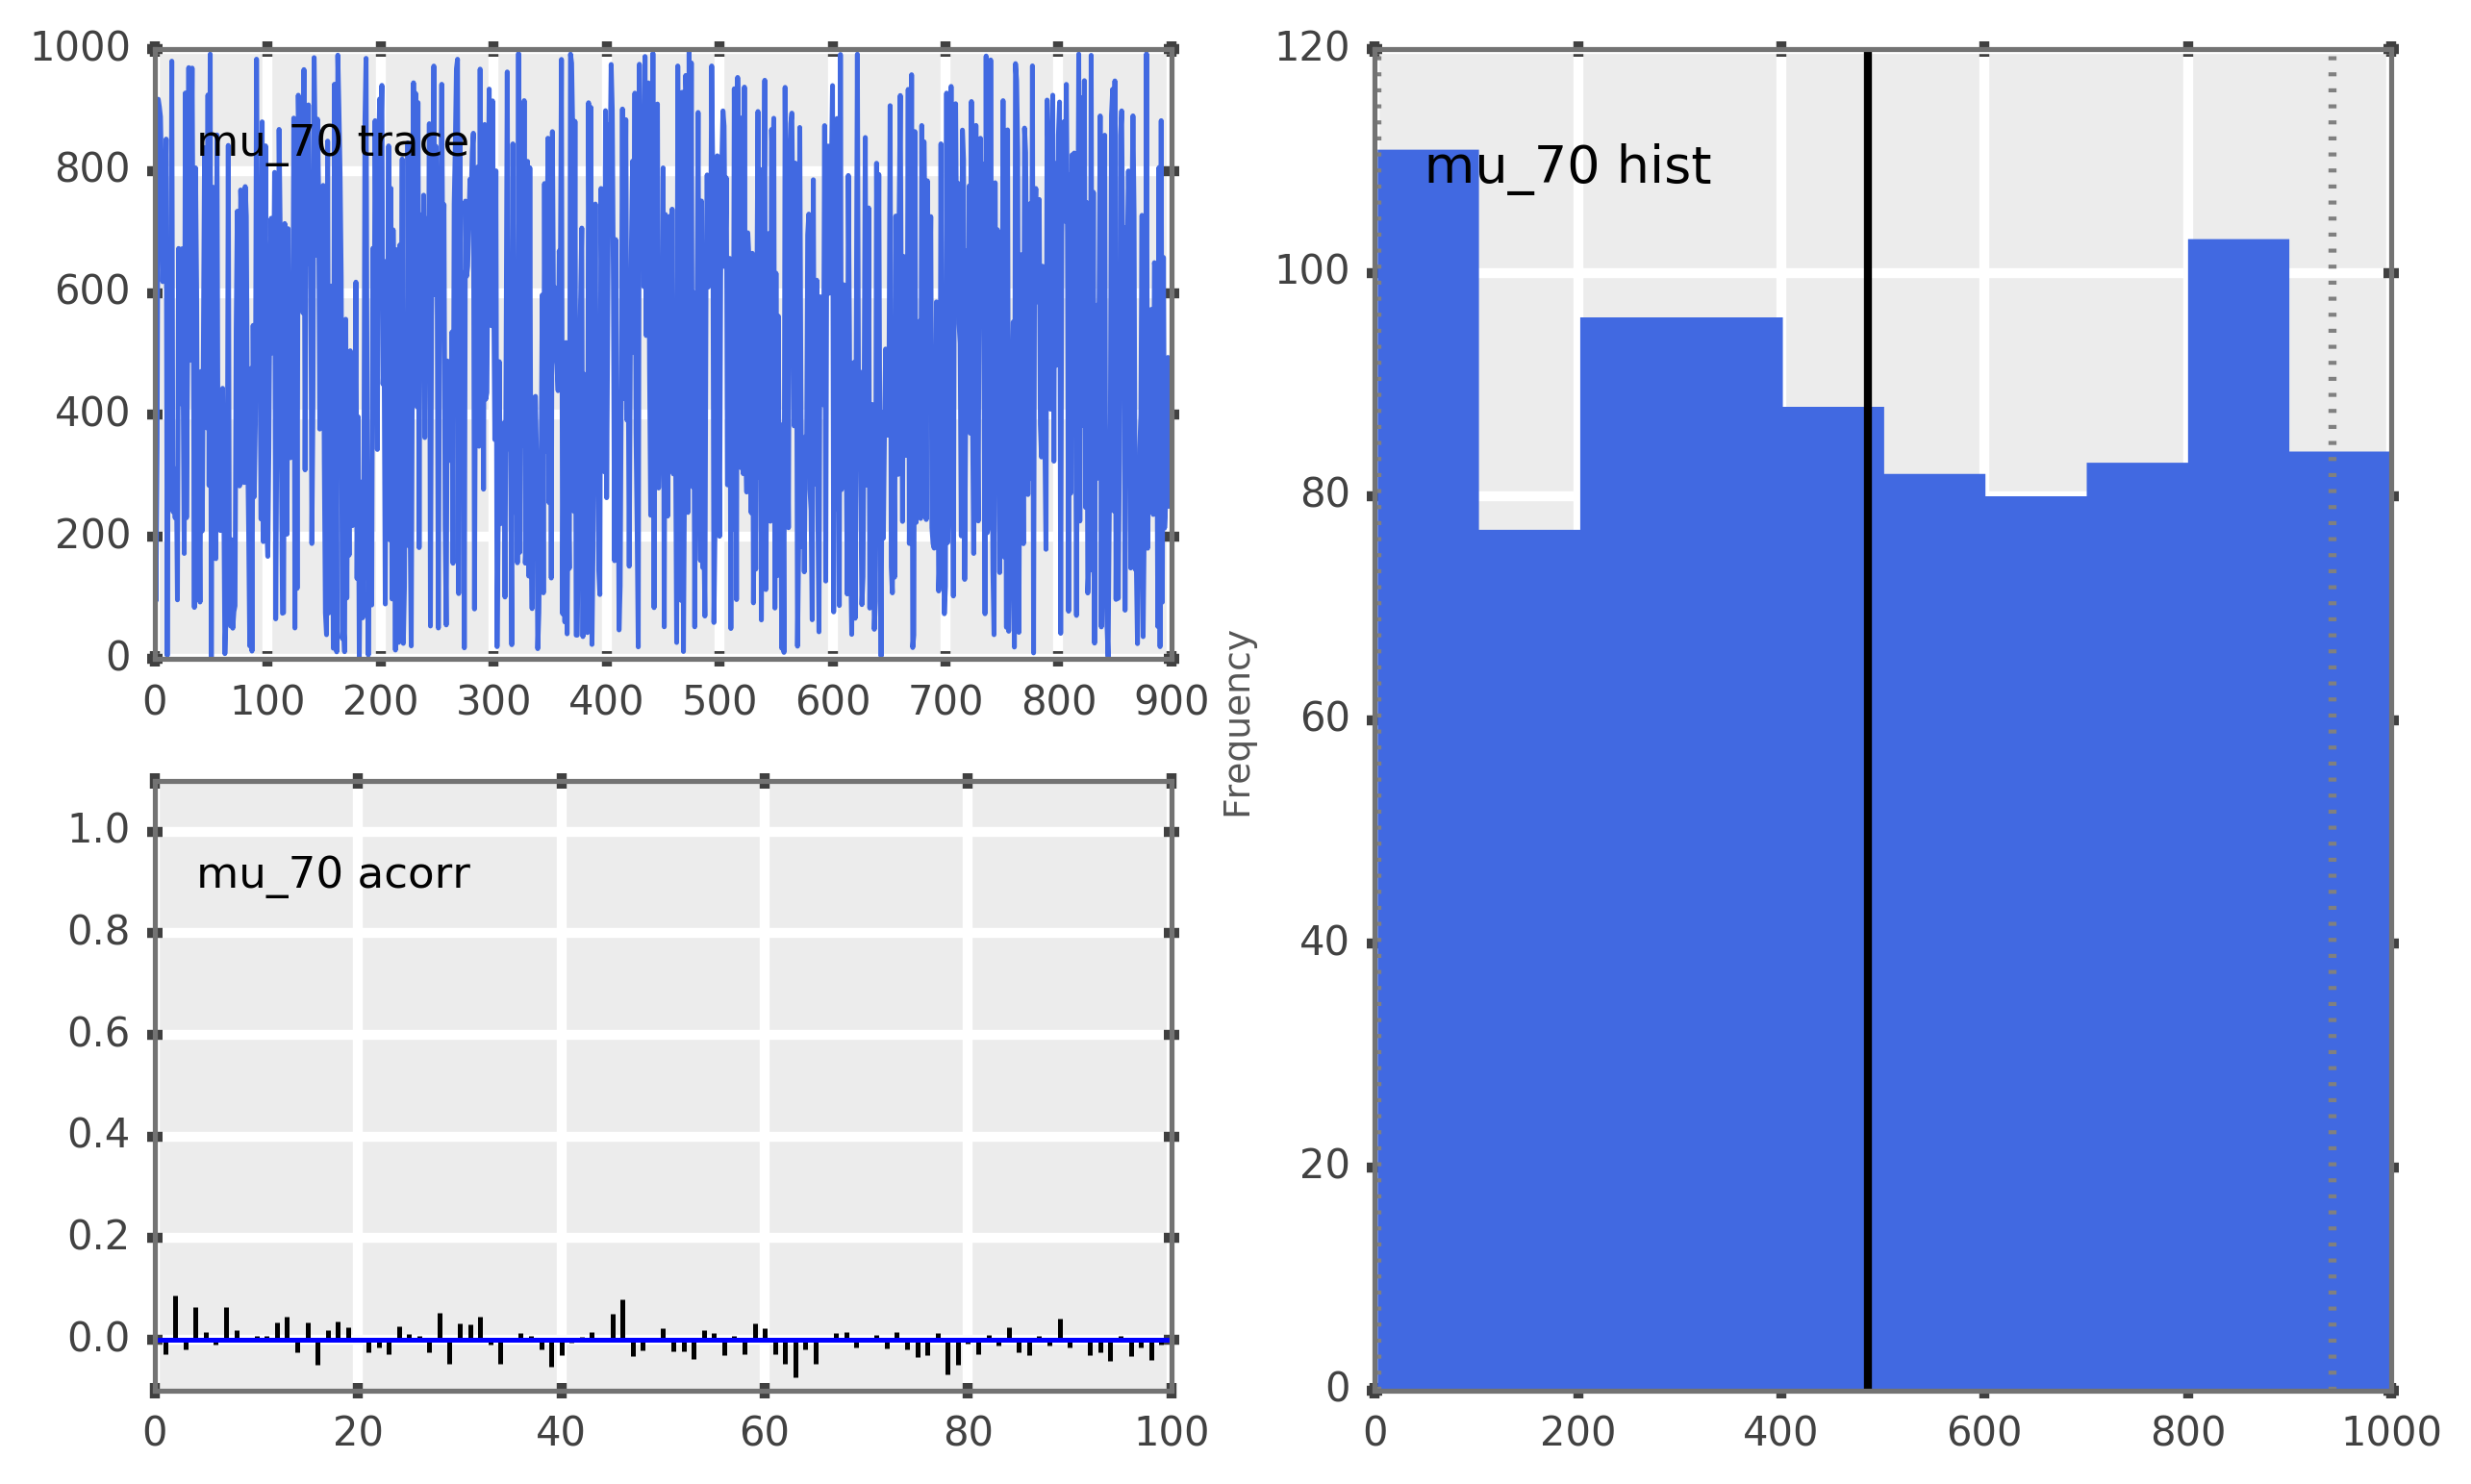

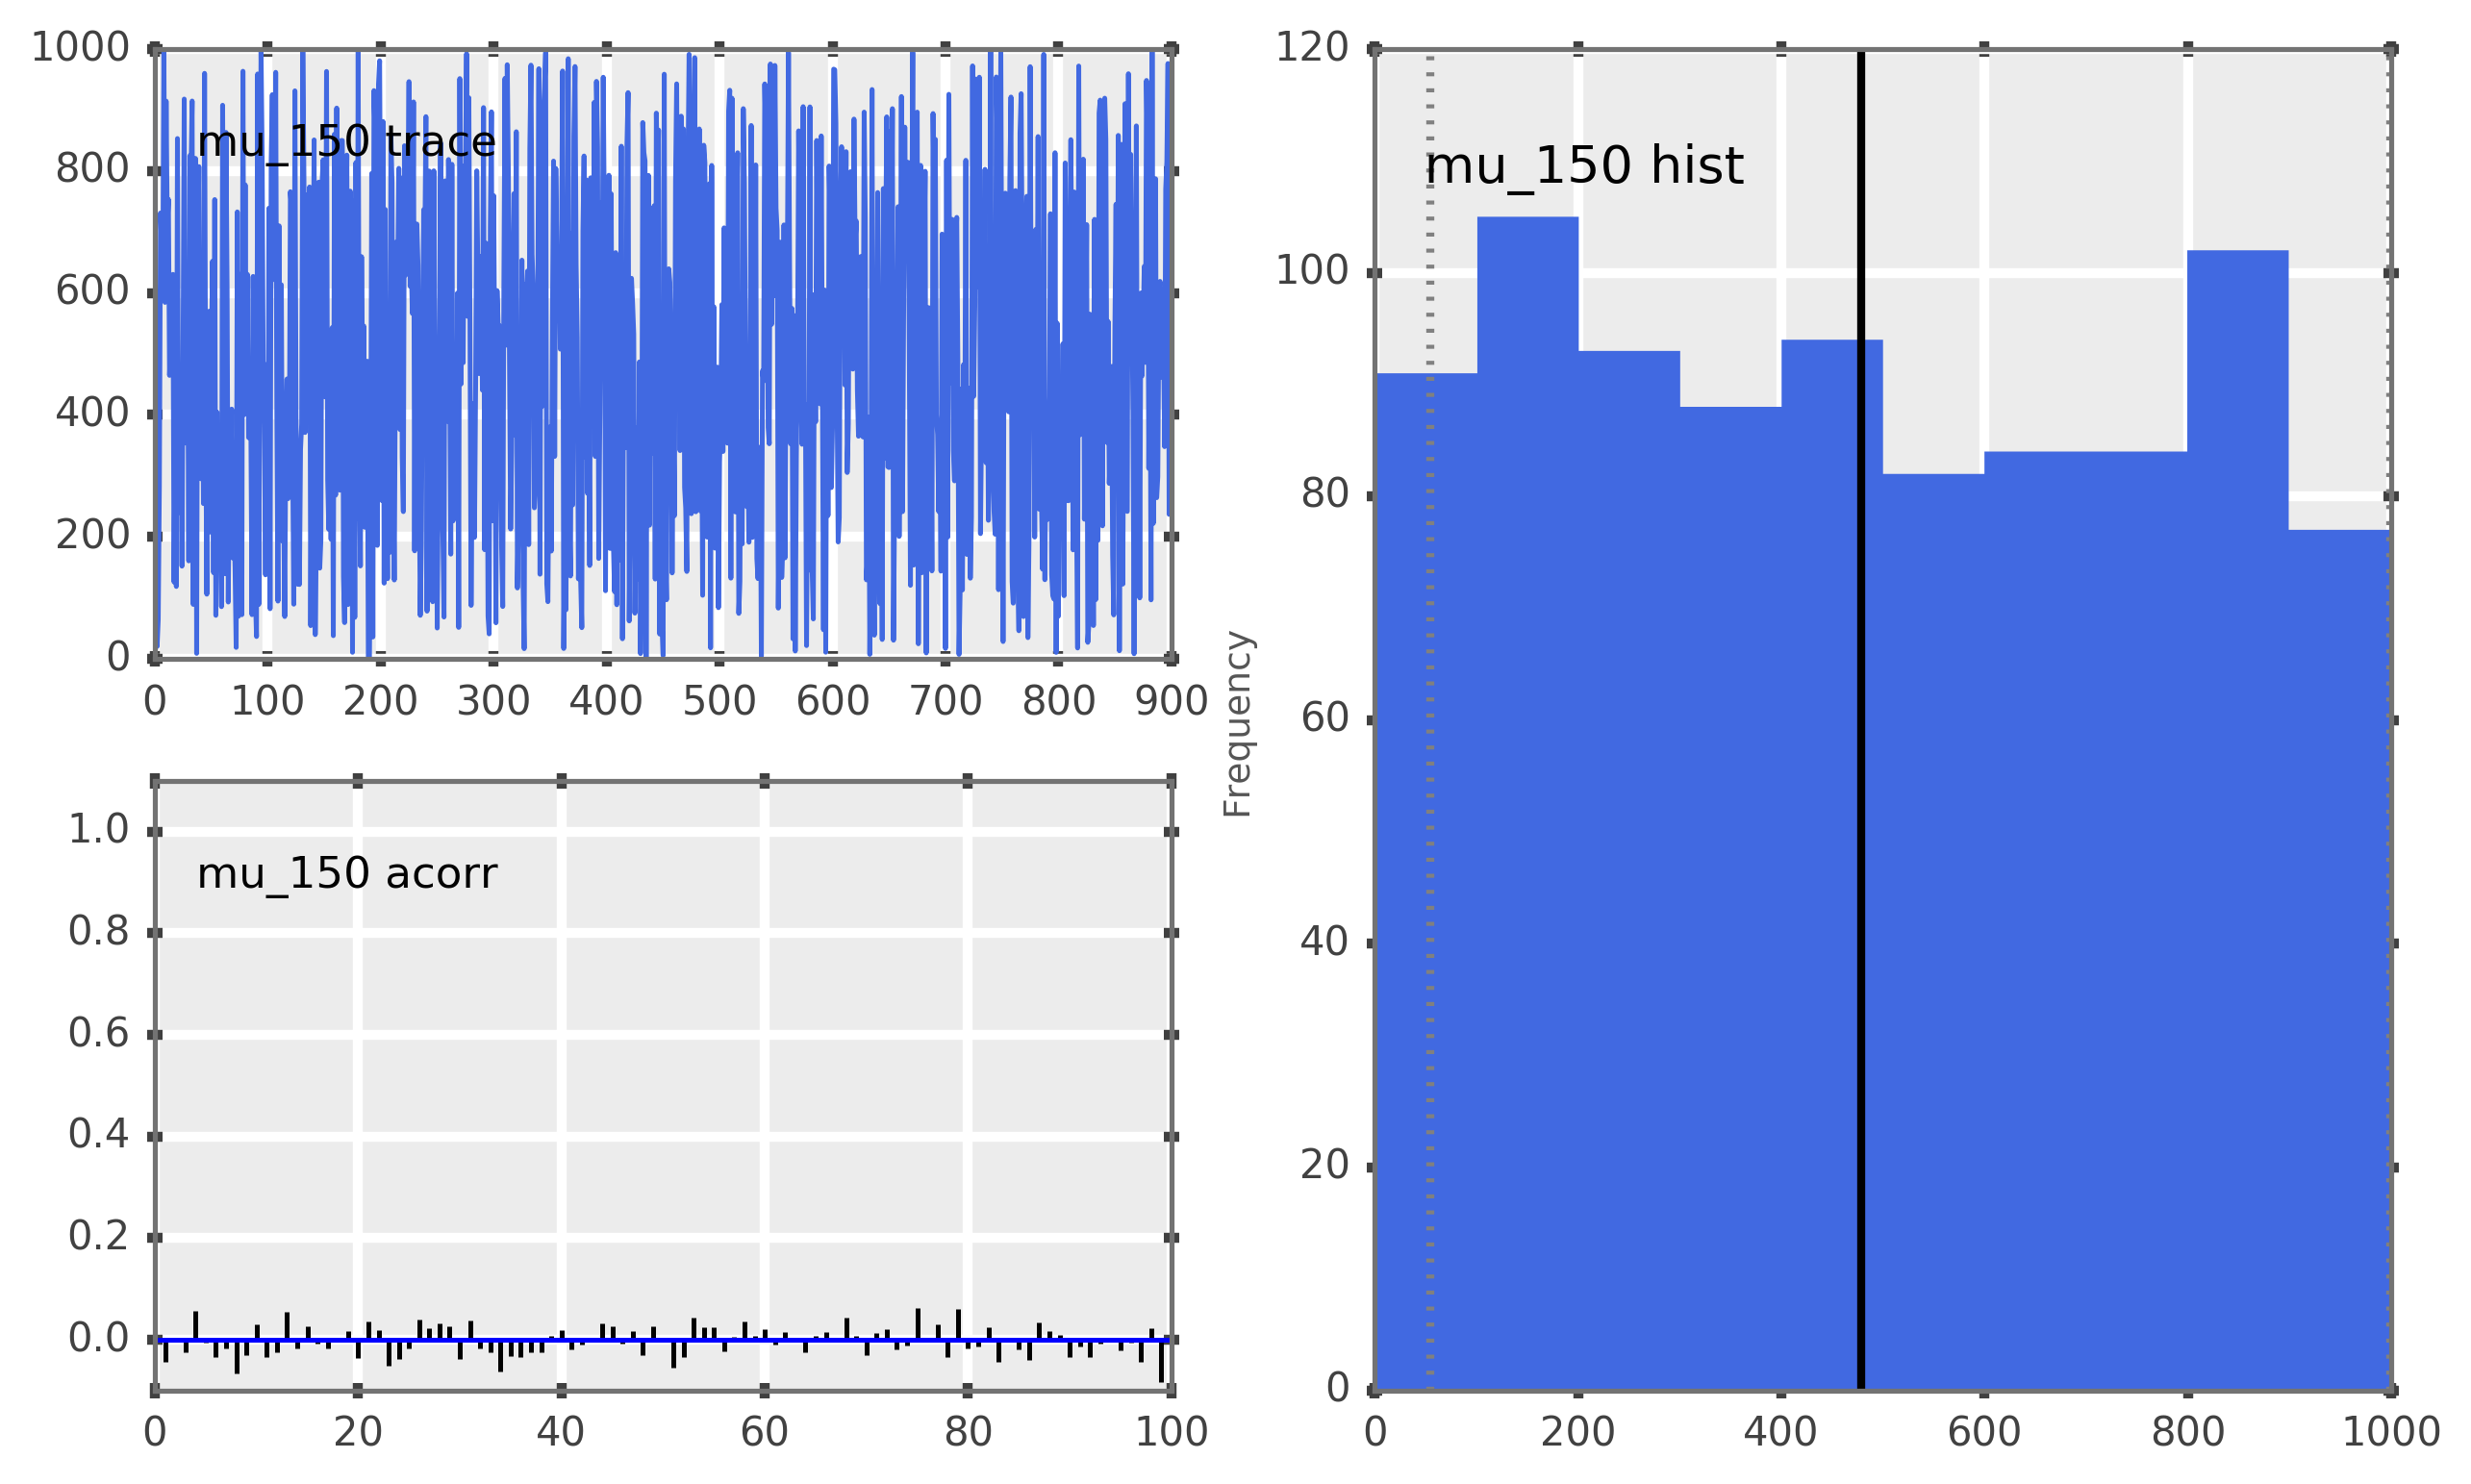

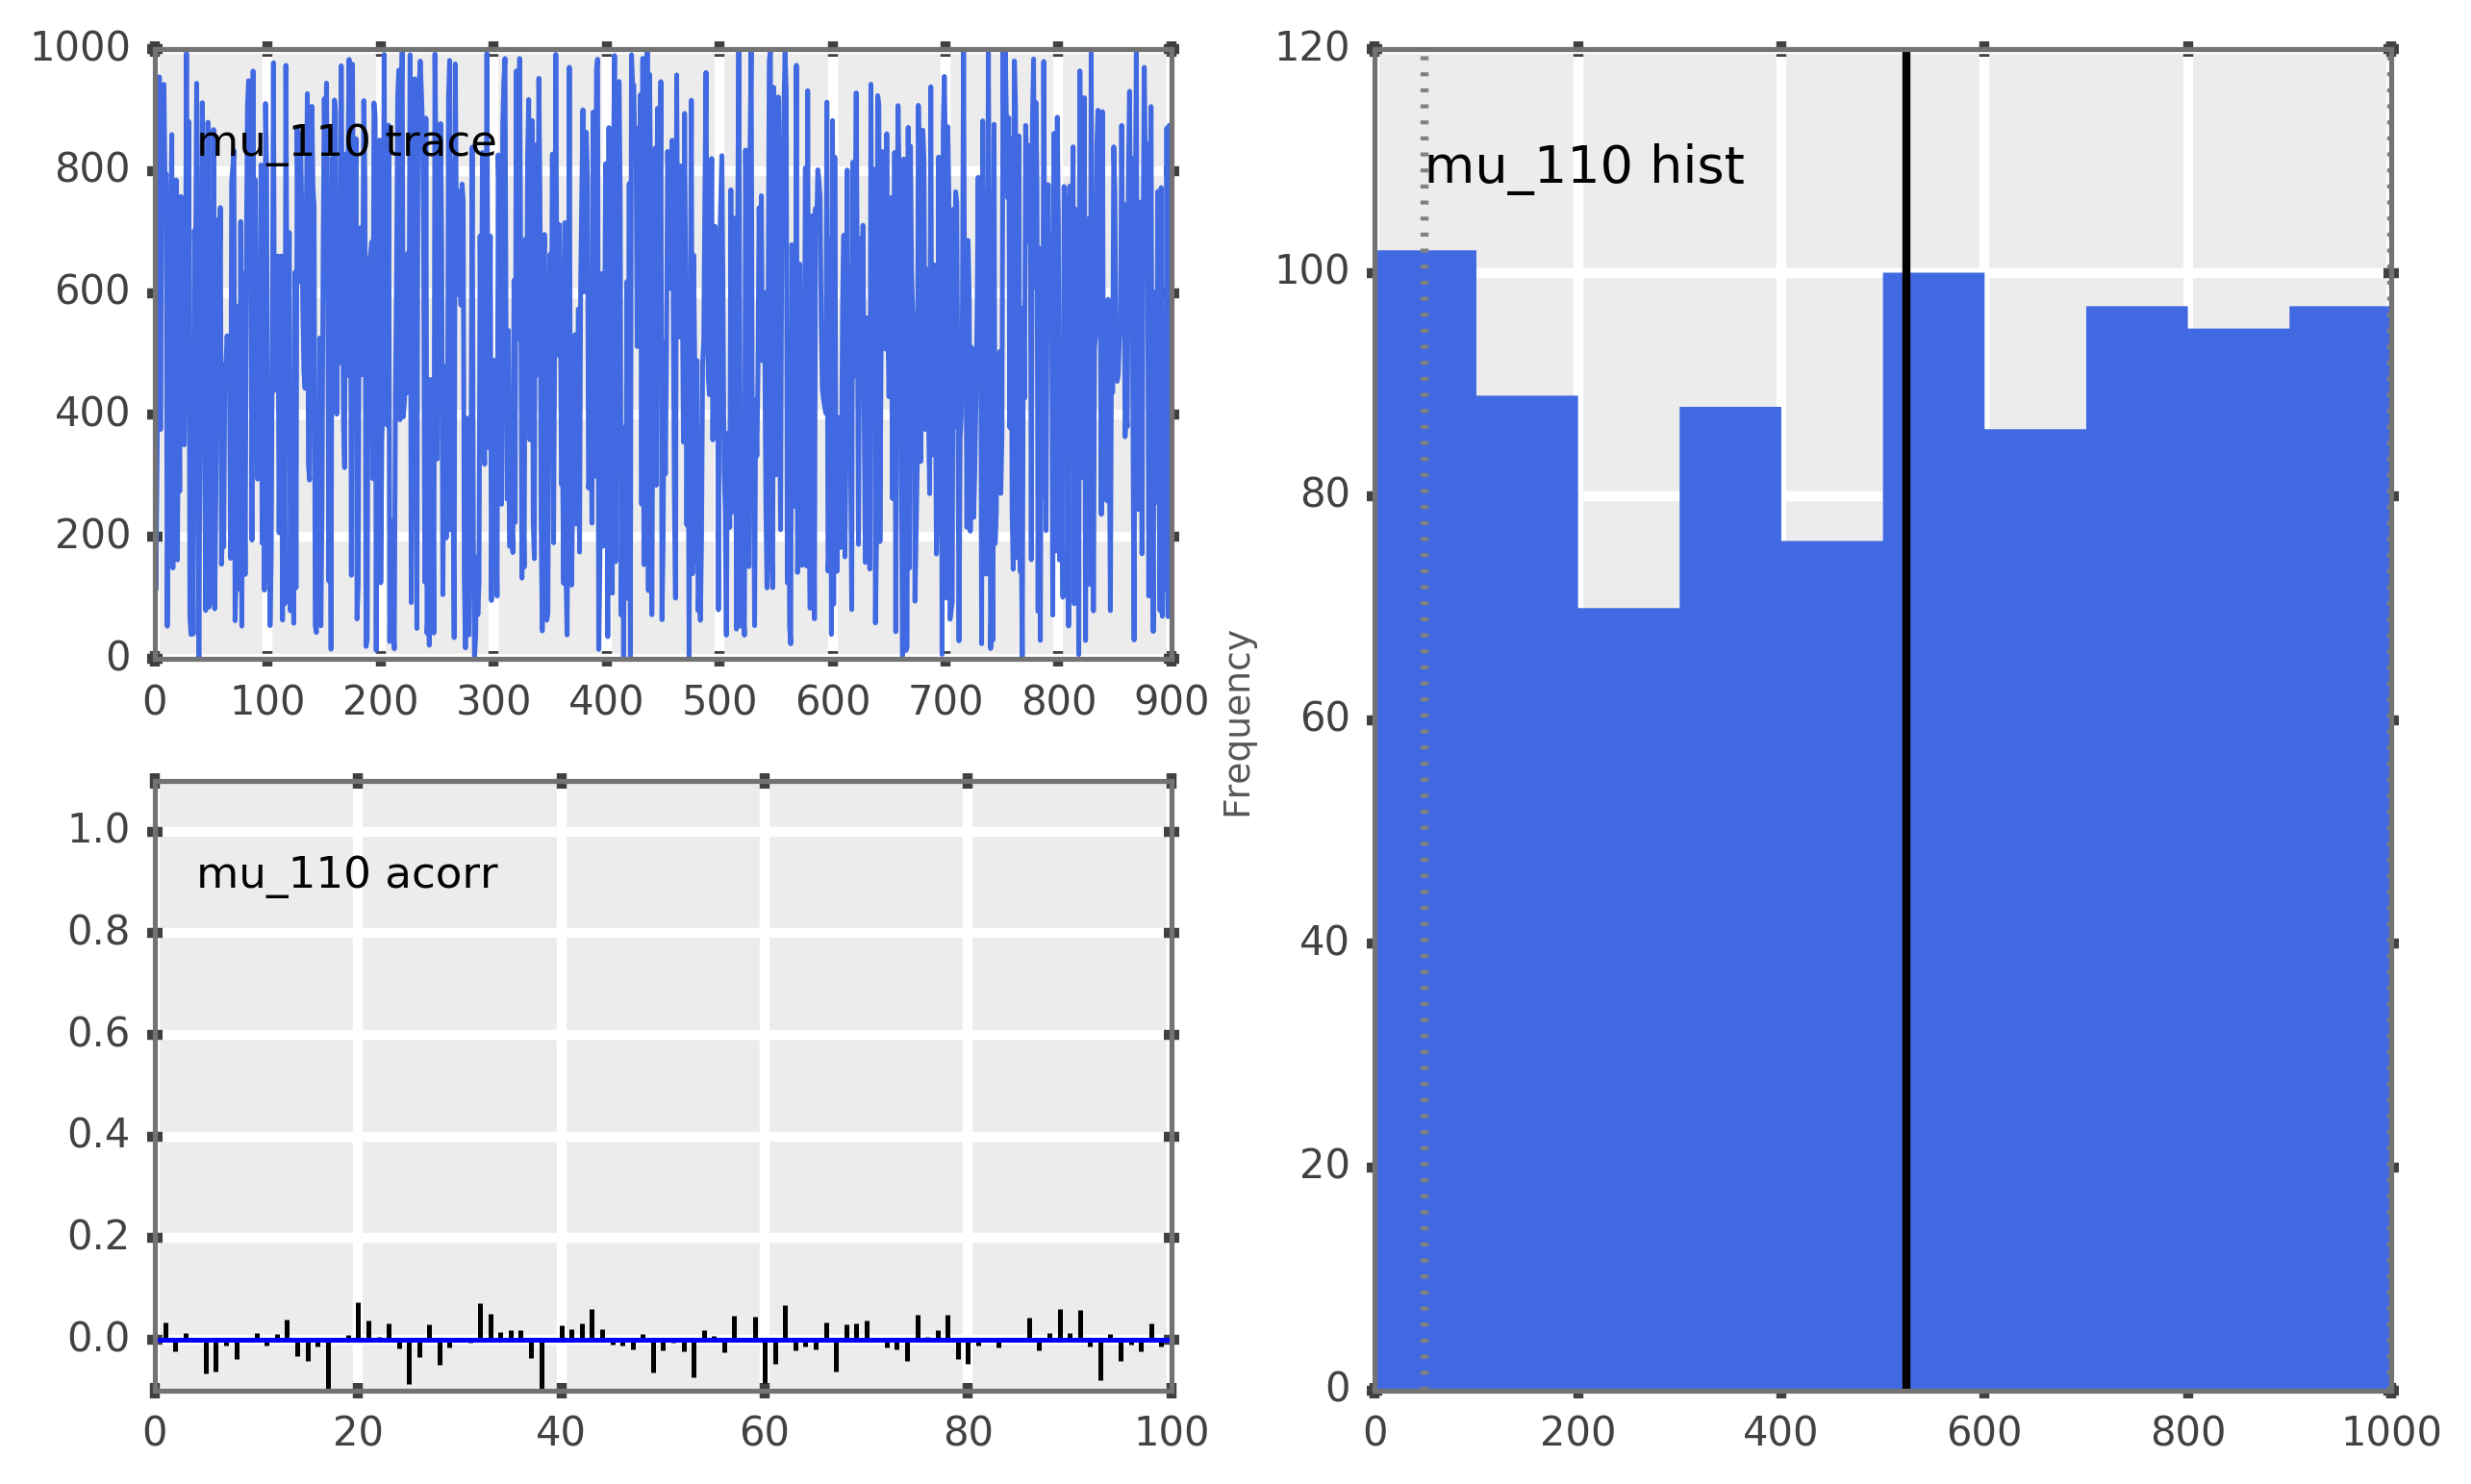

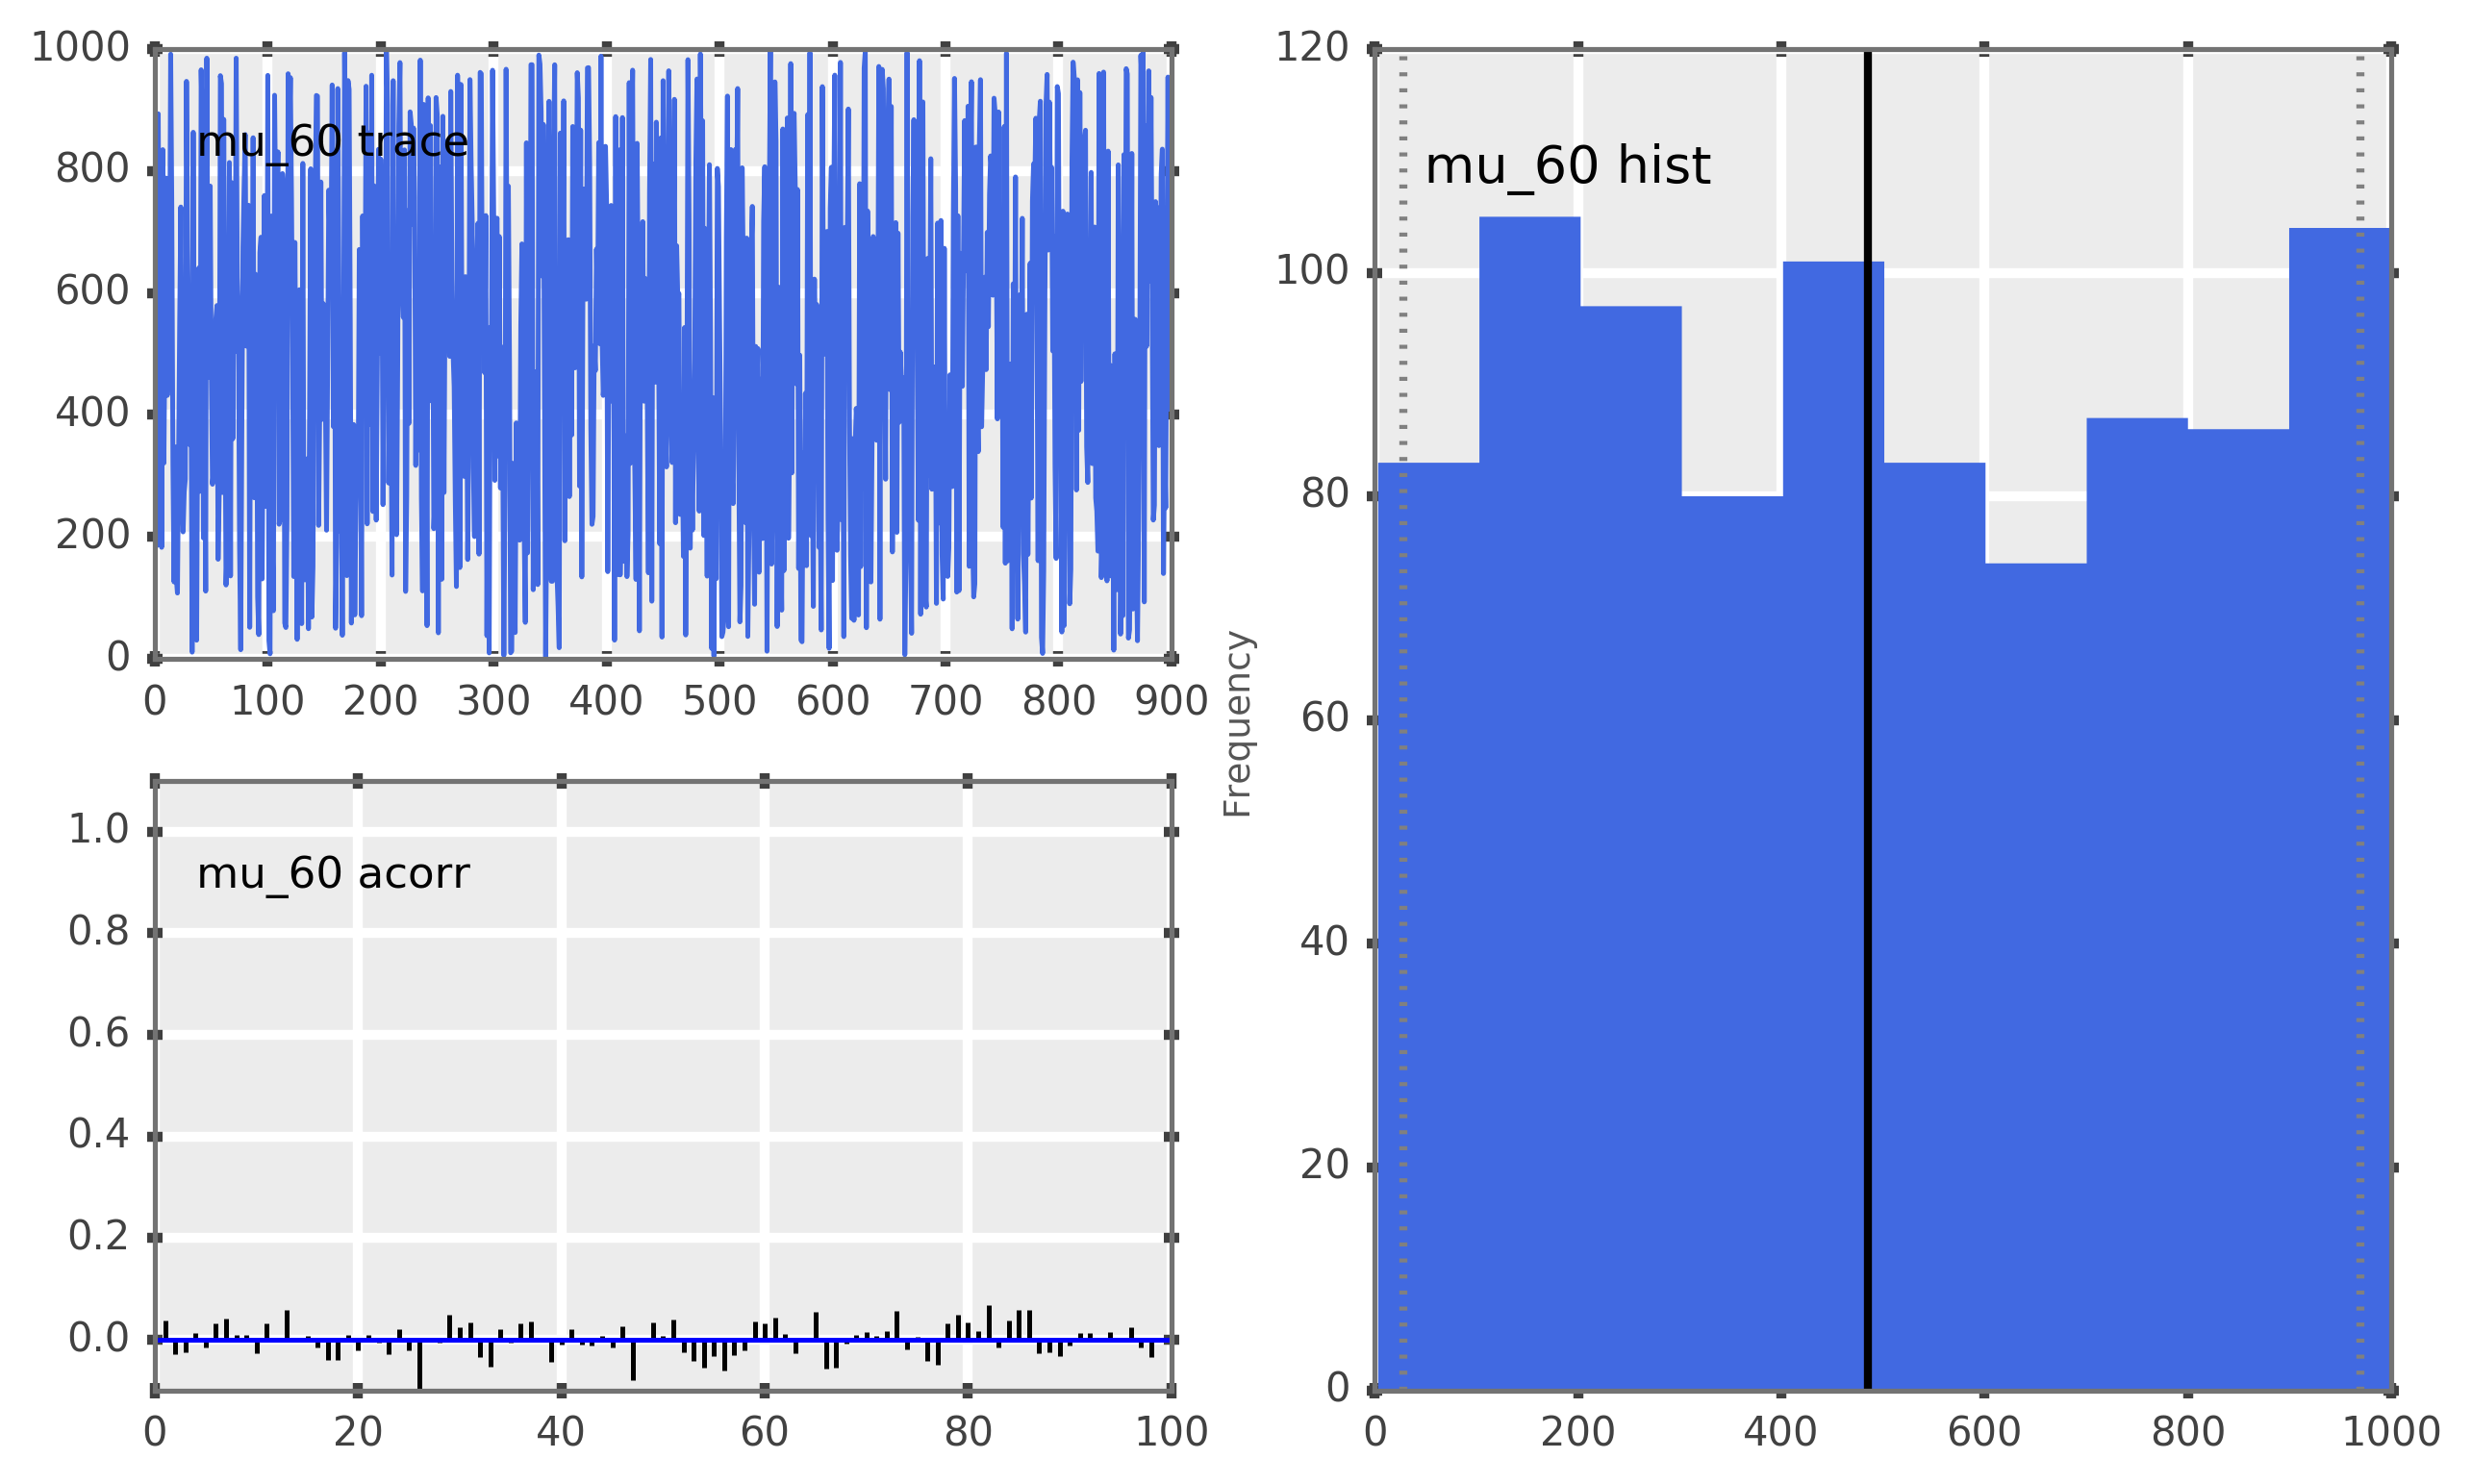

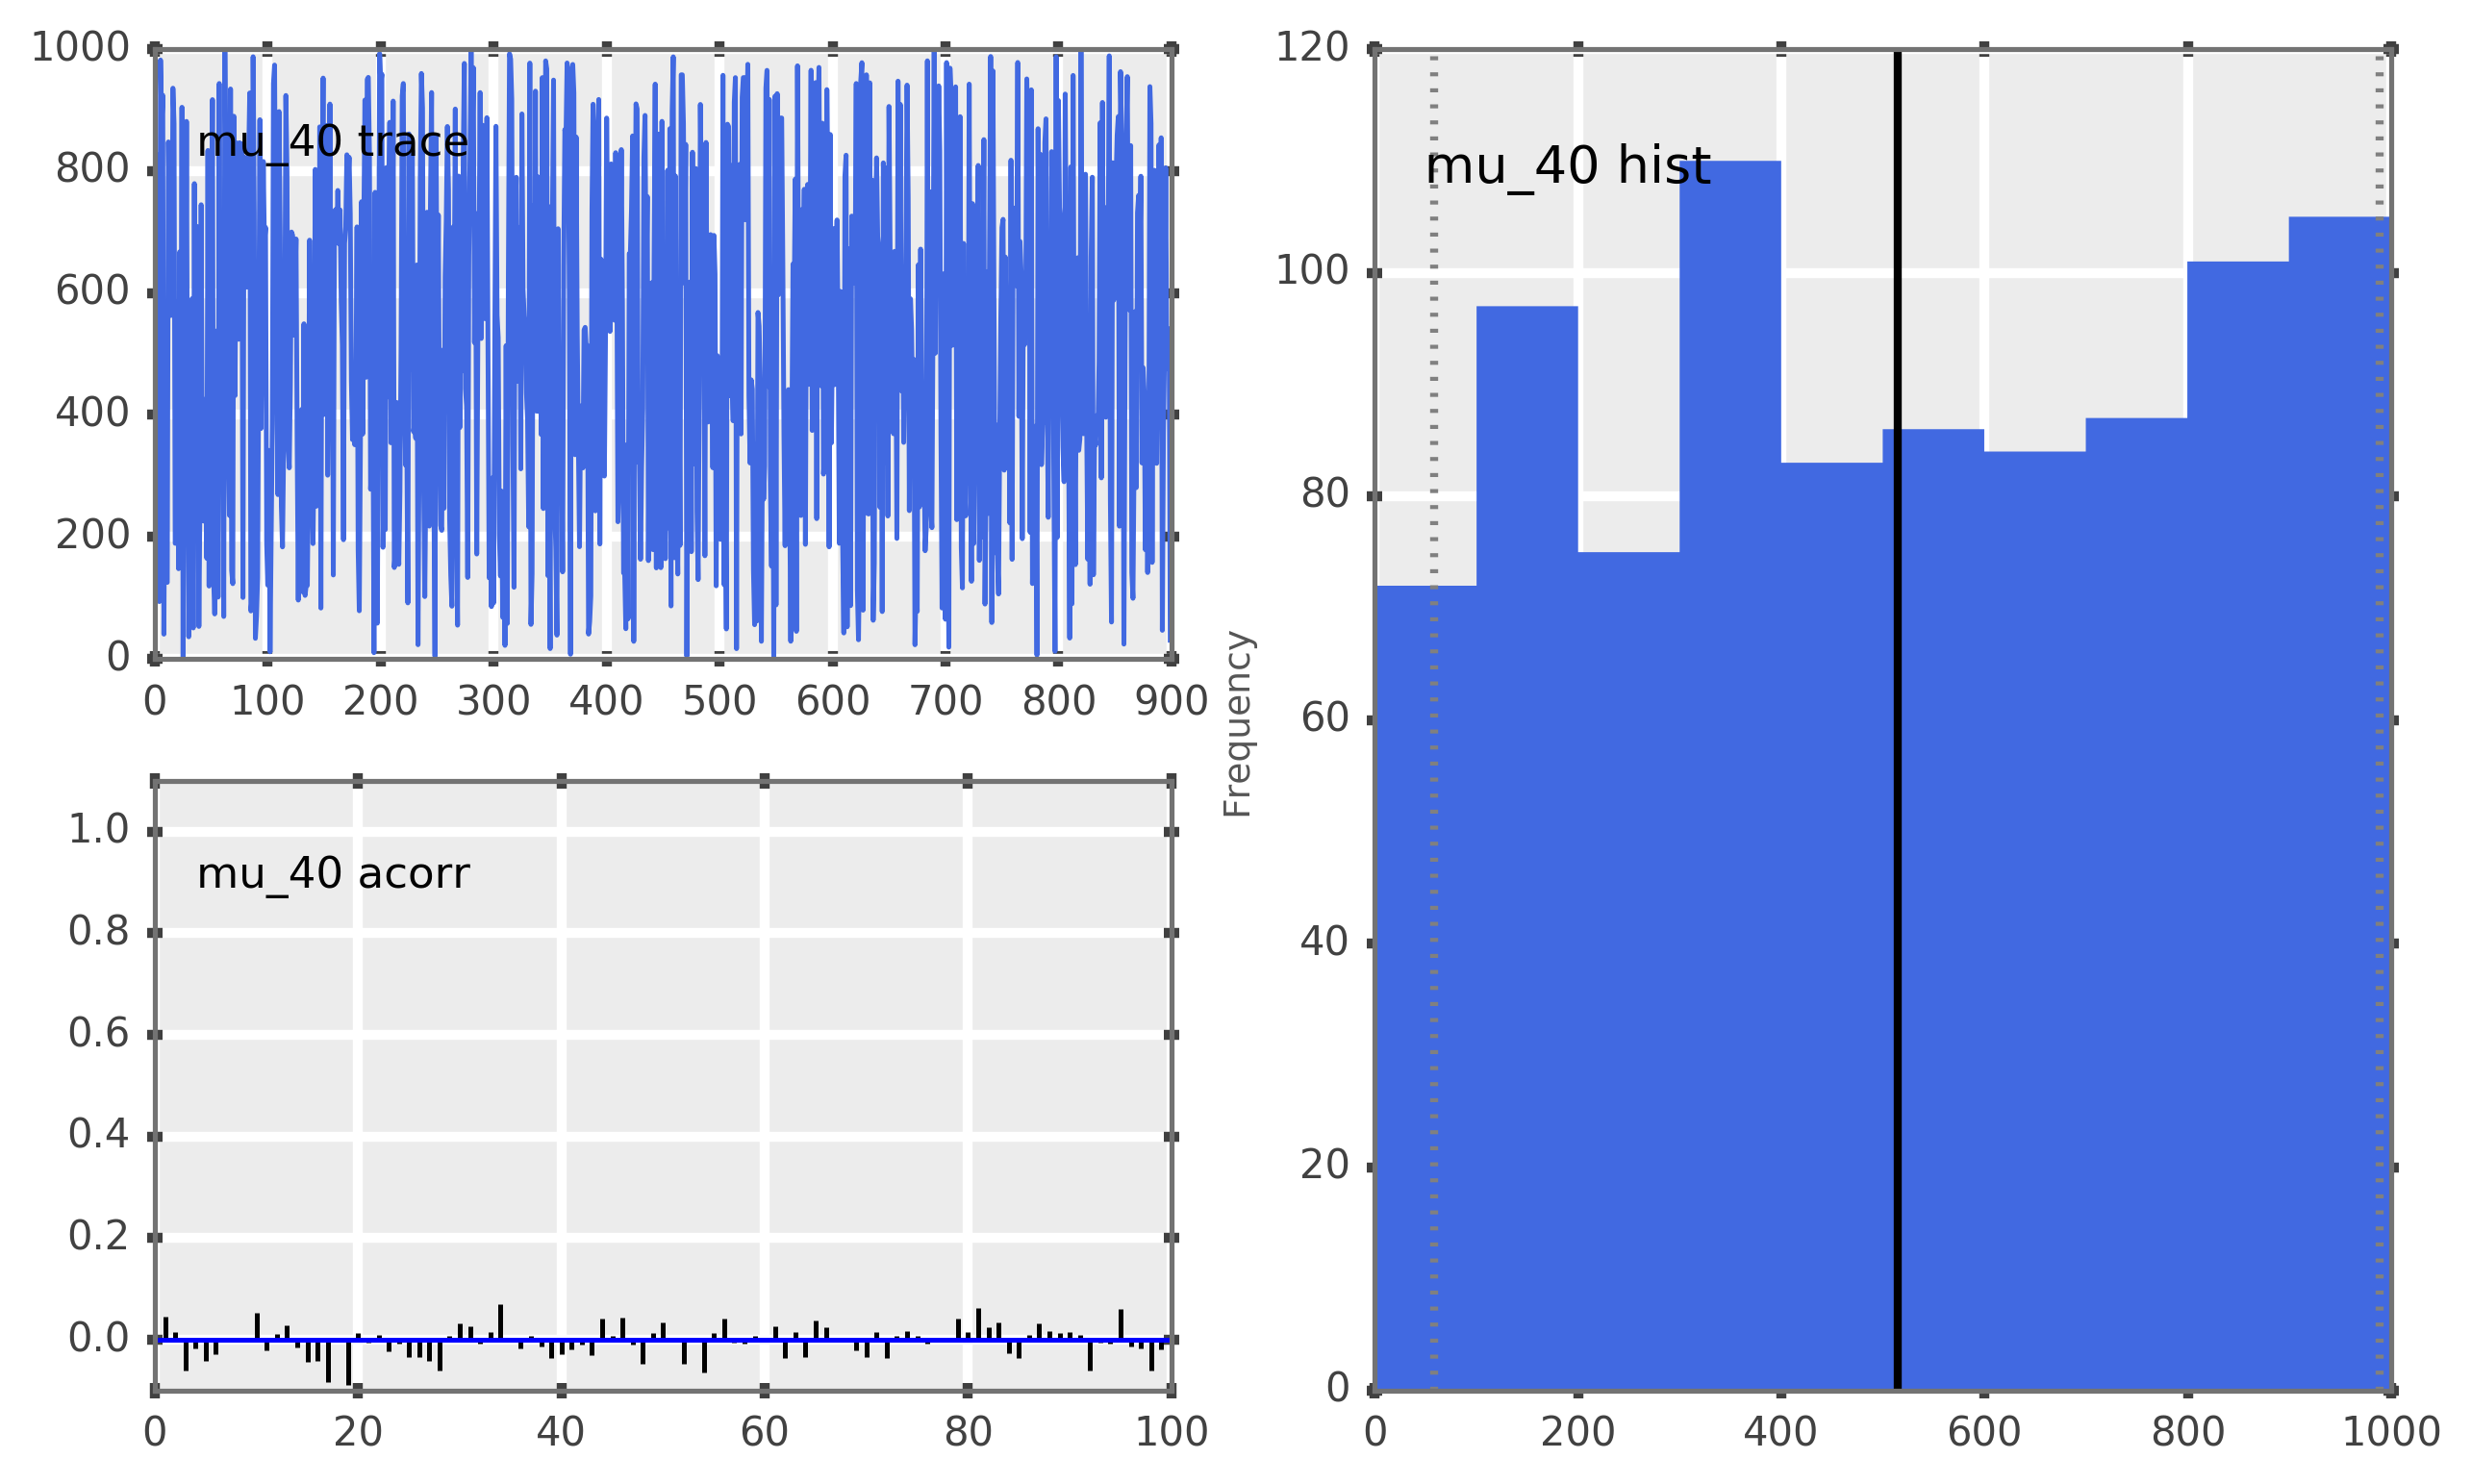

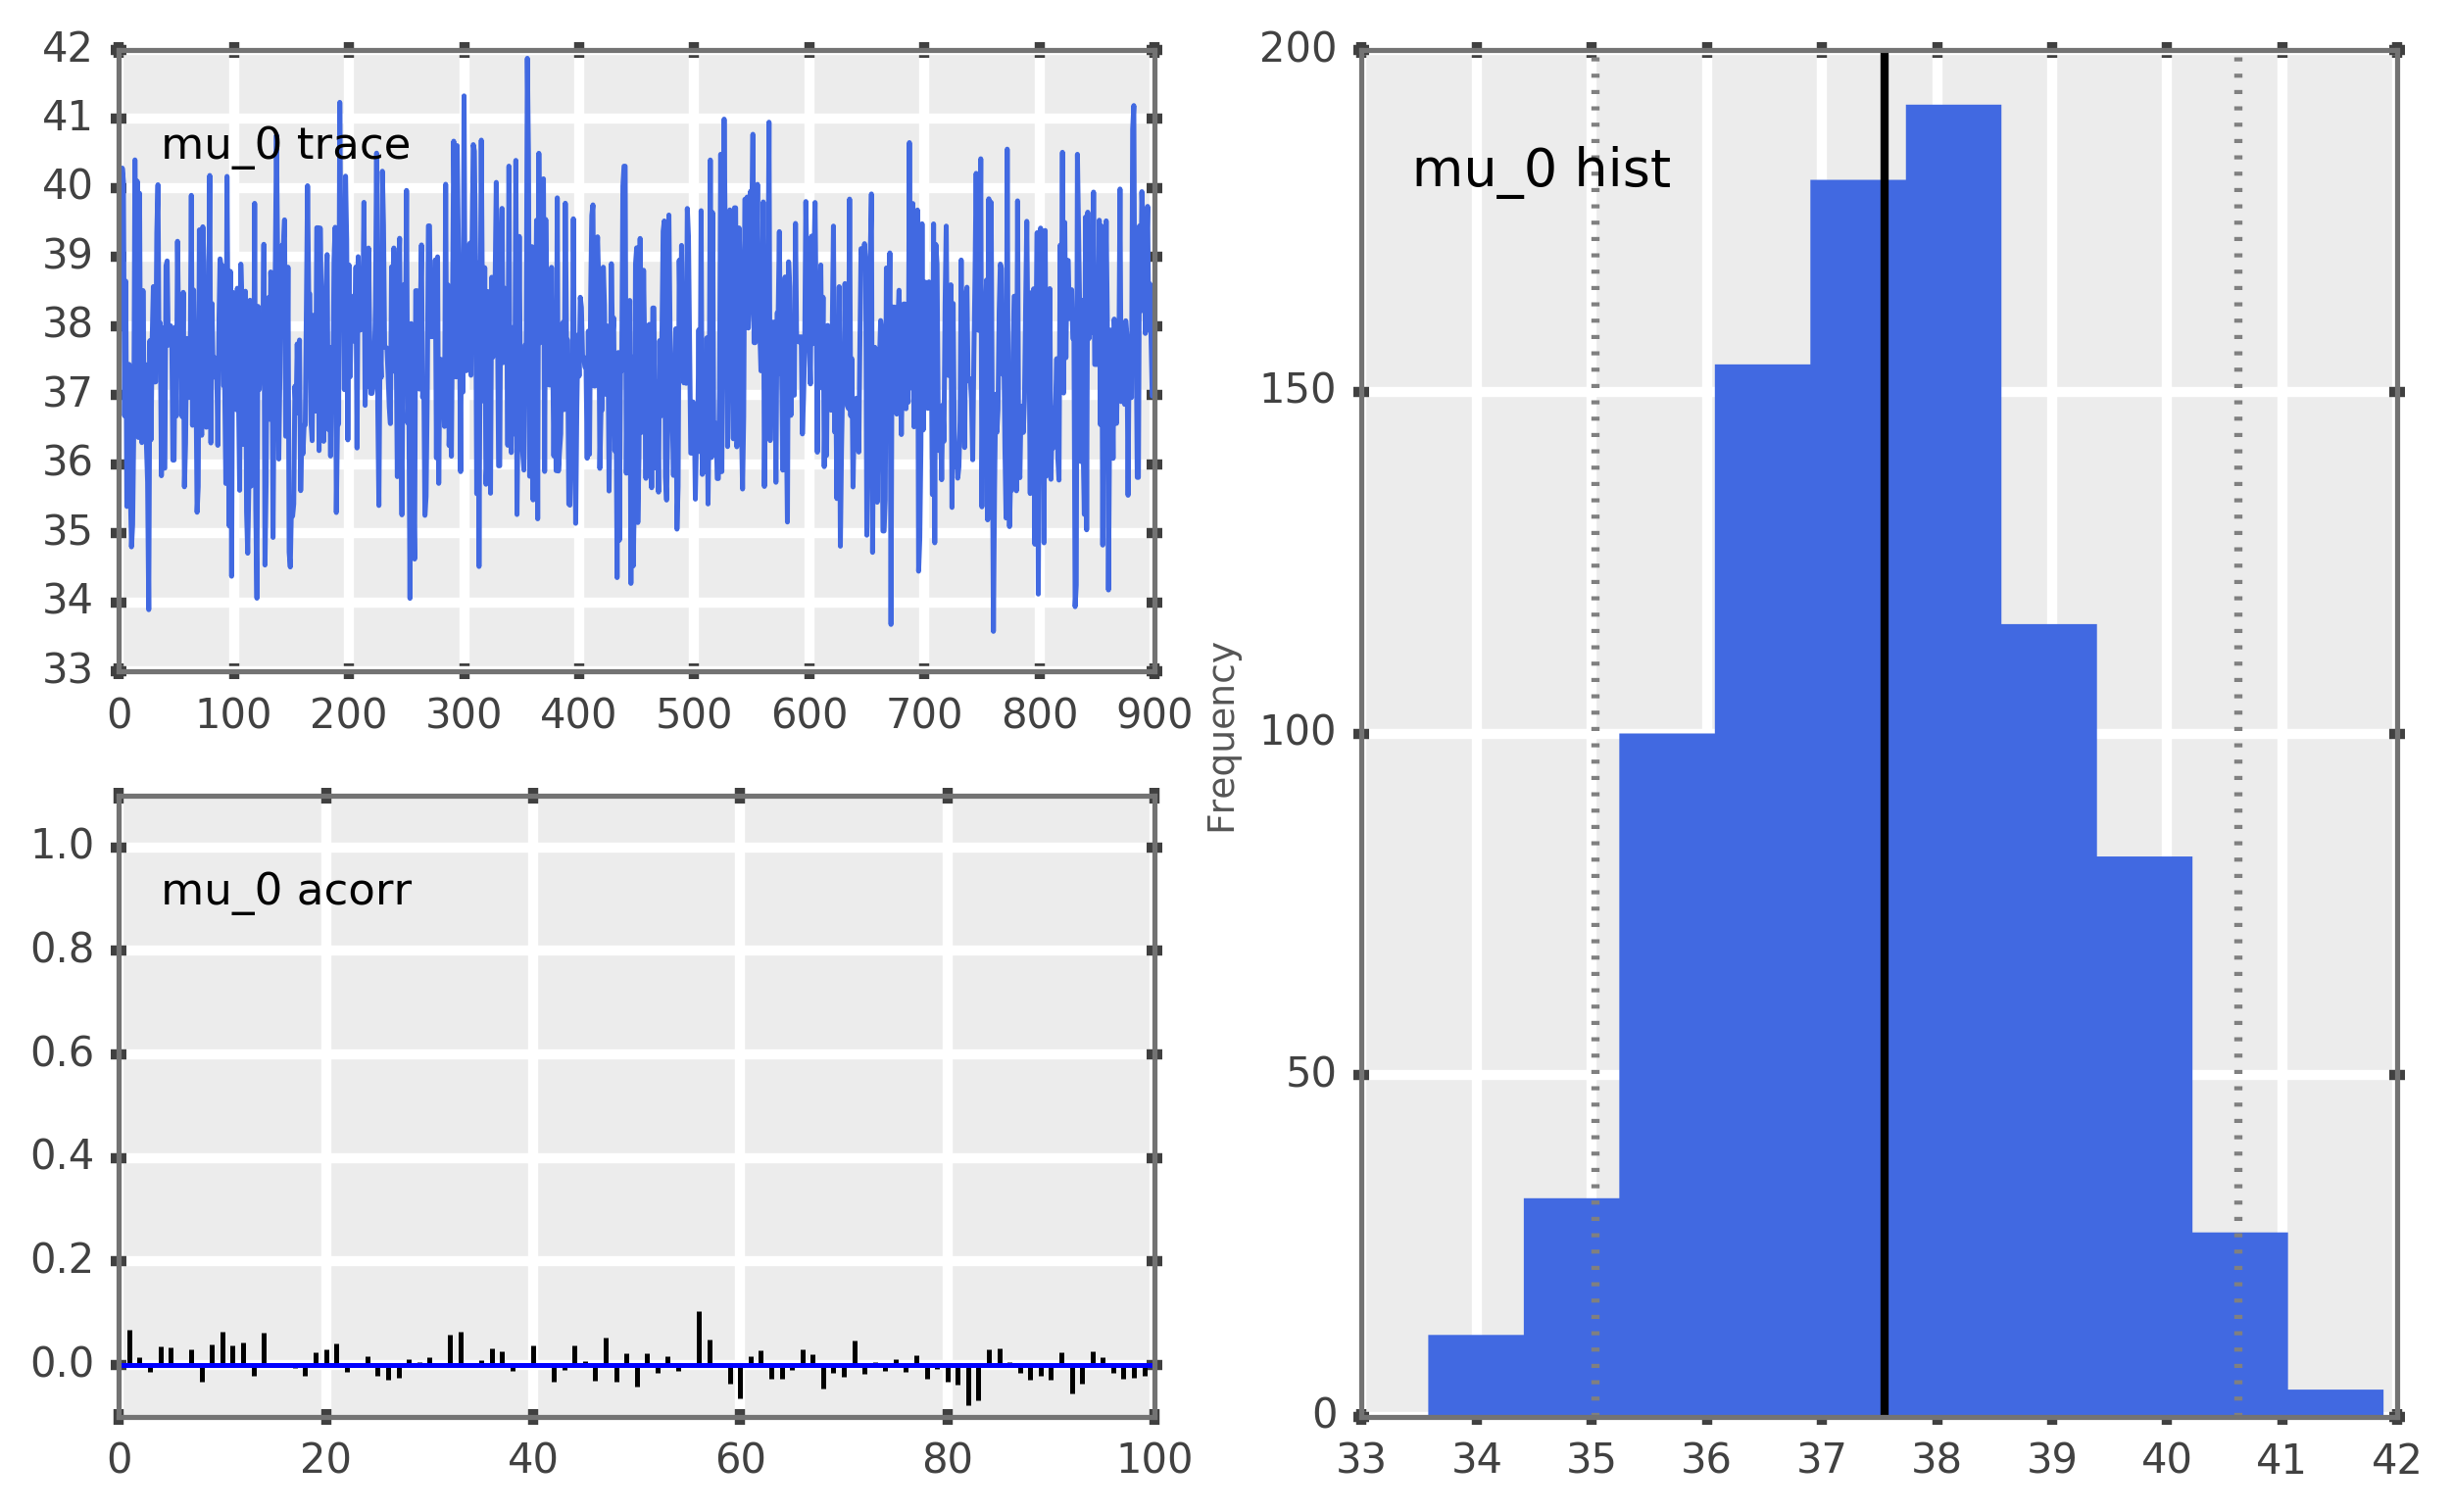

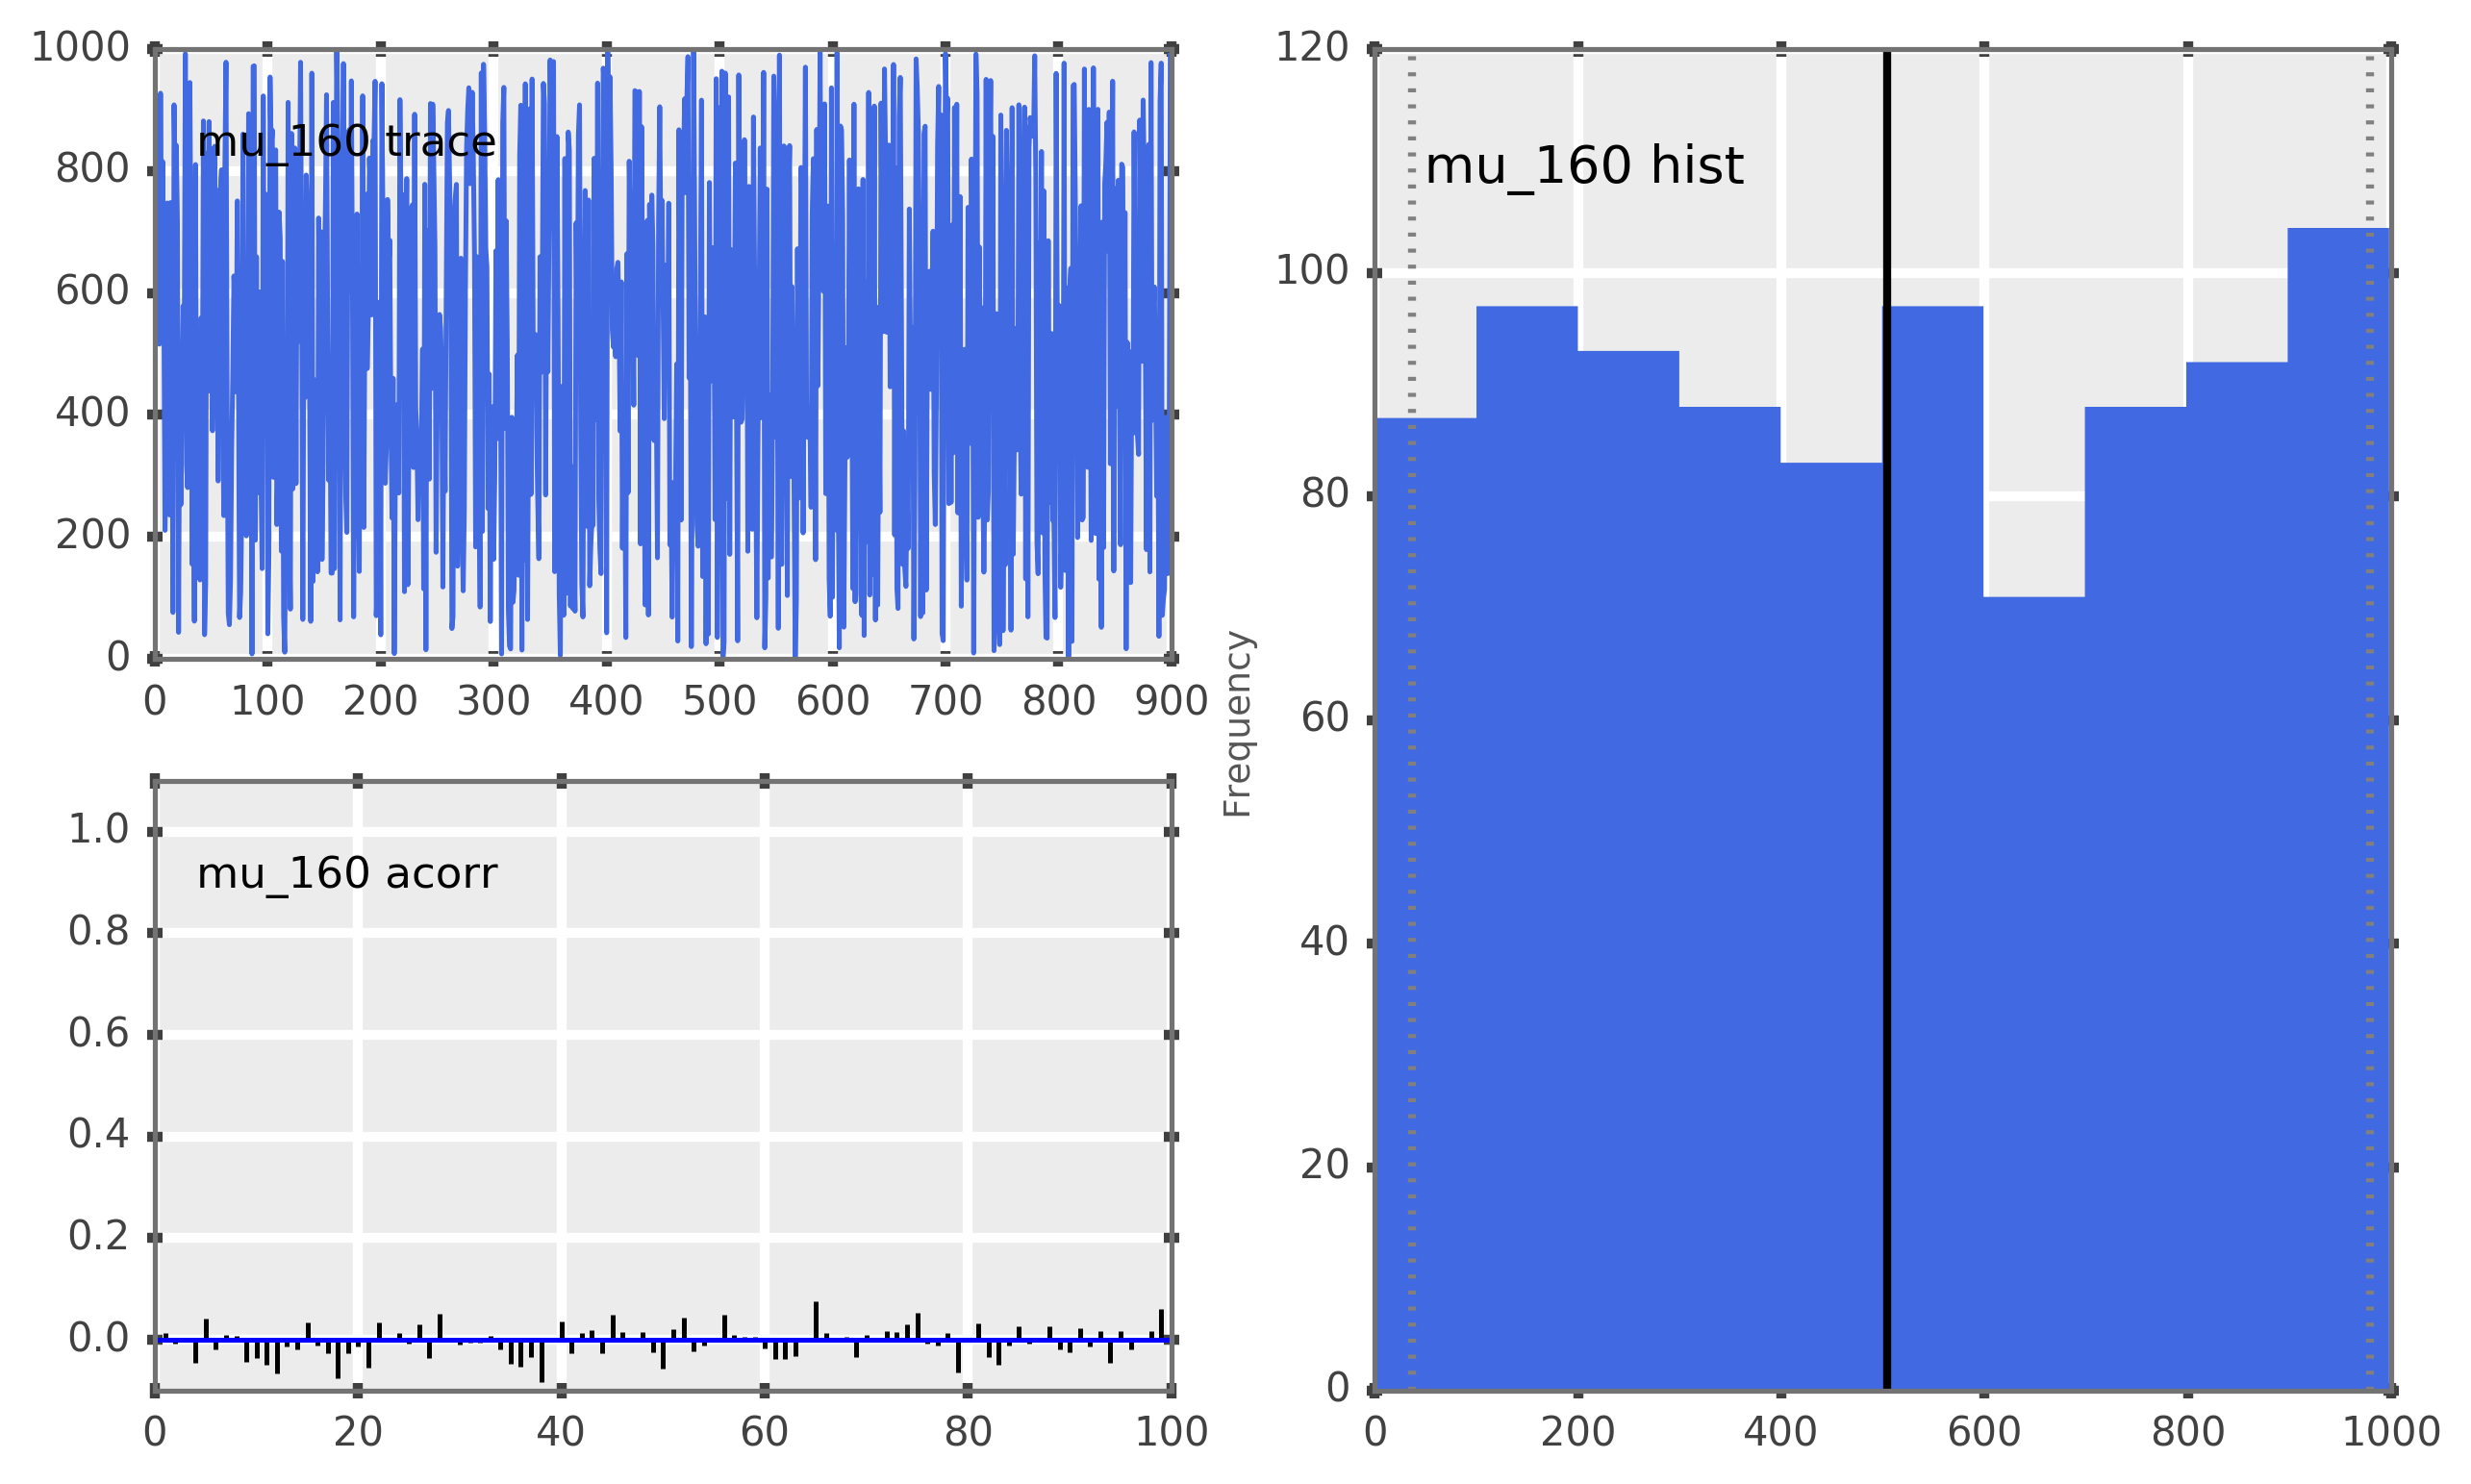

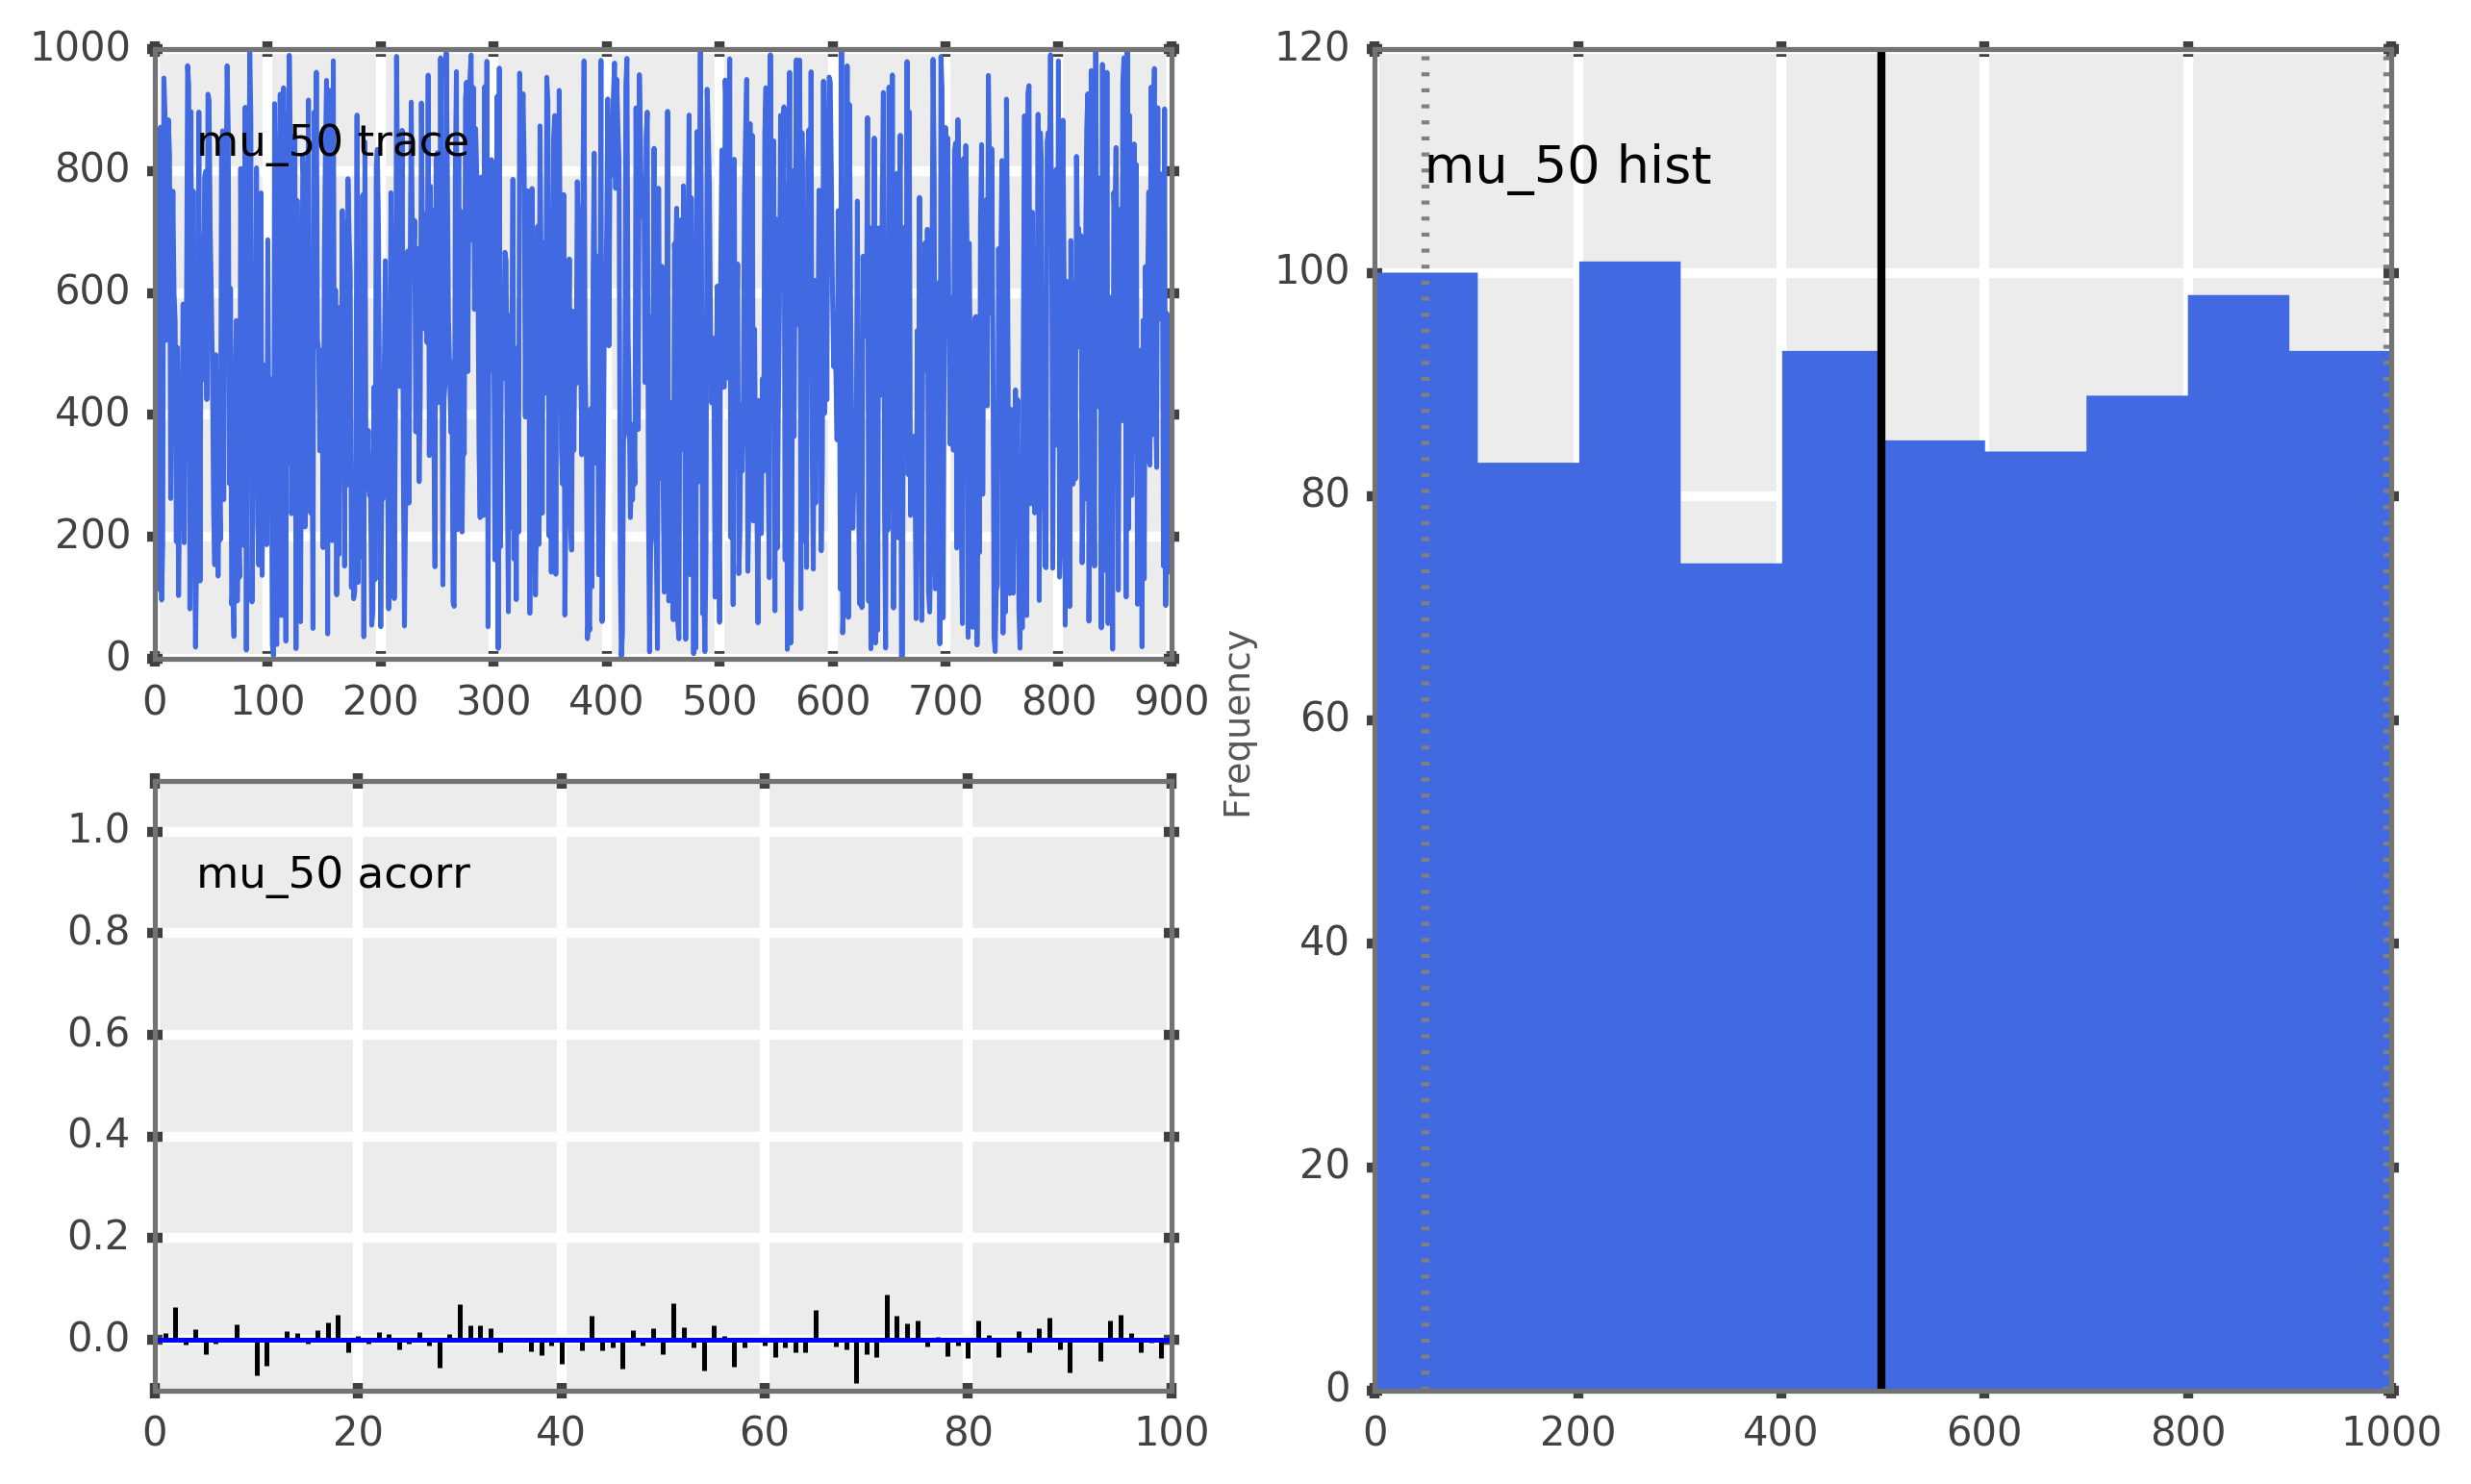

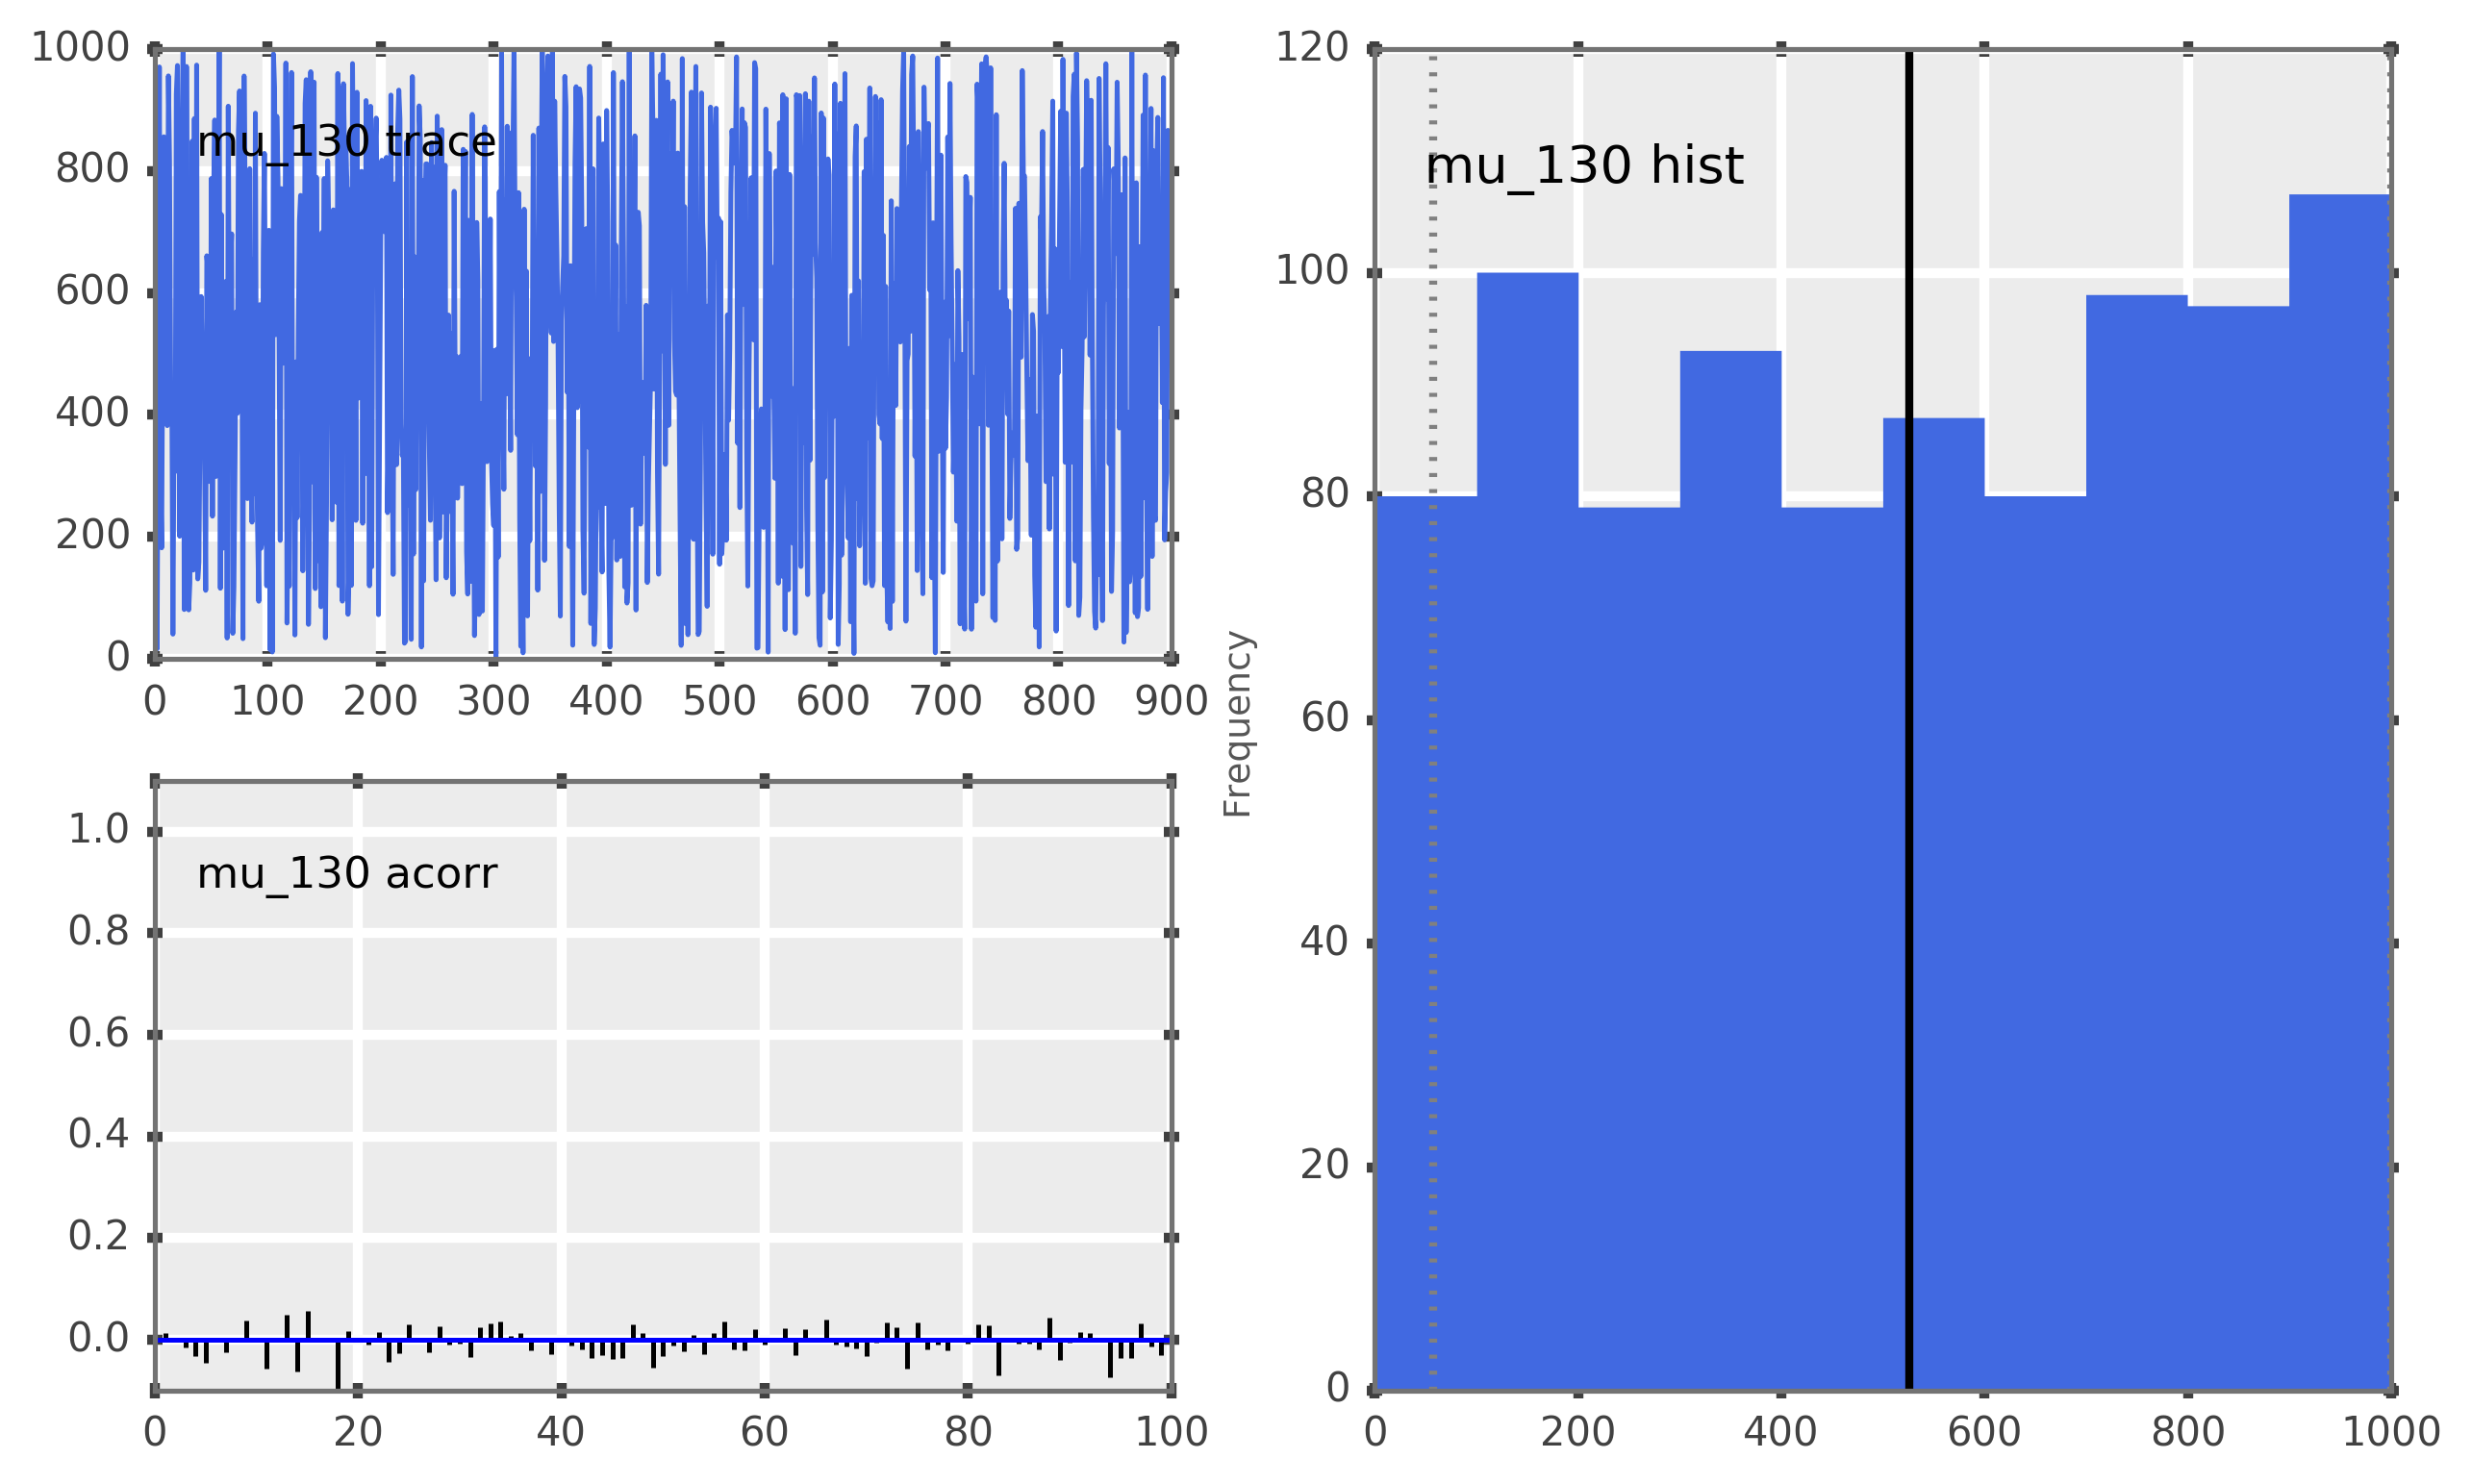

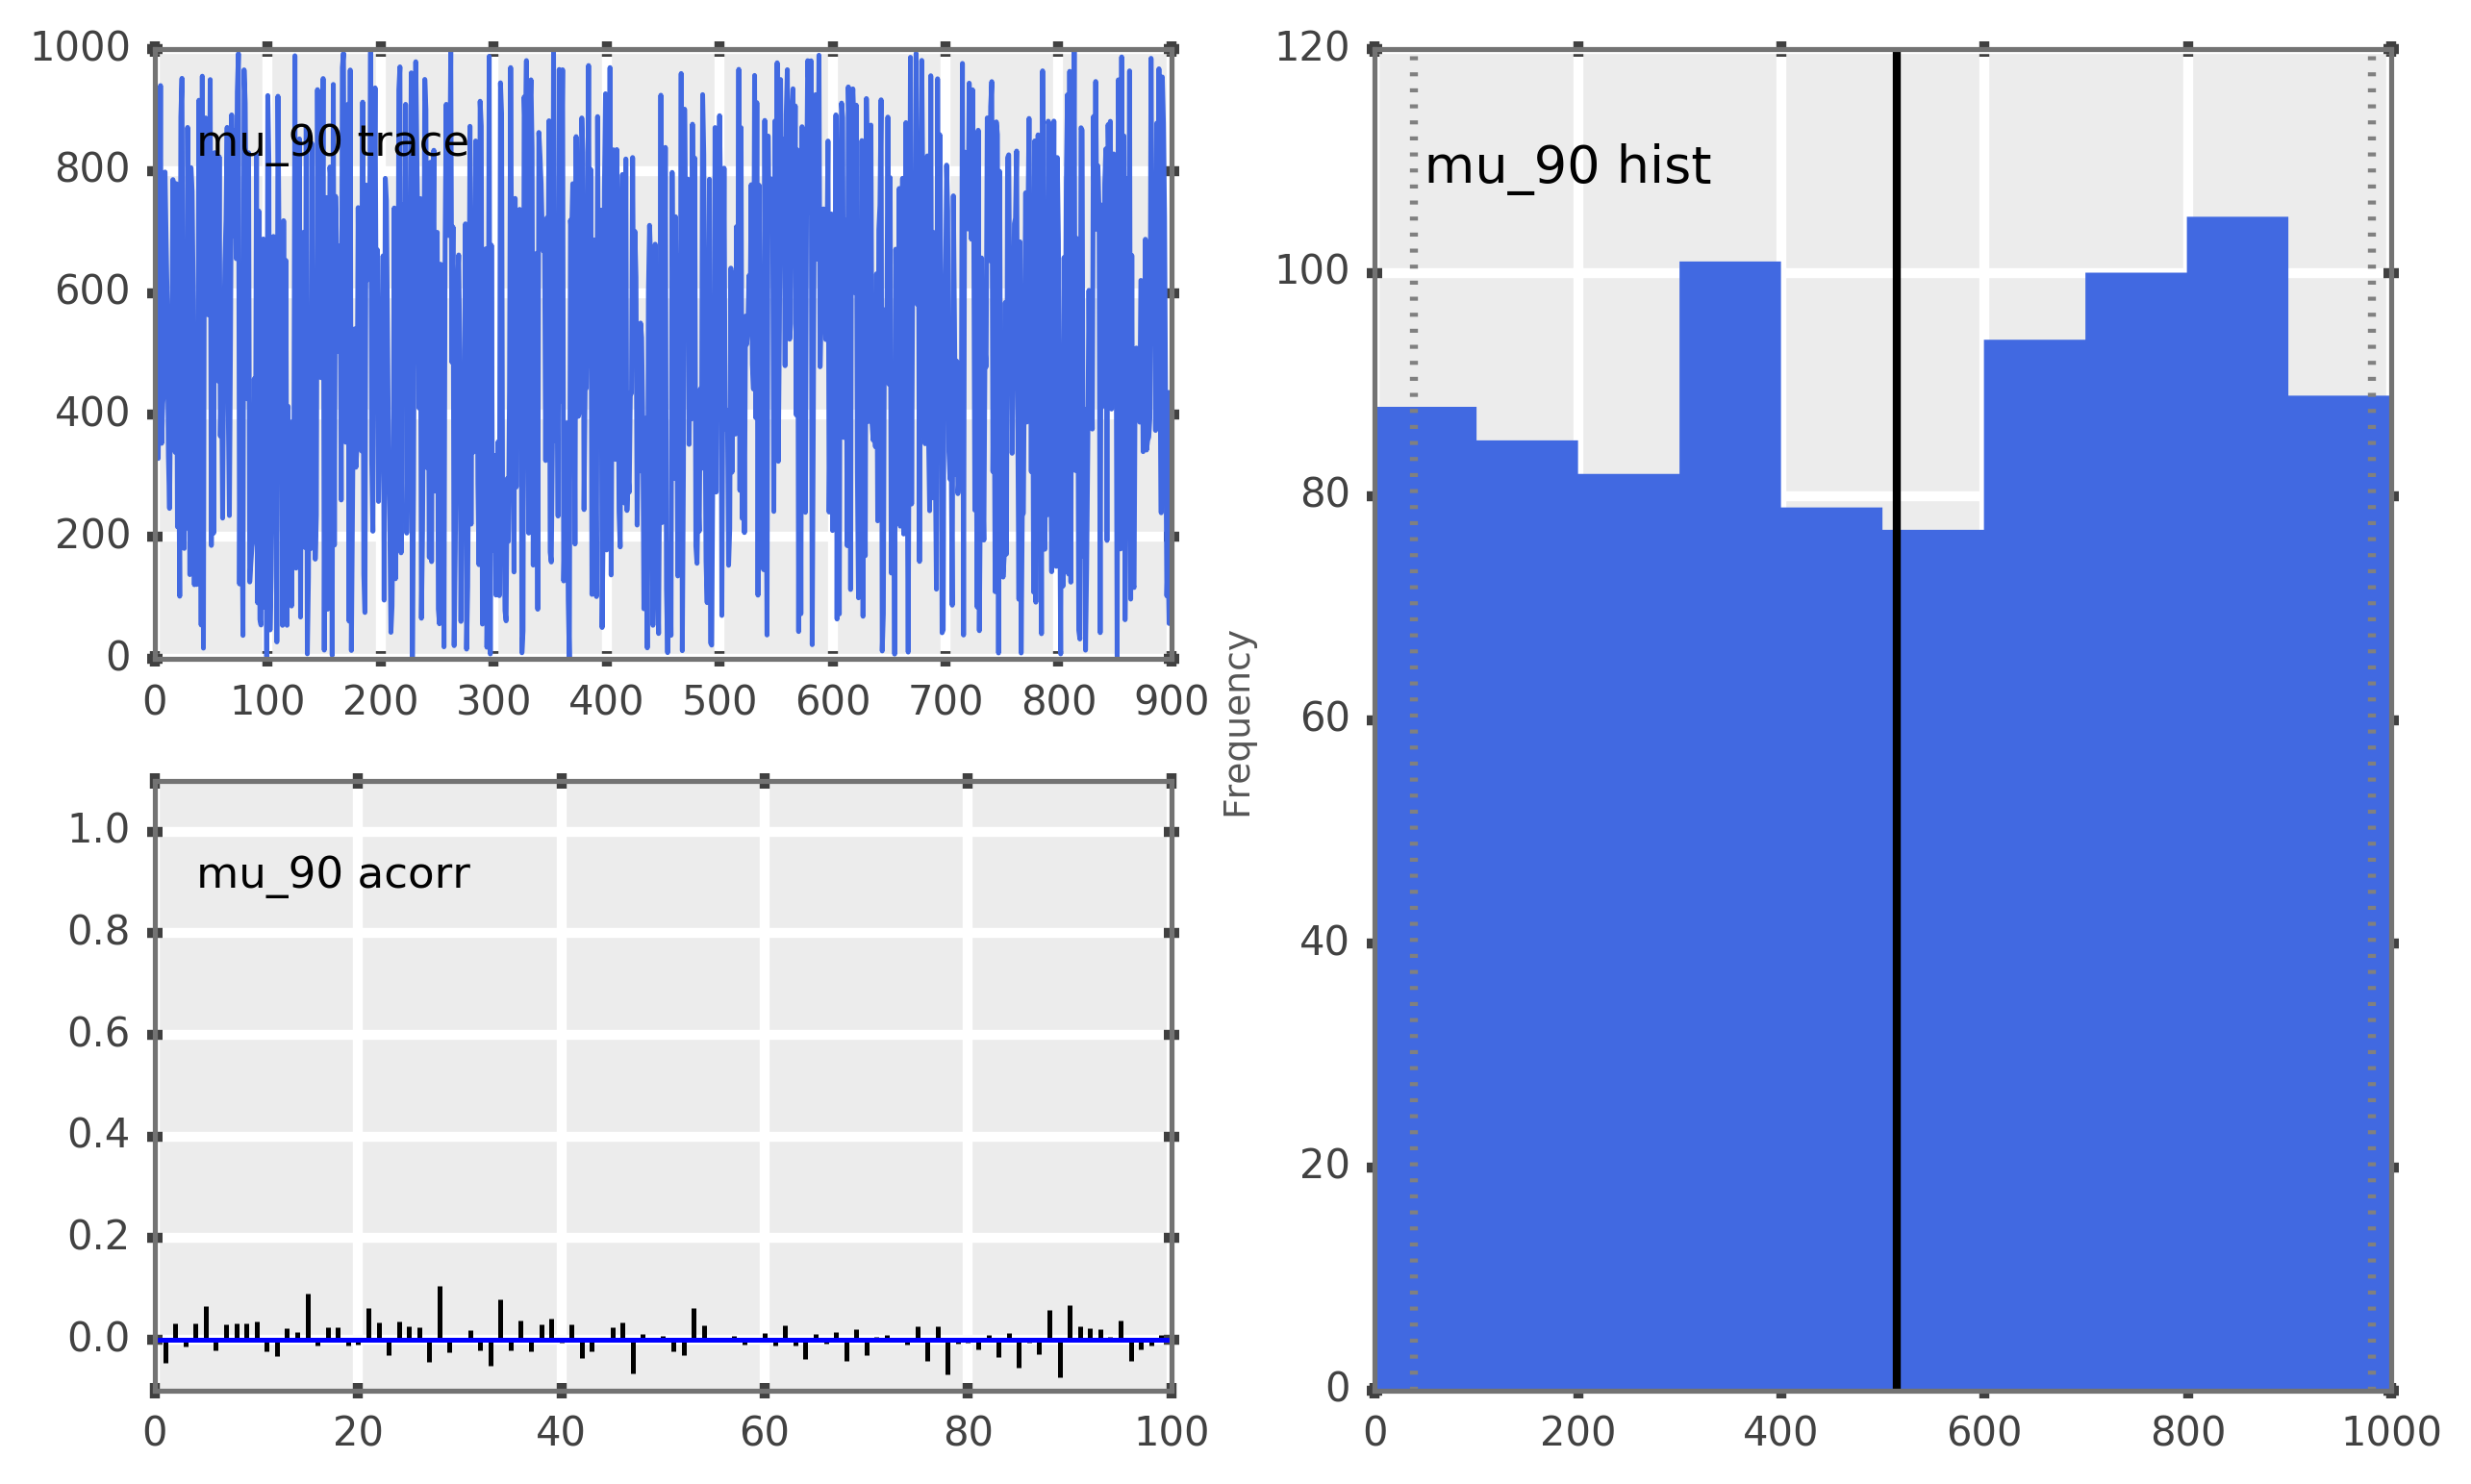

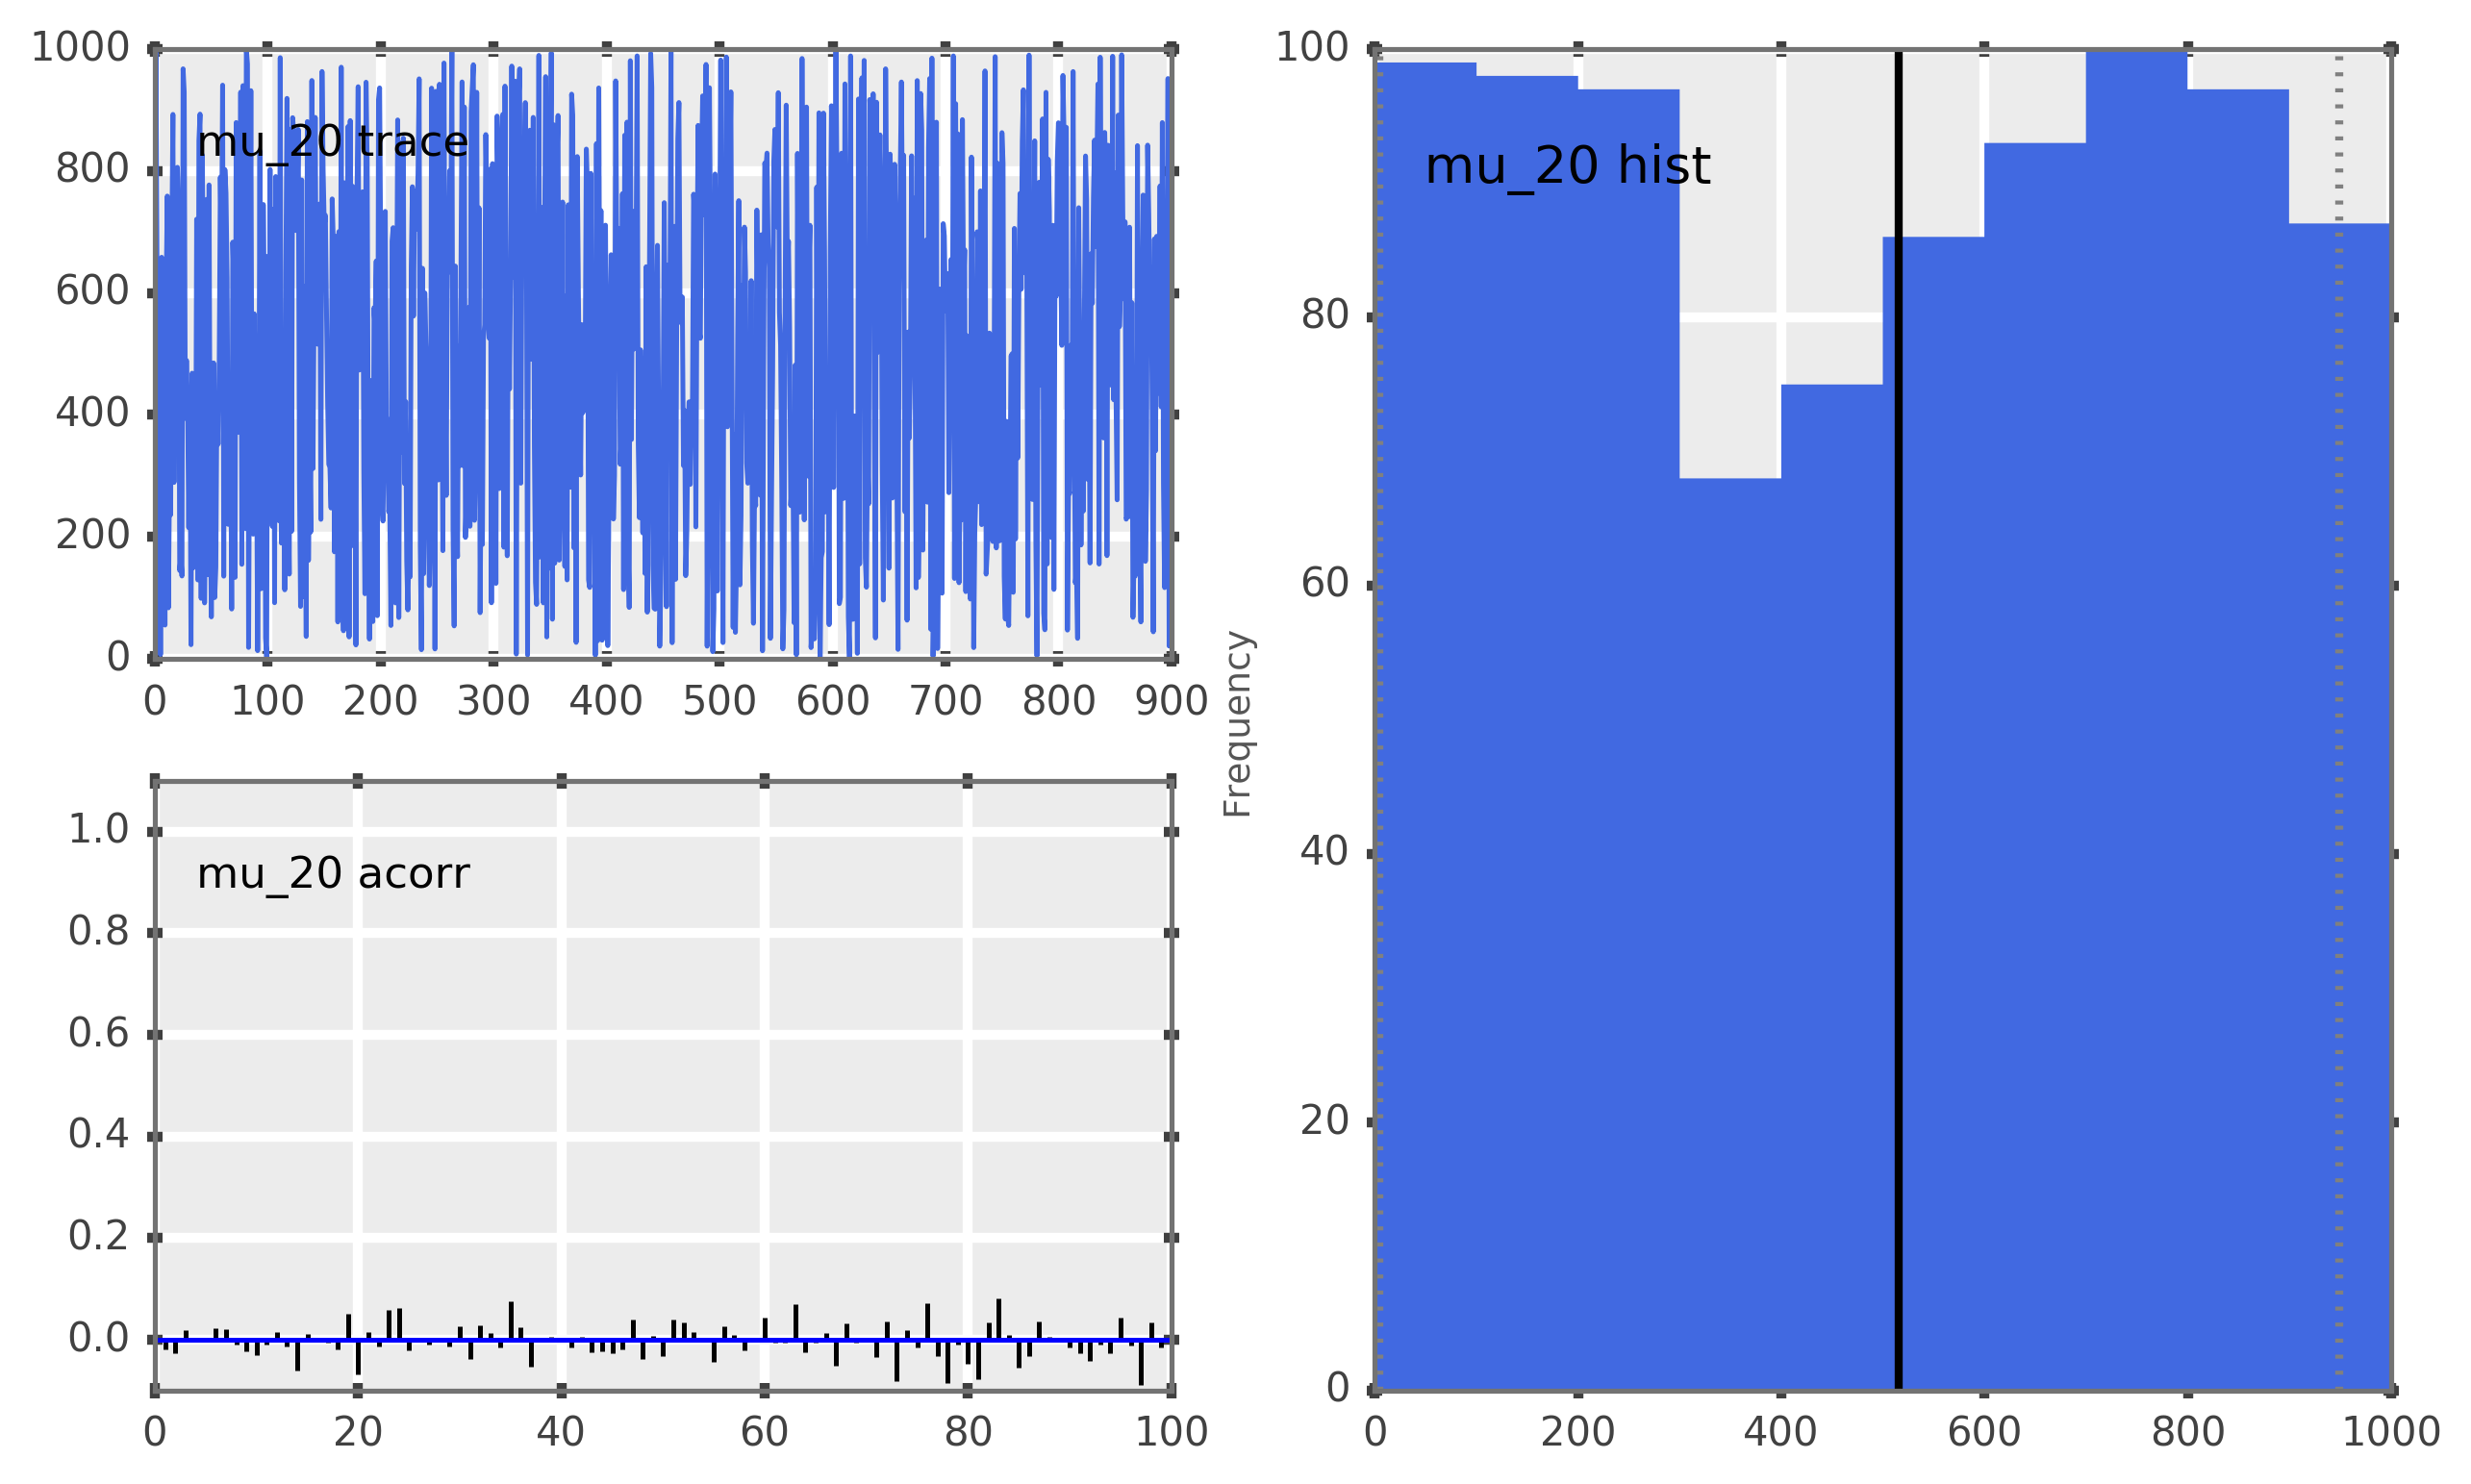

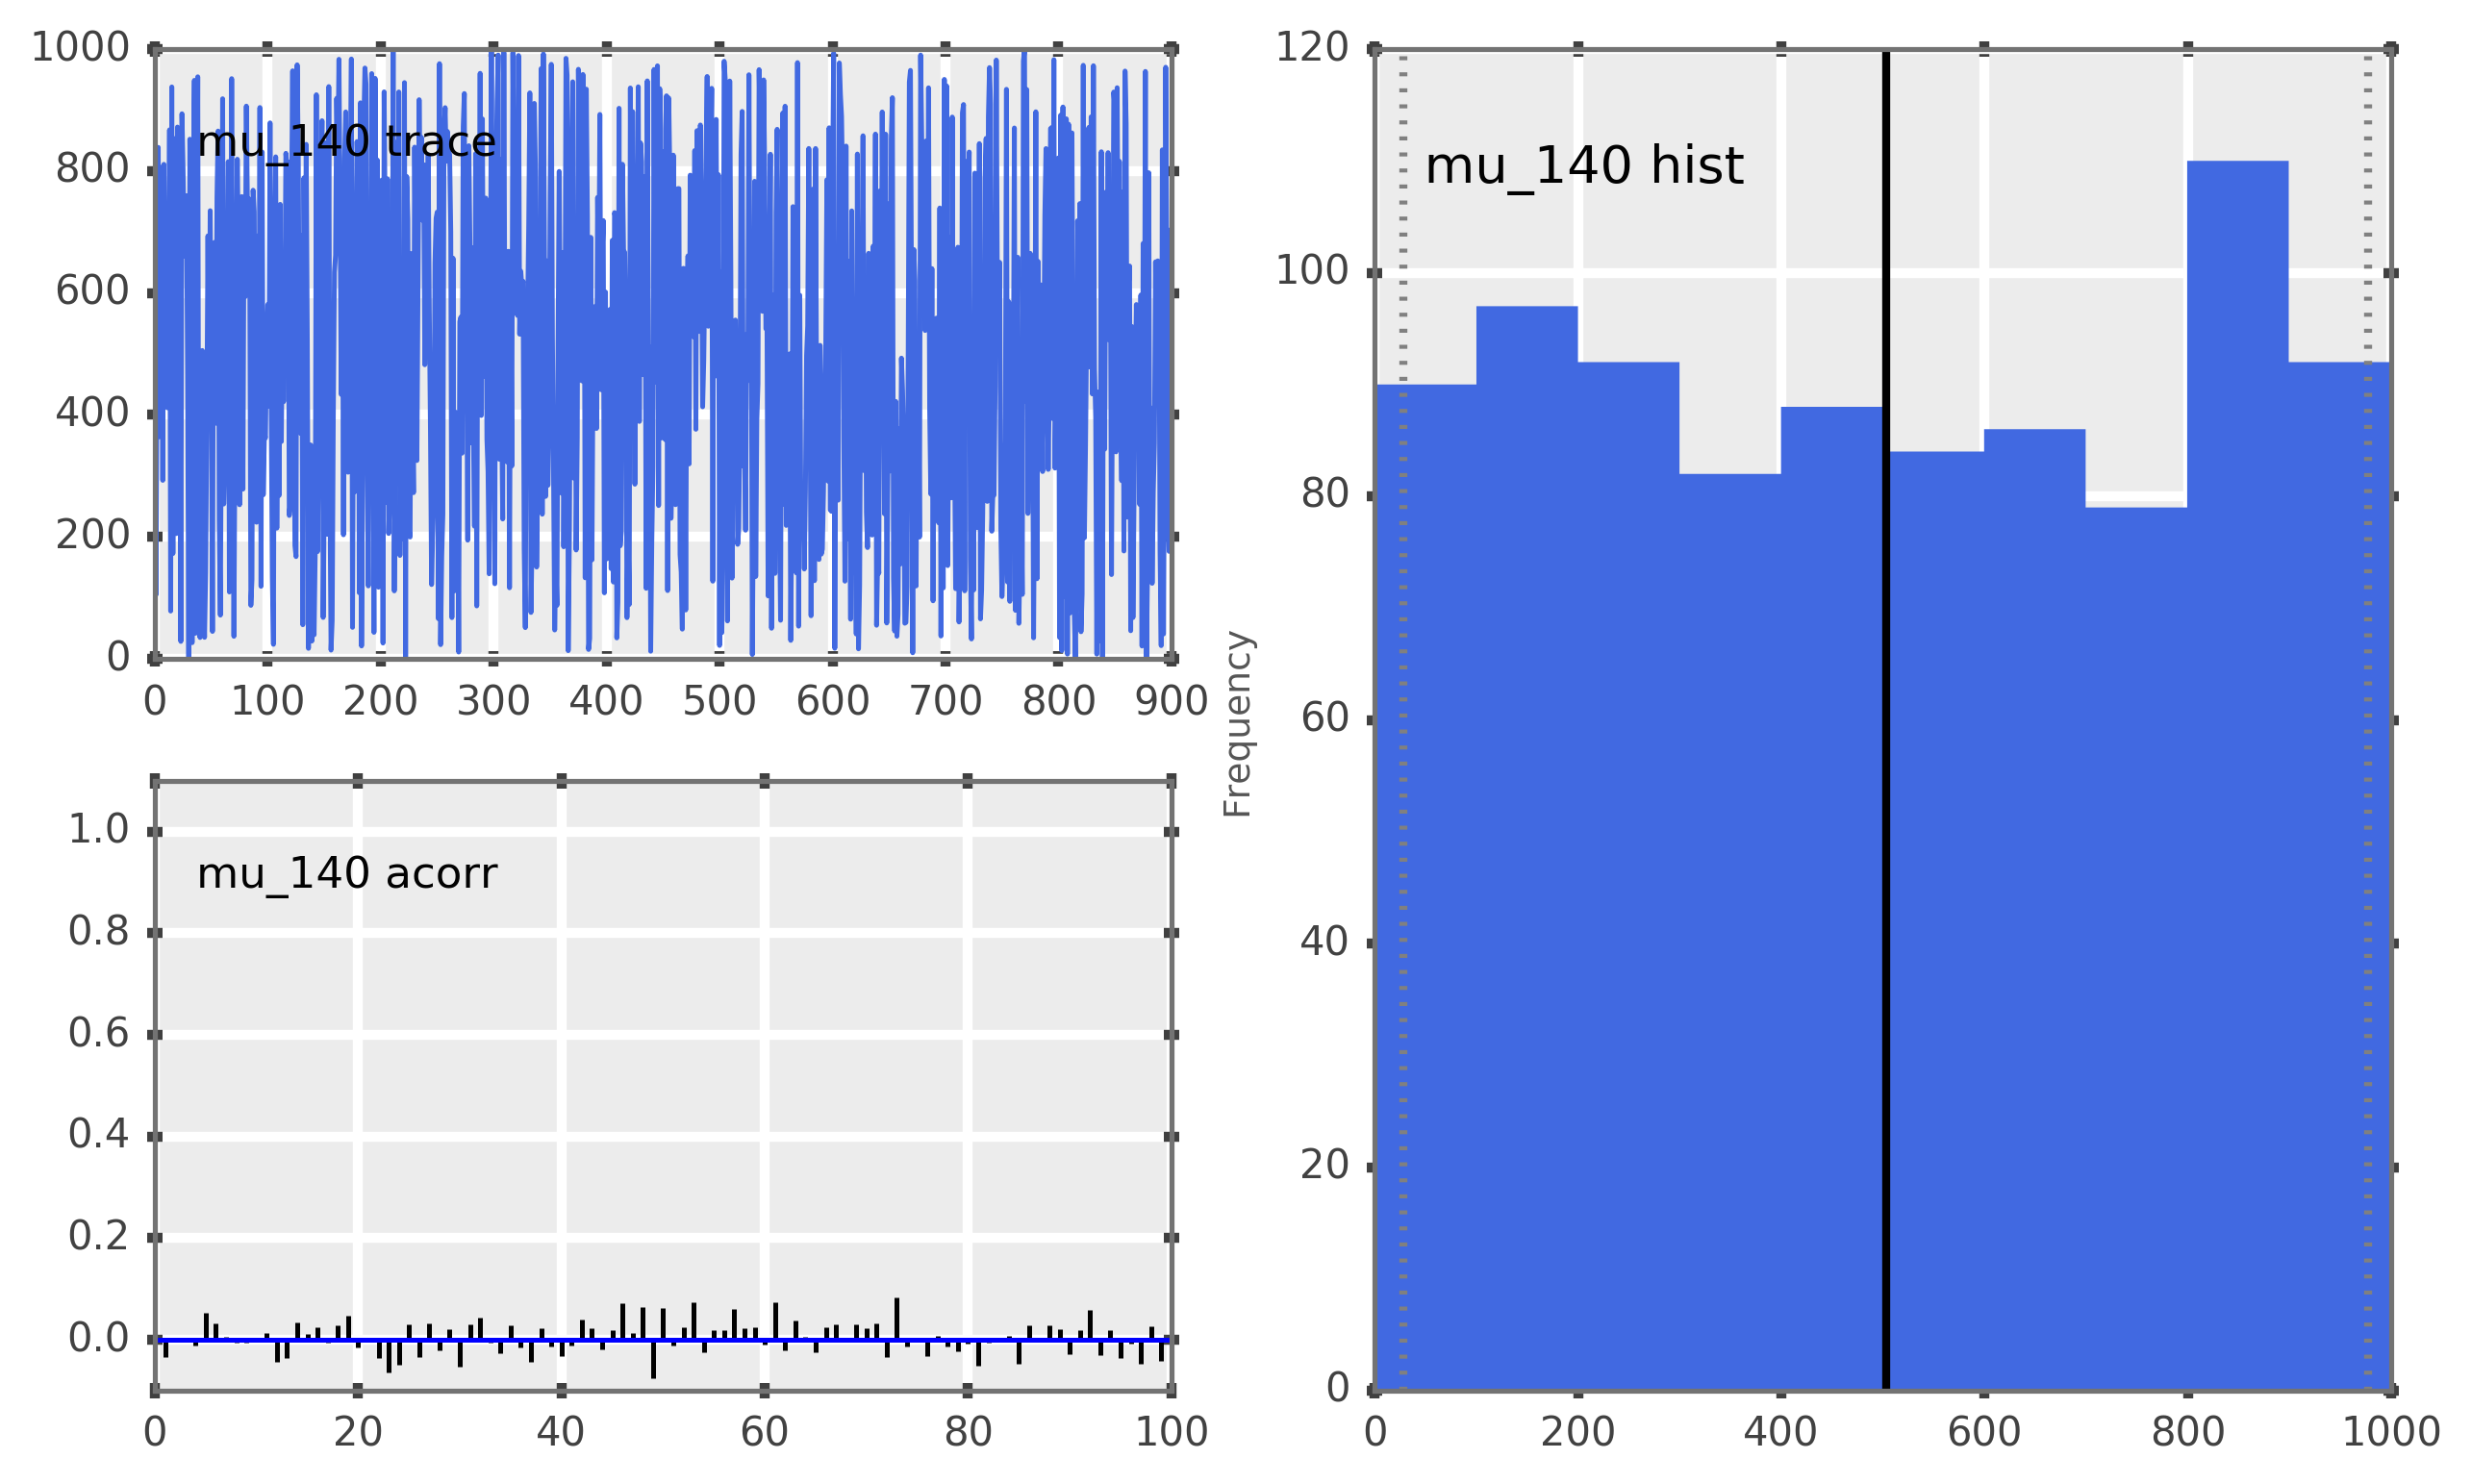

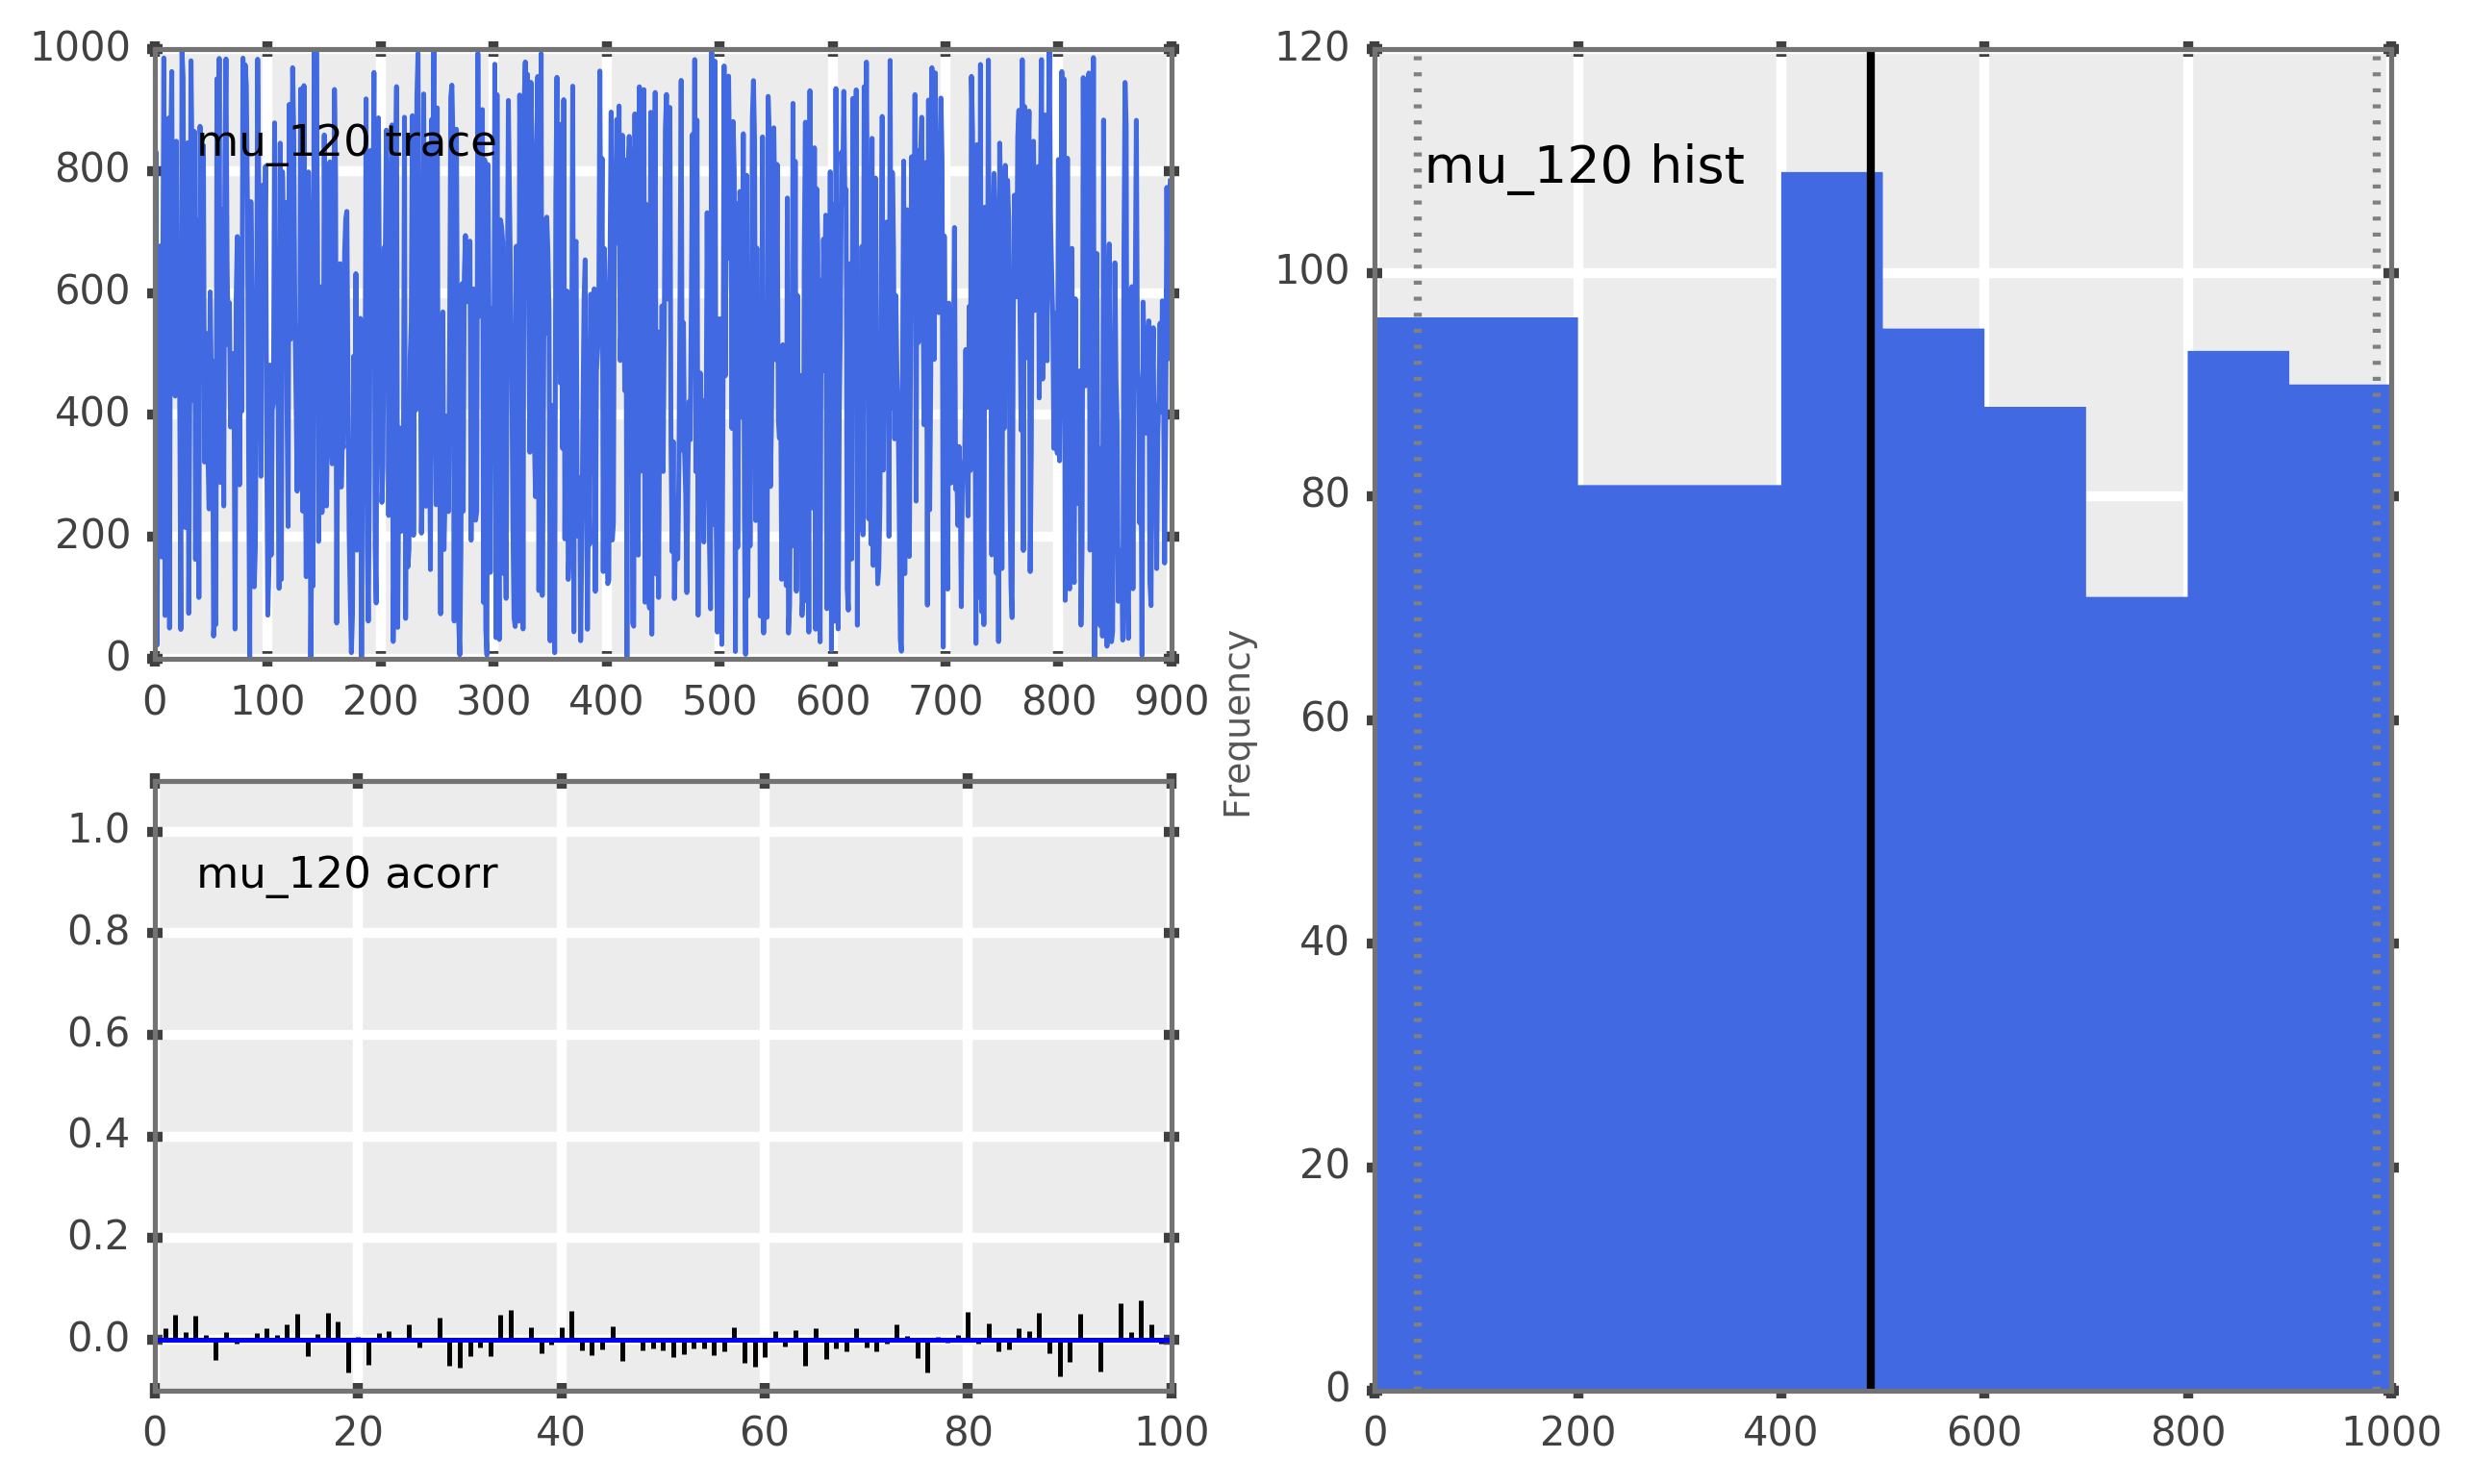

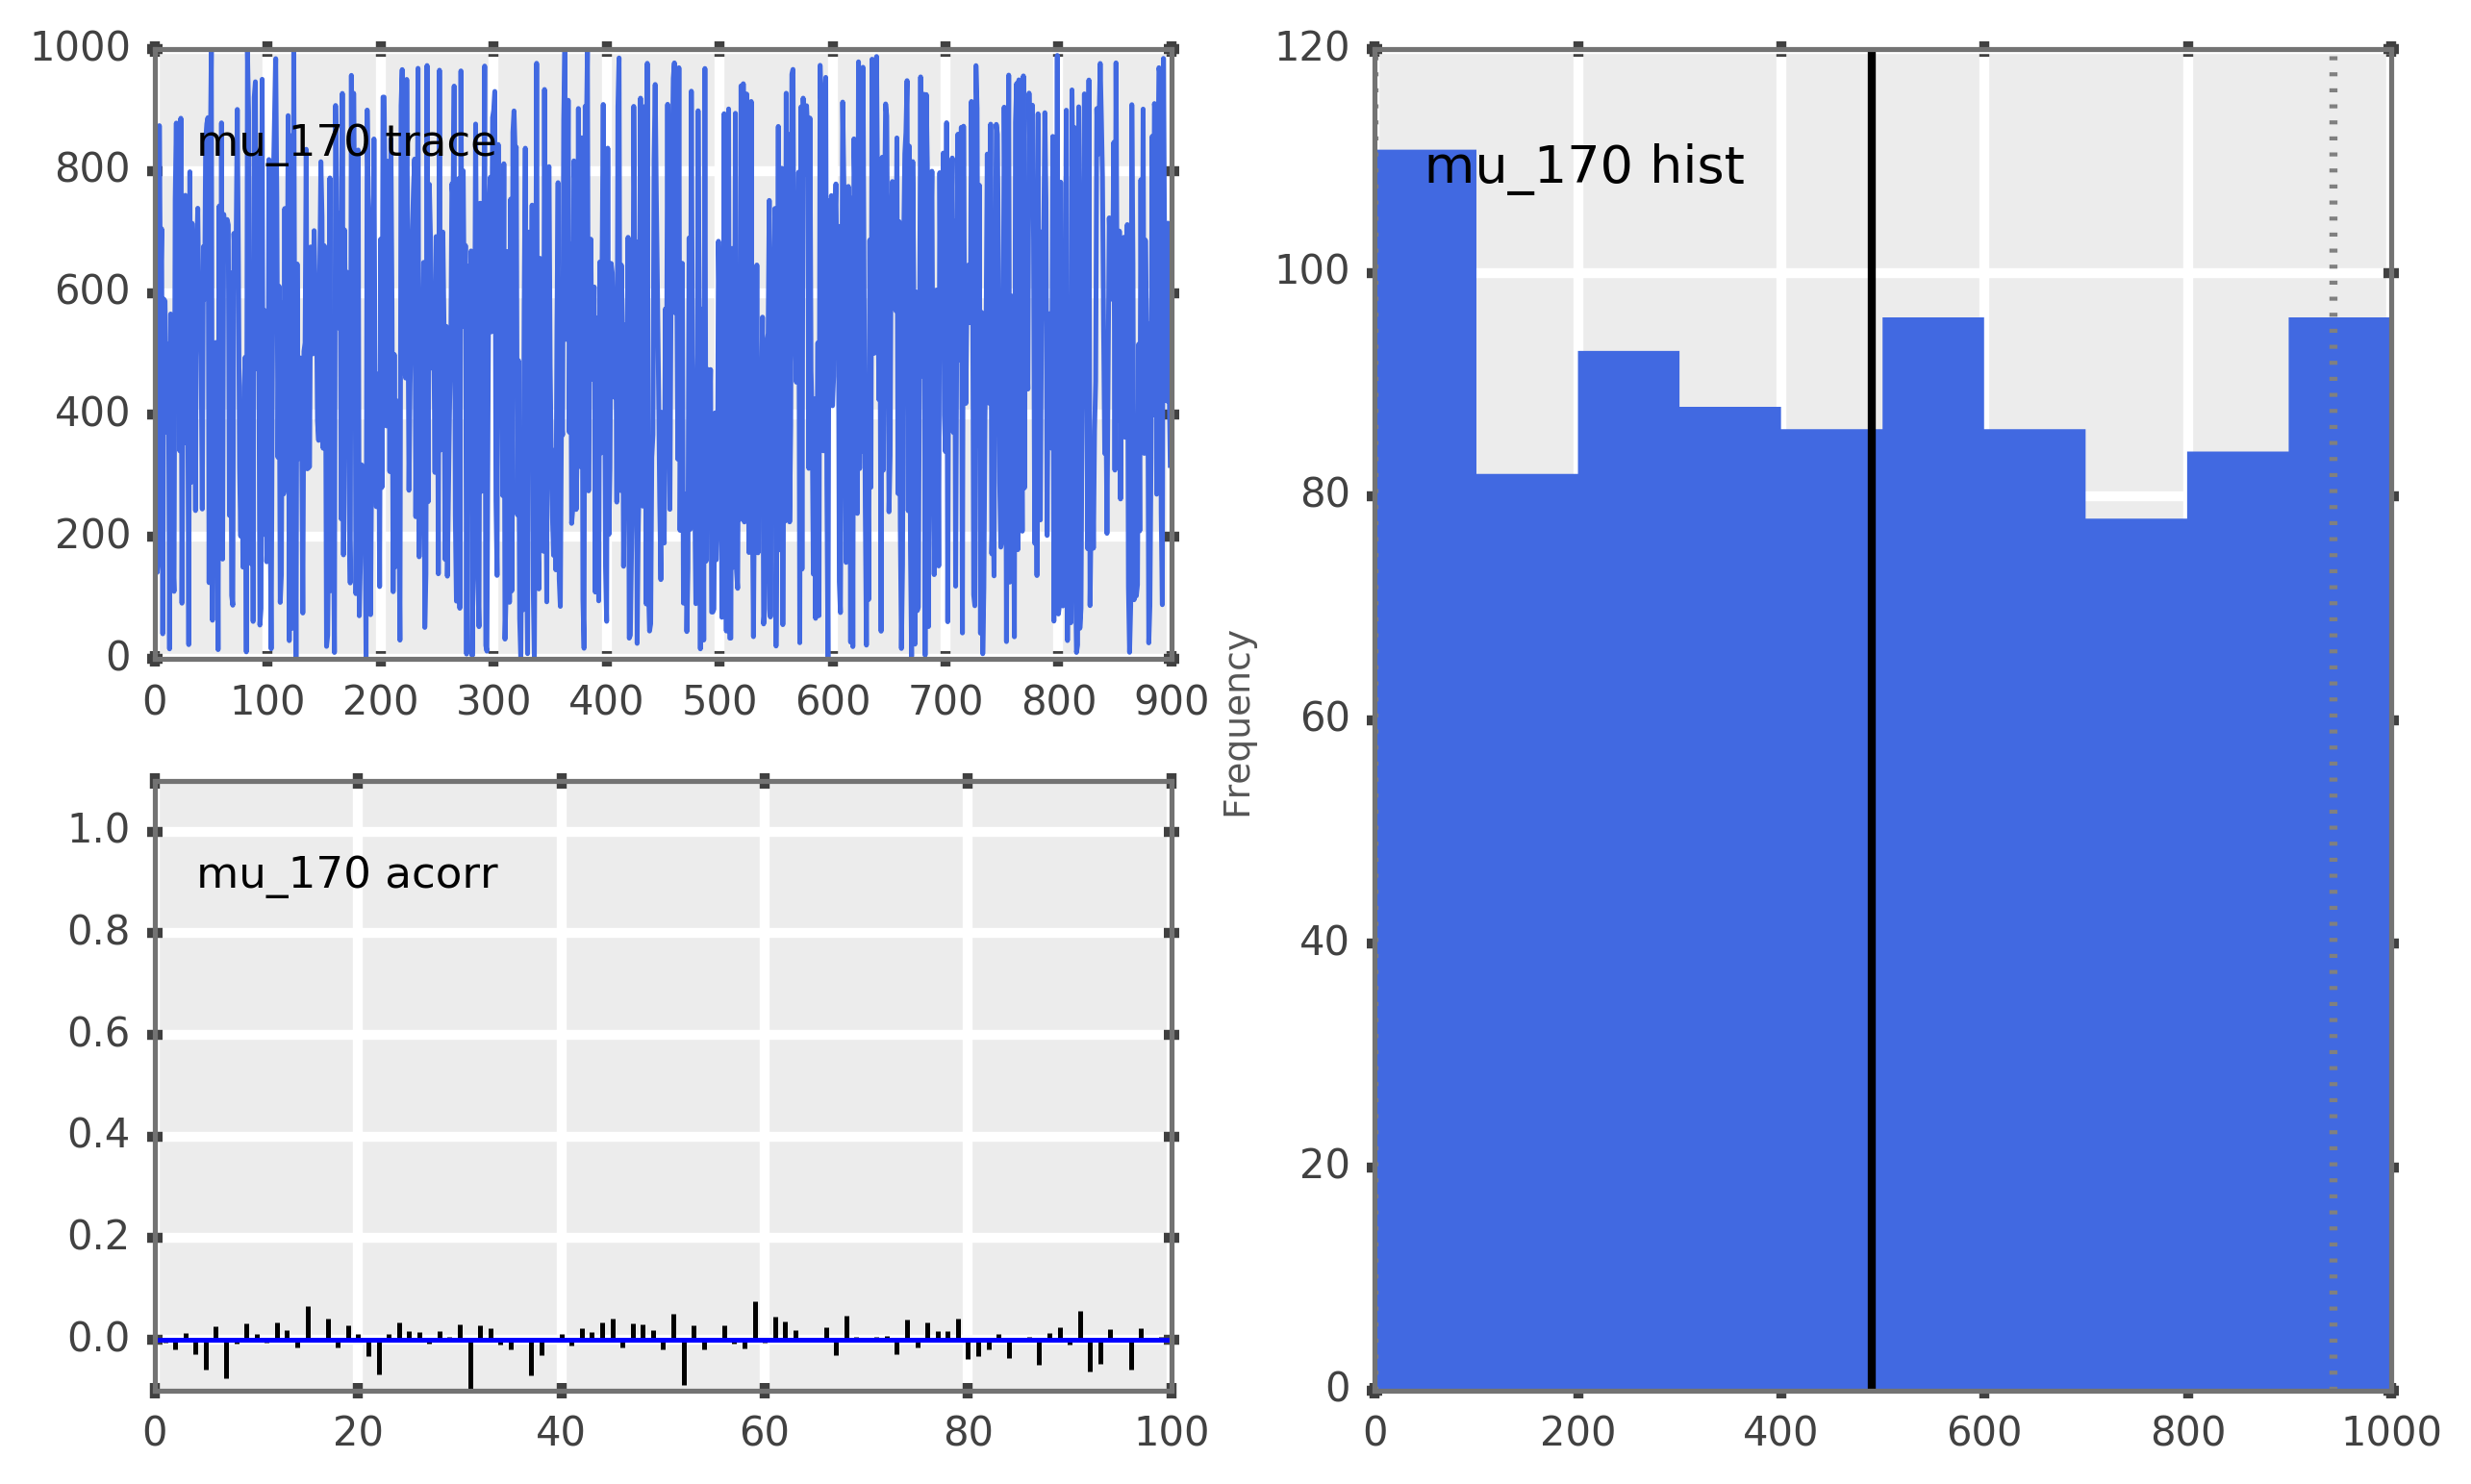

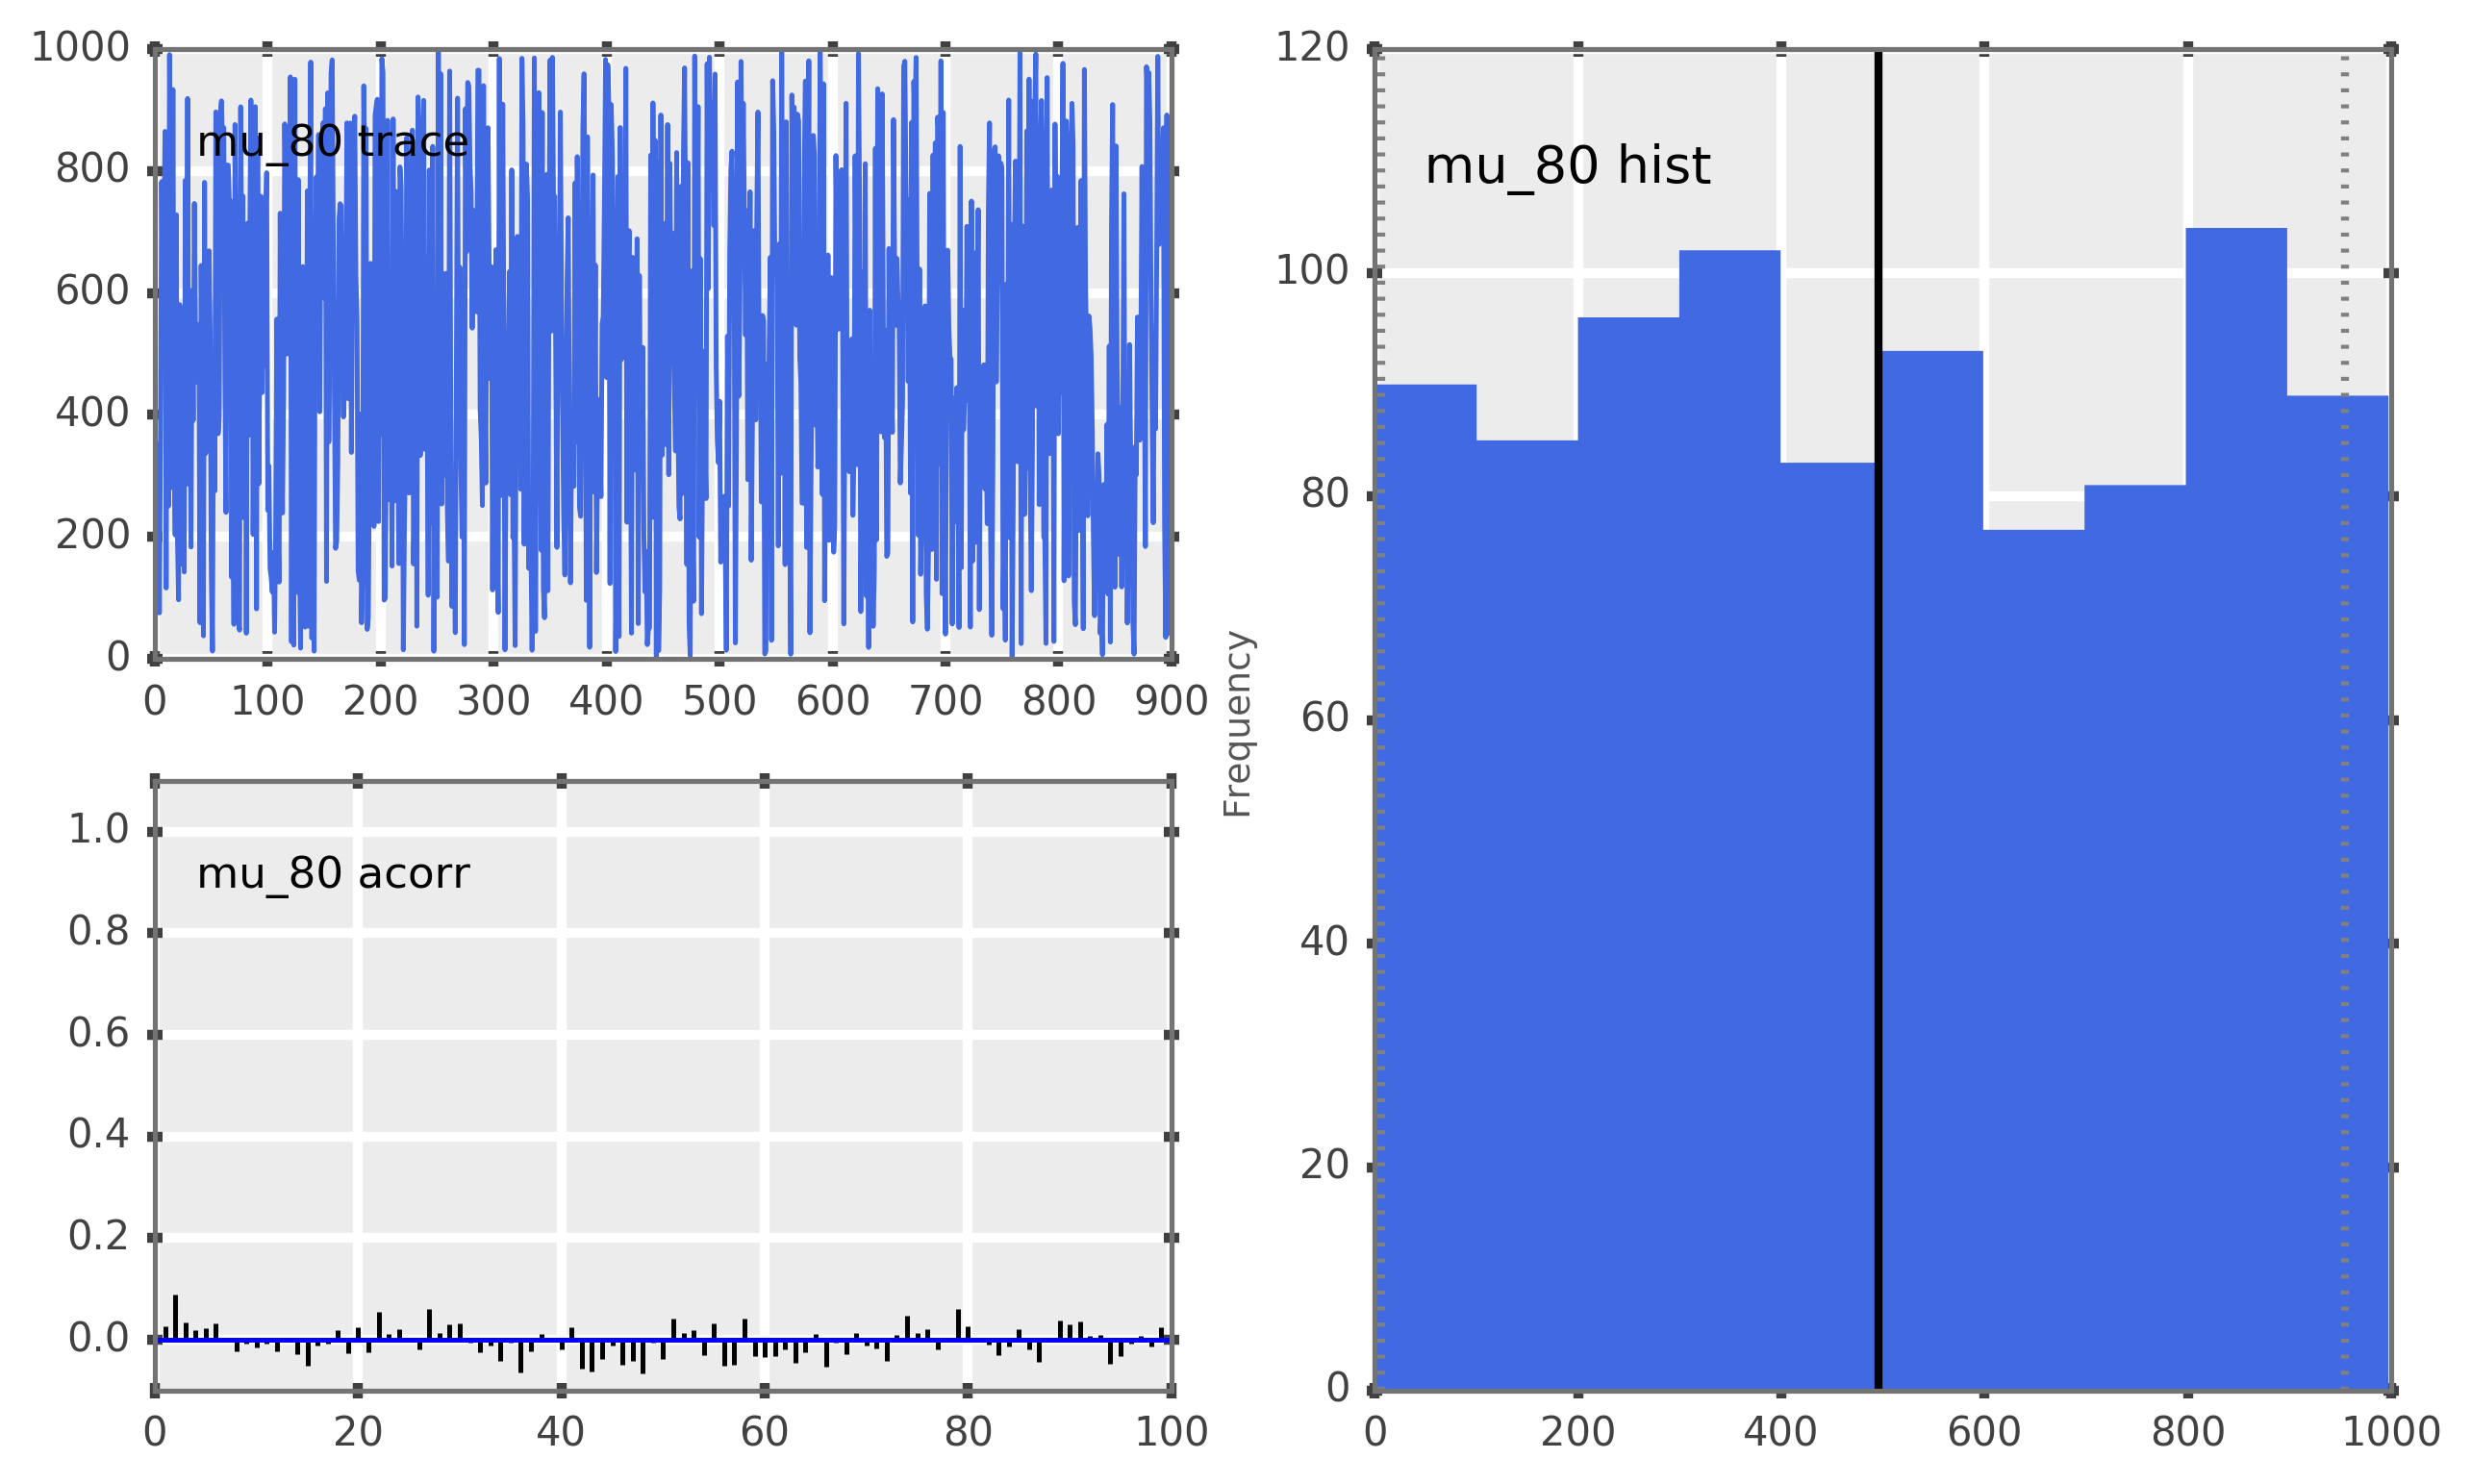

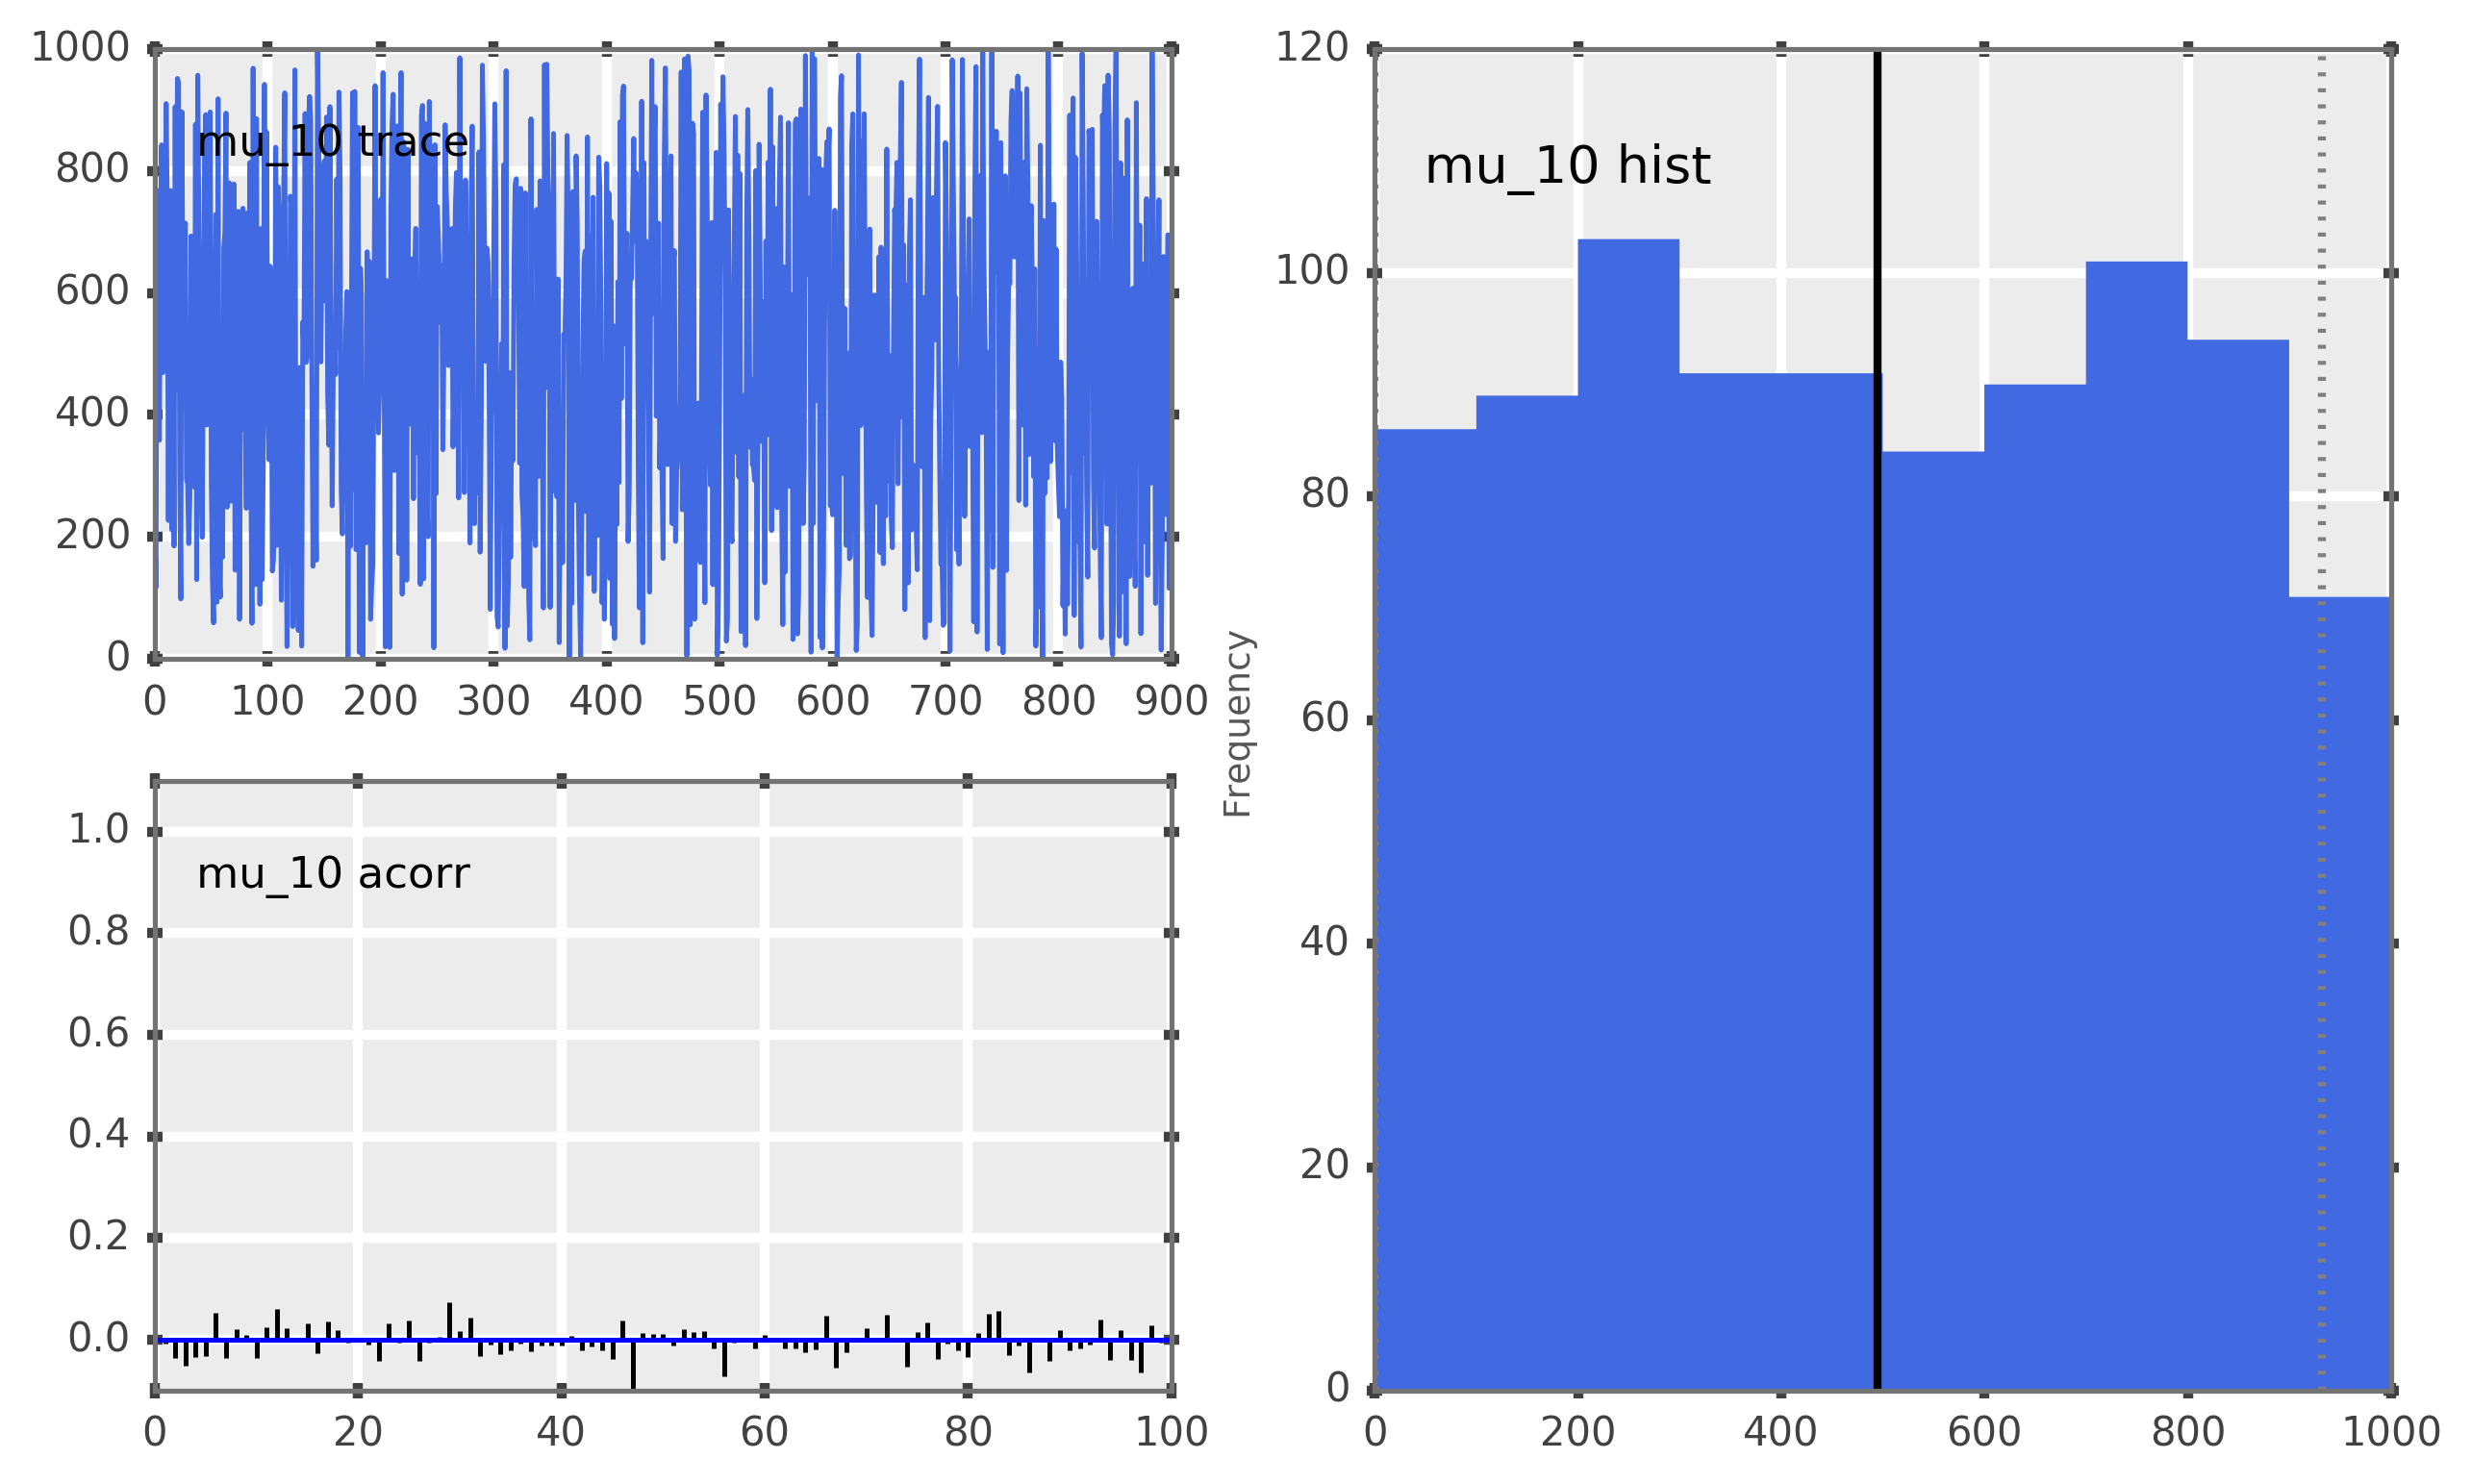

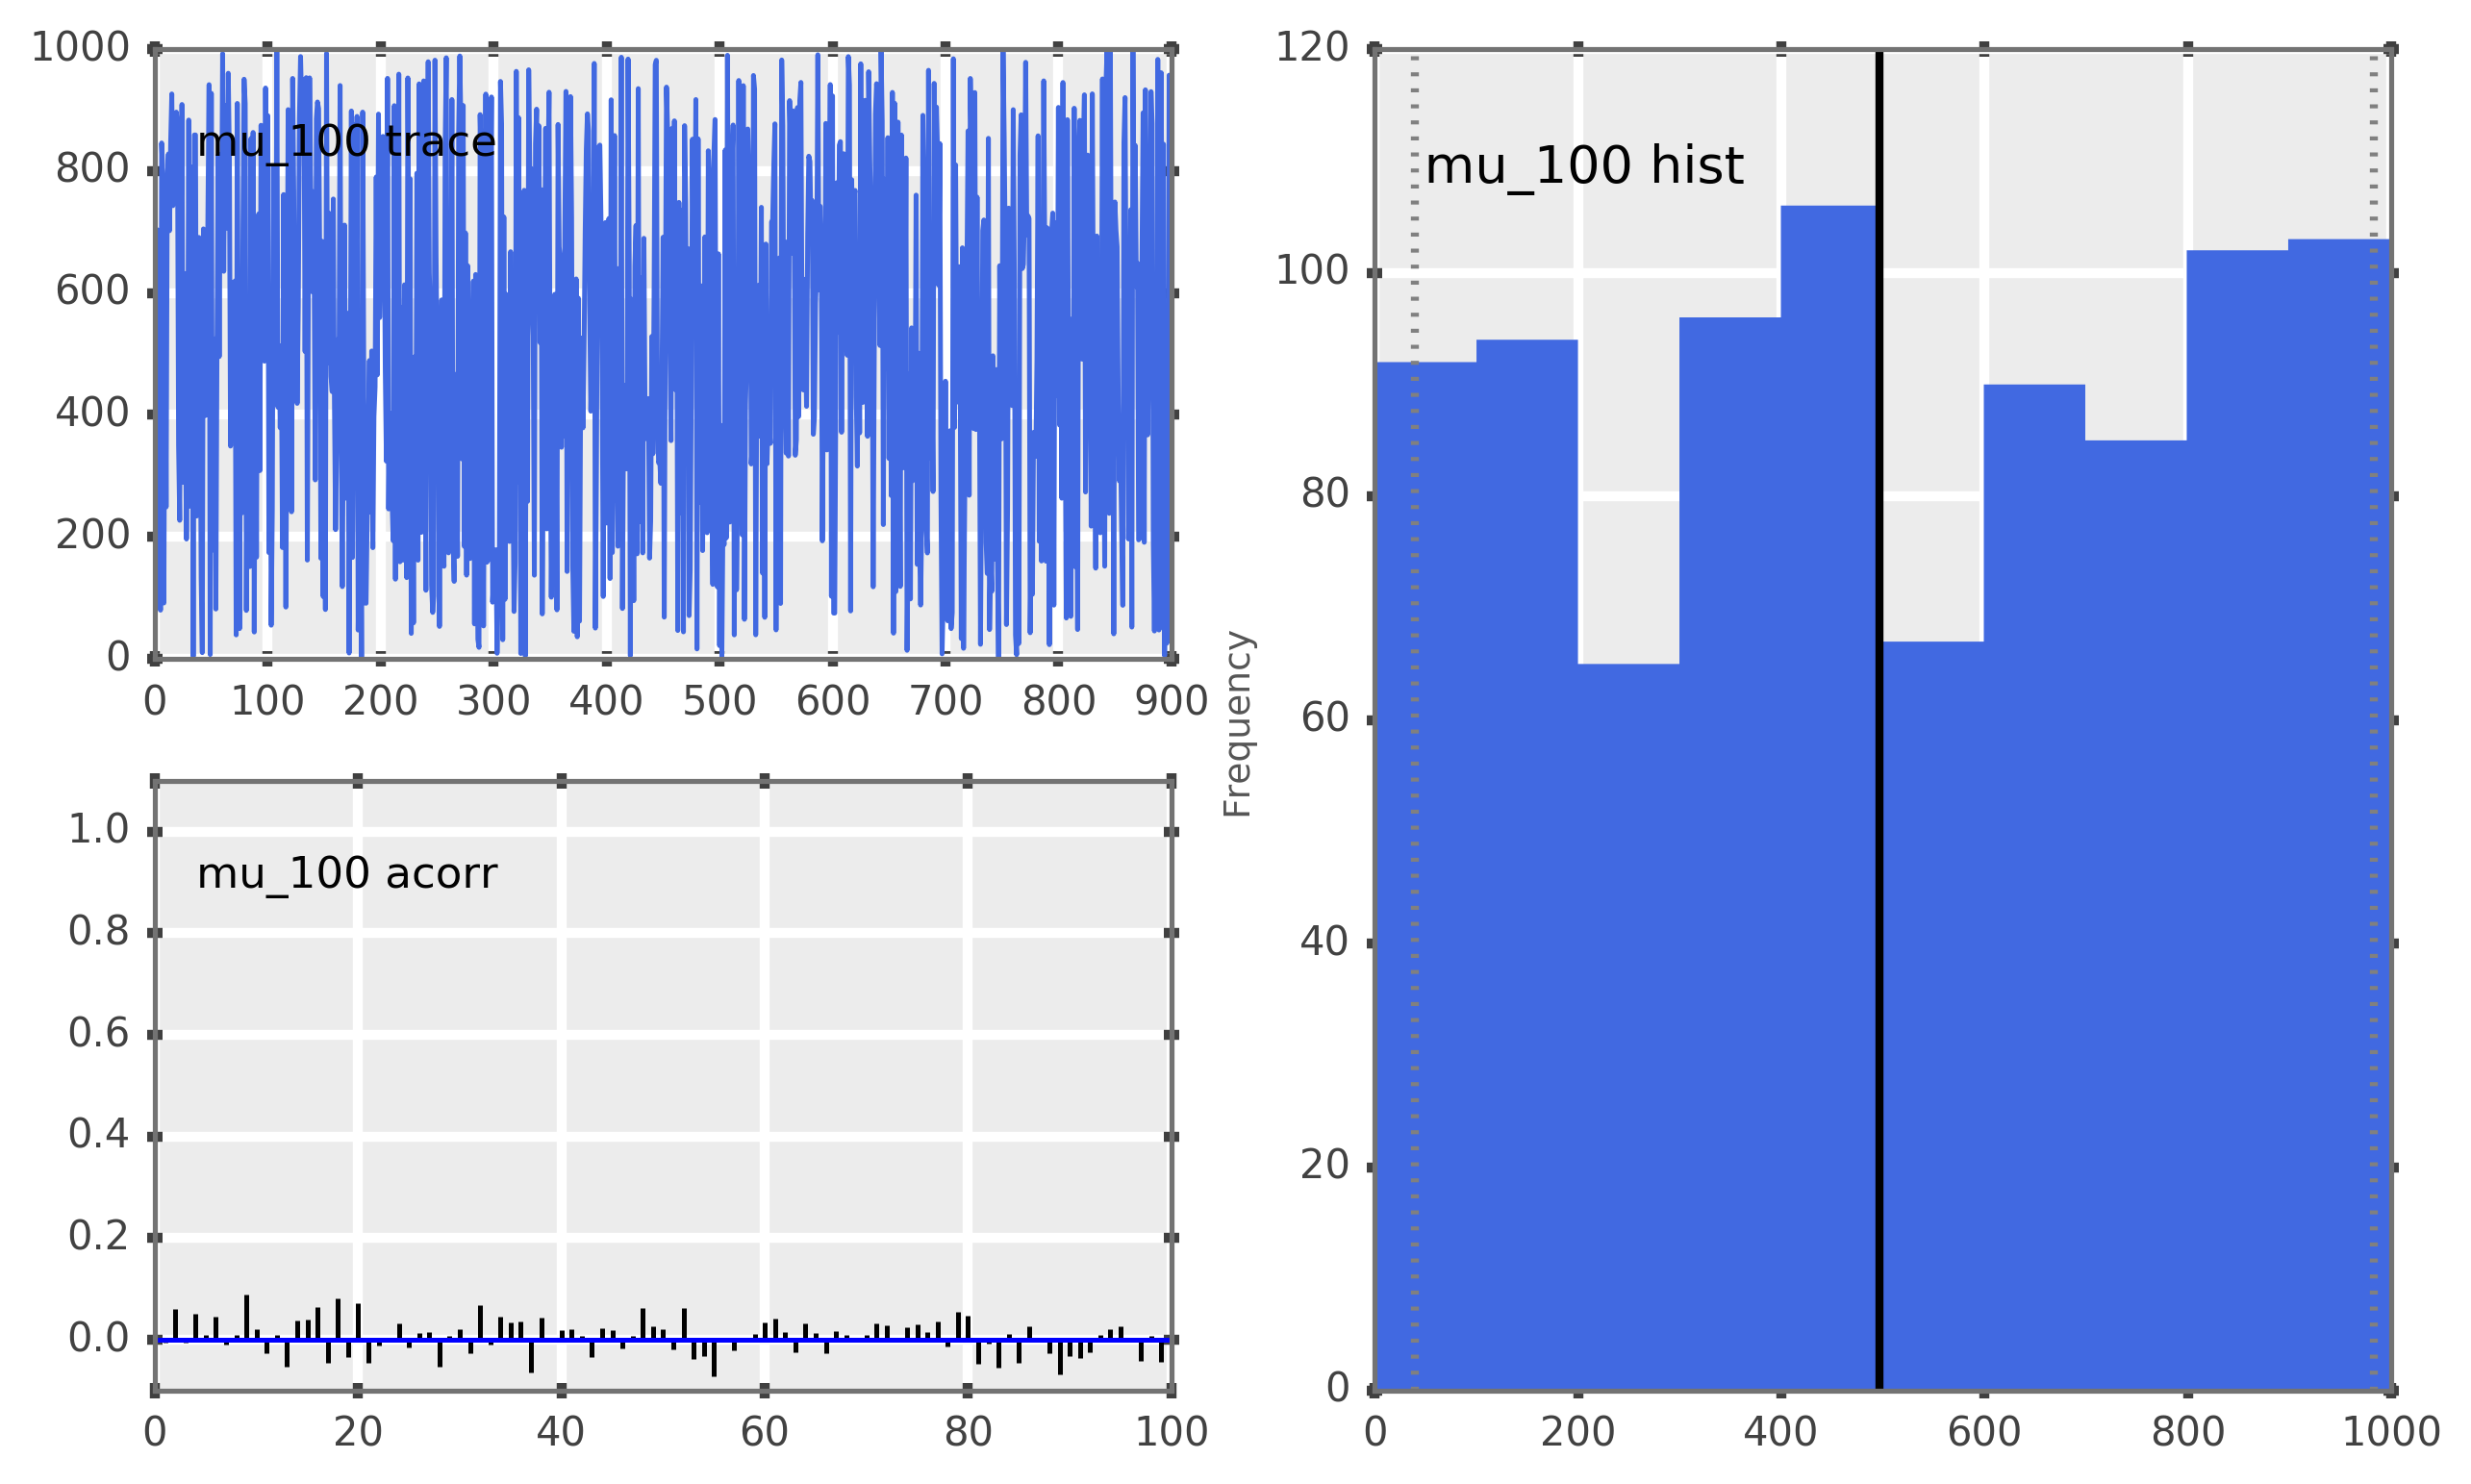

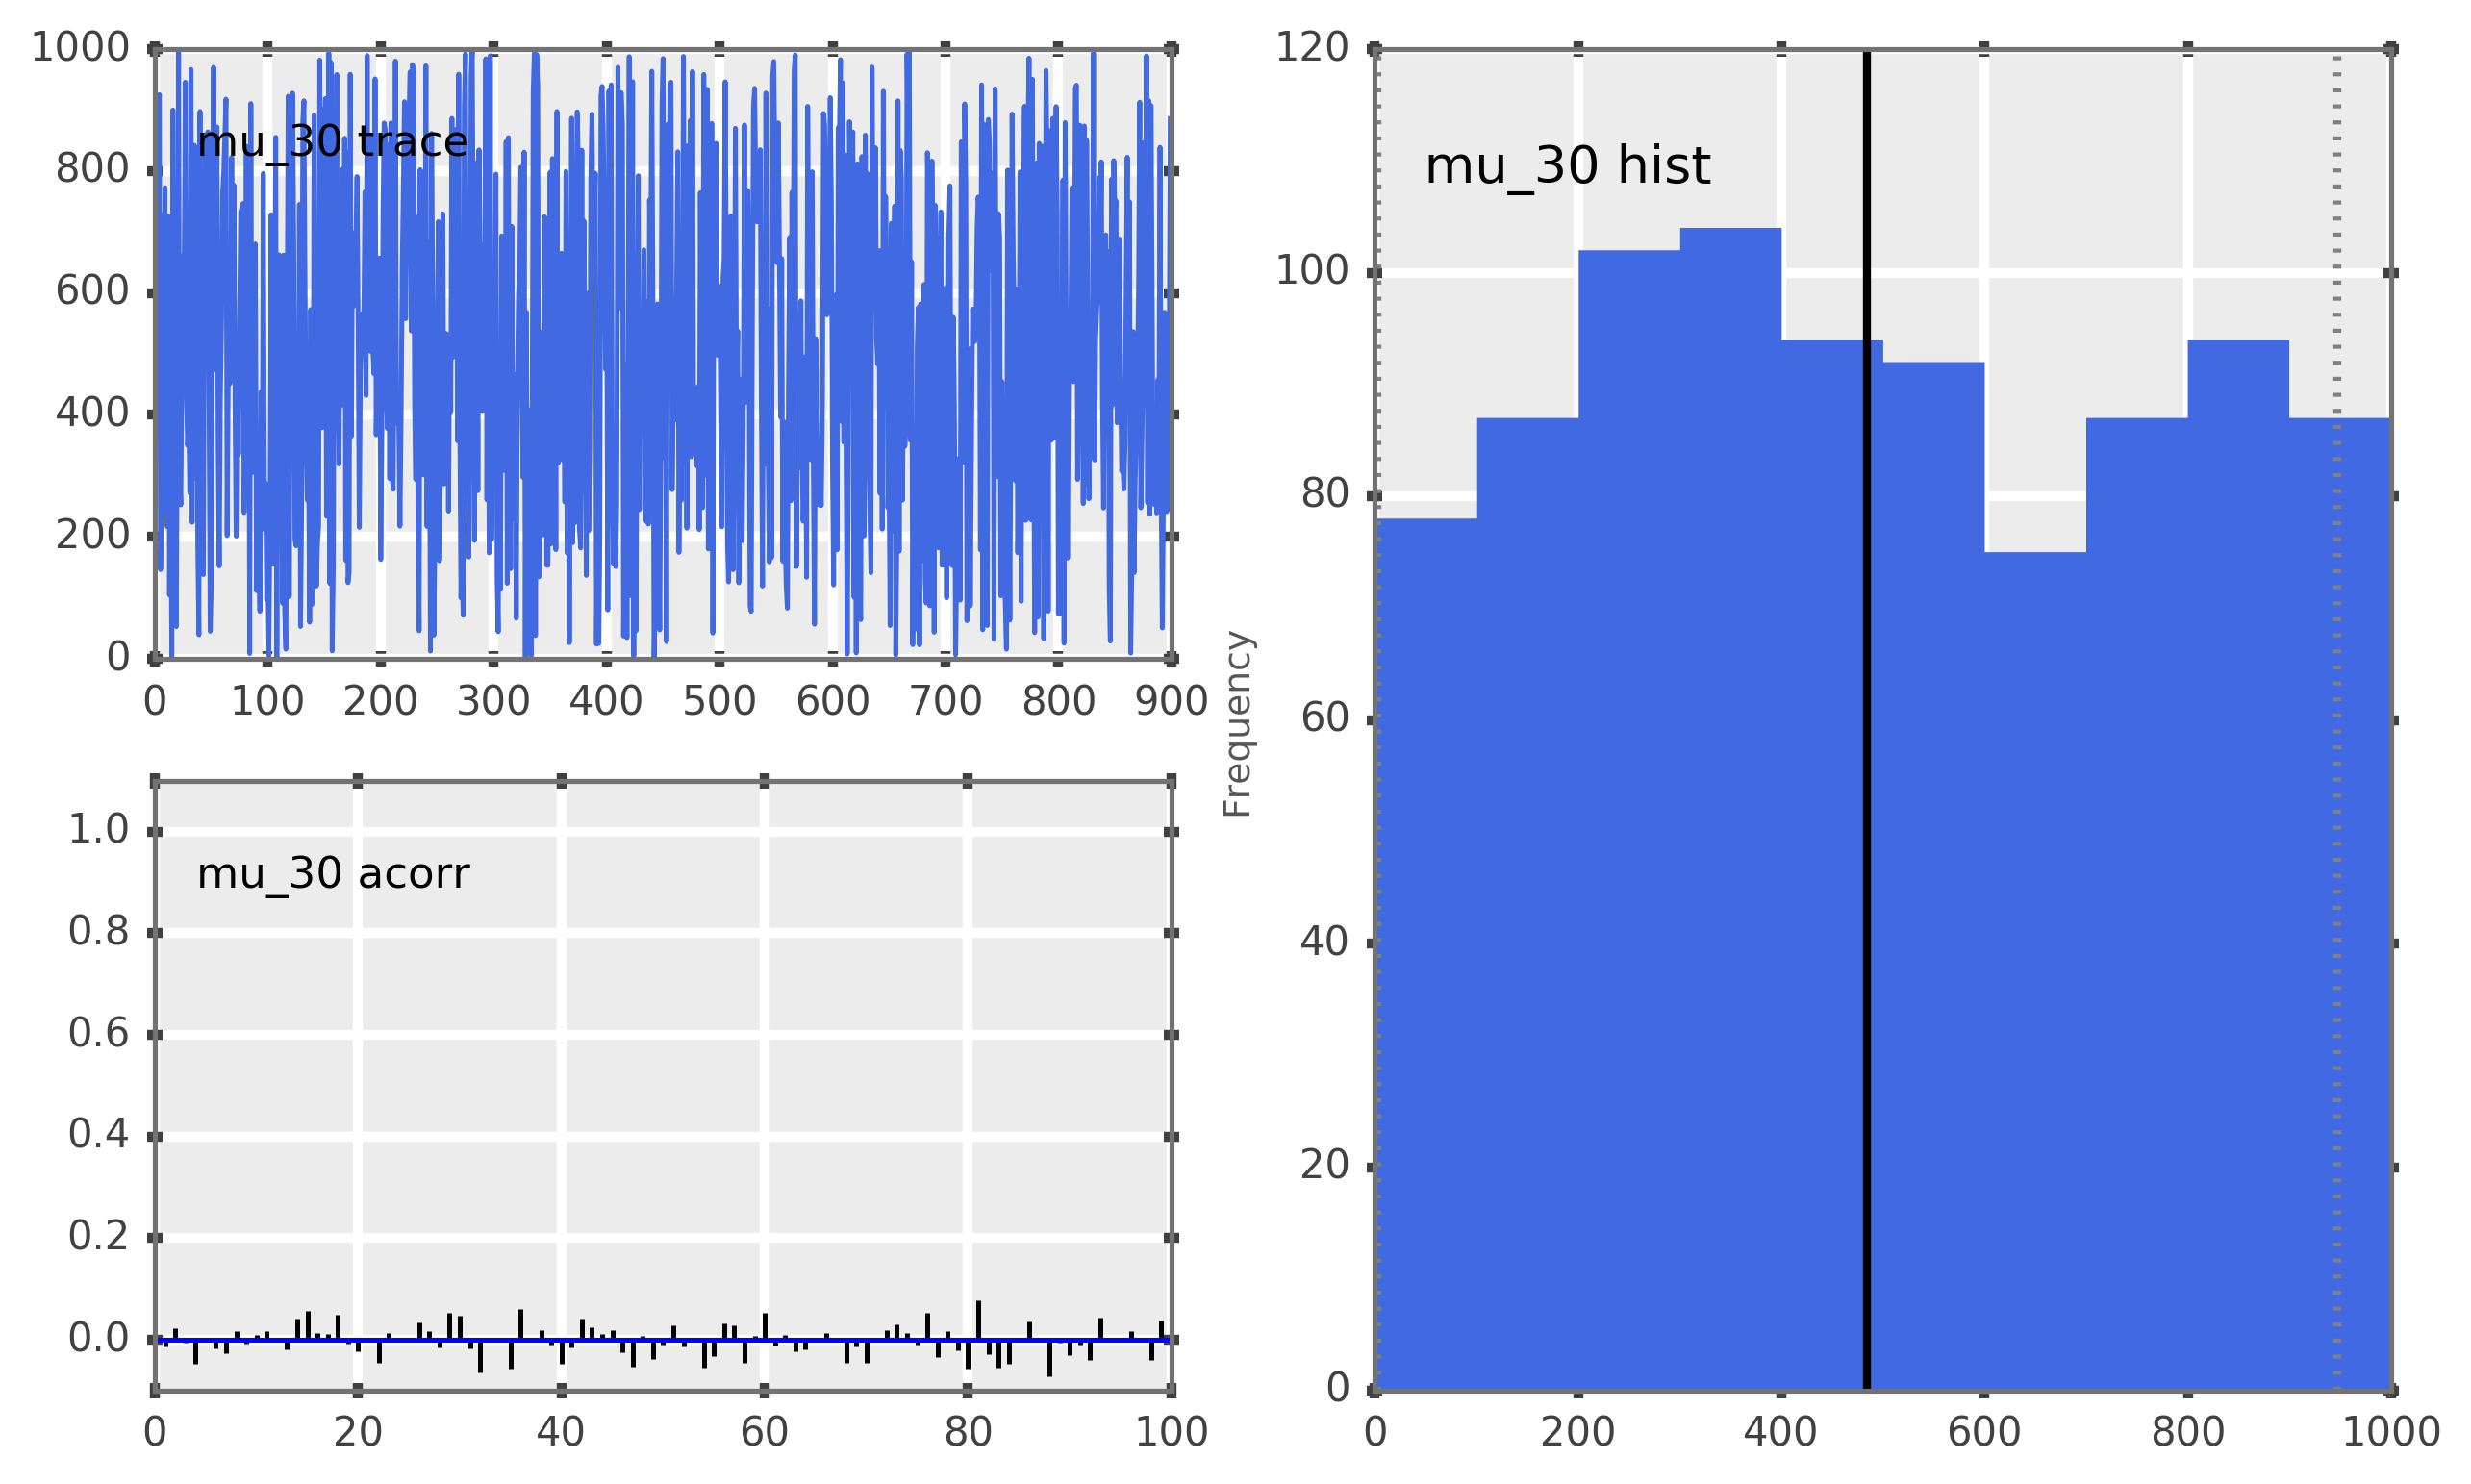

In [82]:
pprint(model.stats())
pymc.Matplot.plot(model)